In [67]:
import numpy as np
import pandas as pd
import os
import pickle
from pathlib import Path

In [68]:
df = pd.read_csv('token_surprisals_sentence_file_Original_bypassages.txt', sep='\t')
df.head()

sentence_id  token_id          token  surprisal
0            1         1  <|endoftext|>   0.000000
1            1         2           Ġbee  23.629046
2            1         3        keeping   4.228593
3            1         4    Ġencourages  14.358519
4            1         5           Ġthe   2.697638

In [69]:
def undo_subword_tokenization(df):
    """
    Takes in old DF and returns new DF with tokens remerged and according surprisal values averaged
    """
    
    overall_sentence_ids = []
    overall_token_ids = []
    overall_tokens = []
    overall_surprisals = []
    
    
    
    sentence_ids = np.unique(df['sentence_id'])
    for ind, elm in enumerate(sentence_ids):
        curr_df = df[df['sentence_id'] == elm]
        
        tokens = list(curr_df['token'])
        surprisal = list(curr_df['surprisal'])
        token_surp = list(zip(tokens, surprisal))
        
        sent = ' '.join(tokens)
        #print(sent)
        
        #get start indices of words
        new_word_indices = [ind for ind in range(len(tokens)) if tokens[ind].startswith('Ġ')]# out since I stripped <eos> already  or ind == 1]
        new_word_indices = new_word_indices #out since I stripped <eos> already [0] + new_word_indices
        #print([tokens[i] for i in new_word_indices])
        
        #find out how many tokens to merge with each word/beginning
        how_many_to_merge = []
        for i, word_index in enumerate(new_word_indices):
            start_merge = word_index
            if i != len(new_word_indices)-1:
                end_merge = new_word_indices[i+1]
                nr_to_merge = end_merge - start_merge -1
            else:
                nr_to_merge = len(tokens) - new_word_indices[-1] -1 #CK
            how_many_to_merge.append(nr_to_merge)
        
        TOMERGE = list(zip(new_word_indices, how_many_to_merge))
        #print(TOMERGE)
        #print("*"*30)
        #merge tokens, average surprisals
        new_tokens = []
        new_surp = []
        
        for lauf1, (tok, surp) in enumerate(token_surp):
            #print((tok, surp))
            for lauf2, (beginning, nr_merge) in enumerate(TOMERGE):
                if lauf1 == beginning:
                    #print((tok, surp))
                    #print(nr_merge)
                    if nr_merge == 0:
                        new_tokens.append(tok)
                        new_surp.append(surp)
                    else:
                        toks = [tok]
                        surps = [surp]
                        for i in range(1,nr_merge+1):
                            #print(token_surp[lauf1+i][0])
                            toks.append(token_surp[lauf1+i][0])
                            surps.append(token_surp[lauf1+i][1])
                        if nr_merge >= 2:
                            print(elm)
                            print(toks)
                            print(''.join(toks))
                            print(surps)
                            print(np.mean(surps))
                        new_tokens.append(''.join(toks))
                        if surps[0] == 0.0: #ignore initial 0
                            surps = surps[1:]
                        new_surp.append(np.mean(surps))
#                         if nr_merge >= 2:
#                             print(np.mean(surps))
        
        
        new_tokens = [elm.lstrip('Ġ') for elm in new_tokens]
        
        test =  " ".join(new_tokens)
        #print("NEW SENTENCE:", test)
        #print("*"*30)
        
        new_tokenids = list(range(1, len(new_surp) + 1))
        new_sentenceids = np.array([[ind + 1]*len(new_surp)]).flatten()
        if ind%10 == 0:
            print('\n')  
            print(new_tokens)
            print(new_surp)
            print(new_sentenceids)
            print(new_tokenids)
            assert len(new_tokenids) == len(new_surp)
            print('\n') 
    
        overall_sentence_ids.append(new_sentenceids)
        overall_token_ids.append(new_tokenids)
        overall_tokens.append(new_tokens)
        overall_surprisals.append(new_surp)
        
    #print(len(overall_sentence_ids), len(overall_sentence_ids[0]))
            
#     #create new DATAFRAME!
#     # initialize list of lists
#     overall_sentence_ids = np.array(overall_sentence_ids).flatten().flatten()
#     overall_token_ids = np.array(overall_token_ids).flatten().flatten()
#     overall_tokens = np.array(overall_tokens).flatten().flatten()
#     overall_surprisals = np.array(overall_surprisals).flatten().flatten()
    
    data = [[overall_sentence_ids[i][j], overall_token_ids[i][j], overall_tokens[i][j], overall_surprisals[i][j]] for i in range(len(overall_surprisals)) for j in range(len(overall_surprisals[i])) ]

    # Create the pandas DataFrame  
    new_df = pd.DataFrame(data, columns = ['sentence_id', 'token_id', 'token', 'surprisal'])  

    # print dataframe.  
    return new_df 

new_df = undo_subword_tokenization(df)

1
['Ġbee', 'keeper', "'s"]
Ġbeekeeper's
[4.958197, 0.545384, 0.02419]
1.8425903333333336
1
['Ġhoney', 'bees', '.']
Ġhoneybees.
[6.597658, 2.391222, 1.9442259999999998]
3.644368666666667


['beekeeping', 'encourages', 'the', 'conservation', 'of', 'local', 'habitats.', 'it', 'is', 'in', 'every', "beekeeper's", 'interest', 'to', 'conserve', 'local', 'plants', 'that', 'produce', 'pollen.', 'as', 'a', 'passive', 'form', 'of', 'agriculture', 'it', 'does', 'not', 'require', 'that', 'native', 'vegetation', 'be', 'cleared', 'to', 'make', 'way', 'for', 'crops.', 'beekeepers', 'also', 'discourage', 'the', 'use', 'of', 'pesticides', 'on', 'crops', 'because', 'they', 'could', 'kill', 'the', 'honeybees.']
[13.9288195, 14.358519, 2.697638, 6.2564910000000005, 0.198918, 6.894665, 3.3546674999999997, 14.600189000000002, 1.7024549999999998, 6.870191999999999, 8.397111, 1.8425903333333336, 0.401429, 0.292653, 4.701908, 3.905729, 6.554962, 5.634440000000001, 7.4760860000000005, 4.4268374999999995, 8.86607

['Ġtal', 'ons', '.']
Ġtalons.
[6.550035, 0.13376, 1.630442]
2.7714123333333336
57
['Ġhalf', '-', 'cl', 'osing']
Ġhalf-closing
[13.911283, 3.430603, 7.895957000000001, 3.894992]
7.283208749999999
59
['Ġfood', '-', 'scar', 'ce']
Ġfood-scarce
[6.934734, 2.649418, 5.001604, 0.149643]
3.68384975


['the', 'medieval', 'castle', 'was', 'not', 'a', 'structure', 'built', 'primarily', 'for', 'defense.', 'its', 'purpose', 'was', 'to', 'dominate', 'its', 'surroundings.', 'a', 'castle', 'could', 'easily', 'control', 'lands', 'within', 'a', "day's", 'walk.', 'during', 'times', 'of', 'attack', 'peasants', 'livestock', 'and', 'property', 'could', 'be', 'brought', 'inside', 'the', "castle's", 'walls', 'for', 'protection.']
[11.402031, 14.368994, 8.14027, 5.241655000000001, 6.500848, 3.3189, 9.820571000000001, 4.500267, 8.505508, 0.676304, 4.830235999999999, 8.029264999999999, 4.663012999999999, 0.317693, 0.587059, 11.608266, 7.333918, 1.863833, 5.8490910000000005, 2.77747, 6.177437, 6.9928, 7.570924000

111
['Ġte', 'fl', 'on', '-', 'clad']
Ġteflon-clad
[14.408185999999999, 4.469603, 0.03096, 7.8678740000000005, 8.420325]
7.0393896


['a', 'frying', 'pan', 'is', 'a', 'small', 'pan', 'with', 'sloping', 'sides', 'and', 'a', 'handle.', 'a', 'frying', 'pan', 'is', 'used', 'to', 'fry', 'sear', 'and', 'brown', 'food.', 'the', 'food', 'is', 'cooked', 'on', 'oil', 'covering', 'the', 'bottom', 'of', 'the', 'pan.', 'frying', 'pans', 'are', 'made', 'of', 'iron', 'or', 'teflon-clad', 'steel.']
[12.015897, 20.078897, 0.12238099999999999, 3.9072839999999998, 1.4453120000000002, 3.99166, 4.075896, 3.293824, 9.377033, 1.3265719999999999, 2.456012, 1.6966439999999998, 4.361066, 8.293265, 0.726913, 0.005255, 0.212808, 5.898823, 0.727617, 2.019905, 16.949952, 4.743057, 7.043234, 3.7567294999999996, 5.857962000000001, 8.883987, 1.35489, 2.935289, 4.108321, 9.940639, 15.214506, 0.863051, 4.990162000000001, 0.84506, 0.194191, 0.6514385, 6.961589, 2.084747, 0.8816309999999999, 4.047251999999999, 1.142285, 8.

164
['Ġdry', 'wall', '.']
Ġdrywall.
[11.036944, 1.0519379999999998, 1.5324440000000001]
4.540442
166
['Ġsurf', 'acing', '.']
Ġsurfacing.
[9.839702, 1.21747, 1.839857]
4.2990096666666675
166
['Ġbl', 'ub', 'ber']
Ġblubber
[10.42218, 1.7740349999999998, 0.023867]
4.073360666666667
166
['Ġamber', 'gr', 'is', '.']
Ġambergris.
[13.543821, 8.929714, 0.050556, 2.599621]
6.280927999999999
168
['Ġcareg', 'iver', '.']
Ġcaregiver.
[14.177175, 6.9e-05, 3.1725939999999997]
5.783279333333333


In [70]:
def prepare_datasets(textfile):
    df = pd.read_csv(textfile, sep='\t')
    
    # Delete final periods and "'s" from dataframe before merging.
    # This is hacky but does work here when we're only interested in comparing NOUN probability
    # If we don't apply this hack, then "beekeeper" (noun_df) and "beekeeper's" (original_df) probabilities are not
    # matched (since we average across 3 tokens in the latter), and also they are not found to be the same word further
    # below
    df = df[df.token != "."]
    print(len(df))
    df = df[~df['token'].str.contains("'")]
    print(len(df))
    df = df[df.token != "<|endoftext|>"]
    print(len(df))
    
    new_df = undo_subword_tokenization(df)
    return new_df

In [71]:
noun_df = prepare_datasets('token_surprisals_sentence_file_nouns_bypassages.txt')

3254
3254
3086


['beekeeping', 'conservation', 'habitats', 'it', 'beekeeper', 'interest', 'plants', 'pollen', 'form', 'agriculture', 'it', 'vegetation', 'way', 'crops', 'beekeepers', 'use', 'pesticides', 'crops', 'they', 'honeybees']
[13.9288195, 10.74717, 14.792244, 13.992409, 7.441282, 12.251241, 15.106214000000001, 14.665979, 13.841736, 10.693164999999999, 10.893649, 11.715129, 12.805541999999999, 7.689635000000001, 4.1360075, 6.484415, 4.982631, 12.138794, 7.9988399999999995, 5.792535000000001]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


2
['Ġmic', 'roman', 'agers']
Ġmicromanagers
[13.701522, 0.272408, 7.595674000000001]
7.189868000000001
9
['Ġlot', 'ter', 'ies']
Ġlotteries
[15.010869, 0.26664699999999997, 0.010304]
5.09594
11
['Ġmud', 'sl', 'ides']
Ġmudslides
[9.497086, 7.210807000000001, 0.047785]
5.585226


['hurricanes', 'limbs', 'trees', 'houses', 'their', 'foundations', 'they', 'rains', 'floods', 'mudsli


['spiders', 'insects', 'legs', 'silk', 'spiders', 'webs', 'silk', 'them', 'insects', 'spiders', 'fangs', 'their', 'prey', 'spiders', 'coin', 'bird']
[24.234661, 14.837382, 13.772739000000001, 10.298382, 8.623925999999999, 6.761394999999999, 5.217262, 13.522795, 11.170164999999999, 2.035614, 5.488440499999999, 10.09083, 7.356742, 1.122786, 15.588641, 12.815386]
[151 151 151 151 151 151 151 151 151 151 151 151 151 151 151 151]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


154
['Ġcut', 'ler', 'y']
Ġcutlery
[13.312001, 7.062494, 0.001912]
6.792135666666667


['cyclone', 'storm', 'sea', 'cyclones', 'winds', 'rain', 'cyclone', 'waves', 'flooding', 'cyclone', 'property']
[13.5042635, 9.037549, 13.148866, 8.2050145, 12.430874000000001, 10.721712, 2.131027, 5.532819, 8.528999, 1.5525665, 16.86325]
[161 161 161 161 161 161 161 161 161 161 161]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


163
['Ġv', 'ult', 'ures']
Ġvultures
[16.193353, 9.435167999999999, 0.14794200000000002]
8.5921543333333

In [72]:
original_df = prepare_datasets('token_surprisals_sentence_file_Original_bypassages.txt')

8423
8387
8219


['beekeeping', 'encourages', 'the', 'conservation', 'of', 'local', 'habitats', 'it', 'is', 'in', 'every', 'beekeeper', 'interest', 'to', 'conserve', 'local', 'plants', 'that', 'produce', 'pollen', 'as', 'a', 'passive', 'form', 'of', 'agriculture', 'it', 'does', 'not', 'require', 'that', 'native', 'vegetation', 'be', 'cleared', 'to', 'make', 'way', 'for', 'crops', 'beekeepers', 'also', 'discourage', 'the', 'use', 'of', 'pesticides', 'on', 'crops', 'because', 'they', 'could', 'kill', 'the', 'honeybees']
[13.9288195, 14.358519, 2.697638, 6.2564910000000005, 0.198918, 6.894665, 4.182471, 14.600189000000002, 1.7024549999999998, 6.870191999999999, 8.397111, 2.7517905000000003, 0.401429, 0.292653, 4.701908, 3.905729, 6.554962, 5.634440000000001, 7.4760860000000005, 6.111873, 8.866072, 2.5678400000000003, 13.286104000000002, 7.835949, 0.197224, 7.434871, 4.969203, 5.748863, 0.302269, 3.9491339999999995, 5.479972, 10.151932, 7.546736, 0.5724319999999999, 6.489808999999999, 3.82

48
['Ġband', '-', 'aid', 's']
Ġband-aids
[18.077013, 5.733955, 0.2168, 0.913479]
6.23531175
49
['Ġbr', 'anc', 'hed']
Ġbranched
[13.455328, 0.052176, 0.000248]
4.502584


['the', 'opera', 'singer', 'has', 'worked', 'hard', 'to', 'win', 'the', 'role', 'in', 'the', 'new', 'production', 'her', 'job', 'is', 'not', 'just', 'about', 'singing', 'acting', 'stage', 'presence', 'and', 'musical', 'interpretation', 'are', 'all', 'critical', 'but', 'her', 'pure', 'strong', 'voice', 'is', 'certainly', 'the', 'star', 'of', 'the', 'show']
[11.402031, 15.254872, 5.803669, 5.3052529999999996, 8.654755, 4.0413879999999995, 0.764417, 6.640275999999999, 3.6919809999999997, 8.001814999999999, 5.252802, 2.170352, 4.641433999999999, 8.094793, 9.553182000000001, 9.572205, 1.7275049999999998, 4.607308, 4.062254, 4.173794, 4.110839, 12.781467, 13.051736, 7.413545, 3.425764, 6.996267, 8.479706, 3.3360529999999997, 4.273292, 7.57918, 6.443656, 4.366956, 12.630285, 14.801915, 2.021488, 2.361265, 9.343494, 3.874601, 

103
['Ġf', 'ove', 'a']
Ġfovea
[9.747328999999999, 1.287144, 0.286906]
3.7737929999999995
107
['Ġlin', 'ole', 'um']
Ġlinoleum
[15.482585, 3.223765, 0.003367]
6.236572333333334
111
['Ġte', 'fl', 'on', '-', 'clad']
Ġteflon-clad
[14.408185999999999, 4.469603, 0.03096, 7.8678740000000005, 8.420325]
7.0393896


['a', 'frying', 'pan', 'is', 'a', 'small', 'pan', 'with', 'sloping', 'sides', 'and', 'a', 'handle', 'a', 'frying', 'pan', 'is', 'used', 'to', 'fry', 'sear', 'and', 'brown', 'food', 'the', 'food', 'is', 'cooked', 'on', 'oil', 'covering', 'the', 'bottom', 'of', 'the', 'pan', 'frying', 'pans', 'are', 'made', 'of', 'iron', 'or', 'teflon-clad', 'steel']
[12.015897, 20.078897, 0.12238099999999999, 3.9072839999999998, 1.4453120000000002, 3.99166, 4.075896, 3.293824, 9.377033, 1.3265719999999999, 2.456012, 1.6966439999999998, 6.3067720000000005, 8.293265, 0.726913, 0.005255, 0.212808, 5.898823, 0.727617, 2.019905, 16.949952, 4.743057, 7.043234, 5.968989, 5.857962000000001, 8.883987, 1.35489, 

163
['Ġv', 'ult', 'ures']
Ġvultures
[1.803694, 0.03327, 0.012529]
0.6164976666666666
166
['Ġbl', 'ub', 'ber']
Ġblubber
[10.42218, 1.7740349999999998, 0.023867]
4.073360666666667
166
['Ġamber', 'gr', 'is']
Ġambergris
[13.543821, 8.929714, 0.050556]
7.508030333333333


In [73]:
original_df.head()

sentence_id  token_id         token  surprisal
0            1         1    beekeeping  13.928819
1            1         2    encourages  14.358519
2            1         3           the   2.697638
3            1         4  conservation   6.256491
4            1         5            of   0.198918

In [74]:
noun_df.head()

sentence_id  token_id         token  surprisal
0            1         1    beekeeping  13.928819
1            1         2  conservation  10.747170
2            1         3      habitats  14.792244
3            1         4            it  13.992409
4            1         5     beekeeper   7.441282

In [75]:
# align tokenizations between spacy & gpt2

def get_final_noun_zip(n_zip,nouns,all_tokens,hyphenated):
    final_noun_zip = []
    found = 0
    
    for ind in range(len(n_zip)):
        #print(n_zip[ind])
        
        if ind < len(n_zip)-2:
            candidates = [n_zip[ind][0]+"-"+n_zip[ind+1][0],
                          n_zip[ind][0]+n_zip[ind+1][0]+n_zip[ind+2][0]]
            special_candidate = None
        elif ind < len(n_zip)-1:
            candidates = [n_zip[ind][0]+"-"+n_zip[ind+1][0]]
            special_candidate = "x"+n_zip[ind][0]+n_zip[ind+1][0] #didn't tokenize x-ray here
        else:
            candidates = []
            special_candidate = None
            
        if any(cand == hyphenated for cand in candidates):
            #print("hyphenated")
            for cand_i, cand in enumerate(candidates):
                if cand == hyphenated:
                    if cand_i == 0:
                        target = tuple([cand, np.mean([n_zip[ind][1],n_zip[ind+1][1]])])
                        rest = [n_zip[j] for j in range(len(n_zip)) if j > ind+1]
                    else:
                        target = tuple([cand, np.mean([n_zip[ind][1],
                                                           n_zip[ind+1][1],n_zip[ind+2][1]])])
                        rest = [n_zip[j] for j in range(len(n_zip)) if j > ind+2]
            final_noun_zip += [target]
            final_noun_zip += rest
            break
            
        elif (found == 0) and (special_candidate == hyphenated):
            #print("special candidate found: ", i, ind, hyphenated)
            found = 1
            rest = [n_zip[j] for j in range(len(n_zip)) if j > ind+1]
            target = tuple([hyphenated, np.mean([n_zip[ind][1],n_zip[ind+1][1]])])
            final_noun_zip += [target]
            if rest != []:
                final_noun_zip += rest
            break
        
        elif n_zip[ind][0] in all_tokens[ind:]:
            #print("normal noun: ", n_zip[ind][0])
            final_noun_zip += [n_zip[ind]]
            
        else:
            #print("not a noun")
            continue
            
    final_nouns = [elm[0] for elm in final_noun_zip]
    return final_noun_zip, final_nouns

In [76]:
def get_avg_surprisal_lists_nouns(original_df, noun_df, pos_df=None):
    average_sentence_surprisals_nouns = []
    average_sentence_surprisals_full = []

    sentence_ids = np.unique(list(original_df["sentence_id"]))

    for sent_id in sentence_ids:
        print(sent_id)

        all_tokens = list(original_df.loc[original_df["sentence_id"] == sent_id]["token"])
        all_surp = list(original_df.loc[original_df["sentence_id"] == sent_id]["surprisal"])
        all_zip = list(zip(all_tokens,all_surp))
        all_zip = [elm for elm in all_zip if elm[0] != '<|endoftext|>']
        hyphenated = [elm for elm in all_tokens if "-" in elm]
        if hyphenated != []:
            hyphenated = hyphenated[0]
        else:
            hyphenated = ""
        print("All tokens", all_zip)
        print("HYPHENATED: ", hyphenated)
        print("*"*30)    

        nouns = list(noun_df.loc[noun_df["sentence_id"] == sent_id]["token"])
        noun_surp = list(noun_df.loc[noun_df["sentence_id"] == sent_id]["surprisal"])
        n_zip = list(zip(nouns,noun_surp))
        n_zip = [elm for elm in n_zip if elm[0] != '<|endoftext|>']
        print("Nouns", n_zip)
        print(len(n_zip))
        print("*"*30)
        
        if pos_df is None:
            pos_zip = n_zip
        else:
            pos = list(pos_df.loc[pos_df["sentence_id"] == sent_id]["token"])
            pos_surp = list(pos_df.loc[pos_df["sentence_id"] == sent_id]["surprisal"])
            pos_zip = list(zip(pos,pos_surp))
            pos_zip = [elm for elm in pos_zip if elm[0] != '<|endoftext|>']
            pos_zip = [elm for elm in pos_zip if elm[0] in nouns]
            print("POS Nouns", pos_zip)
            print(len(pos_zip))
            print("*"*30)

        final_noun_zip, final_nouns = get_final_noun_zip(pos_zip,nouns,all_tokens,hyphenated)

        #filter out noun surprisals from original condition
        use_list = [all_zip[i] for i in range(len(all_zip)) if all_zip[i][0] in final_nouns]#filtered_nouns[sent_id-1]]
        print("Filtered nouns", use_list)
        try:
            assert len(use_list) == len(final_noun_zip)
        except:
            print("*****UNEQUAL LENGTHS!*******")
            print("Filtered nouns", final_noun_zip)
            print("Nouns", n_zip)
            print("\n")
        print("Asserted!")
        #print(use_list)
        #print("\n")

        #average noun surprisal (context: nouns only) and average noun surprisal (context: all tokens) to list
        average_sentence_surprisals_nouns.append(np.sum([elm[1] for elm in final_noun_zip])/len(final_noun_zip))
        average_sentence_surprisals_full.append(np.sum([elm[1] for elm in use_list])/len(use_list))

    return average_sentence_surprisals_nouns, average_sentence_surprisals_full
    

In [77]:
avg_surp_nouns, avg_surp_full = get_avg_surprisal_lists_nouns(original_df, noun_df)

1
All tokens [('beekeeping', 13.9288195), ('encourages', 14.358519), ('the', 2.697638), ('conservation', 6.2564910000000005), ('of', 0.198918), ('local', 6.894665), ('habitats', 4.182471), ('it', 14.600189000000002), ('is', 1.7024549999999998), ('in', 6.870191999999999), ('every', 8.397111), ('beekeeper', 2.7517905000000003), ('interest', 0.401429), ('to', 0.292653), ('conserve', 4.701908), ('local', 3.905729), ('plants', 6.554962), ('that', 5.634440000000001), ('produce', 7.4760860000000005), ('pollen', 6.111873), ('as', 8.866072), ('a', 2.5678400000000003), ('passive', 13.286104000000002), ('form', 7.835949), ('of', 0.197224), ('agriculture', 7.434871), ('it', 4.969203), ('does', 5.748863), ('not', 0.302269), ('require', 3.9491339999999995), ('that', 5.479972), ('native', 10.151932), ('vegetation', 7.546736), ('be', 0.5724319999999999), ('cleared', 6.489808999999999), ('to', 3.823035), ('make', 4.04695), ('way', 1.472742), ('for', 0.012545), ('crops', 6.637278), ('beekeepers', 2.1485

Nouns [('commanders', 23.111678), ('shuttle', 18.146527), ('flights', 11.698397), ('pilots', 18.024017999999998), ('backgrounds', 20.315623000000002), ('test', 10.951189), ('pilots', 5.105328), ('astronauts', 19.393233), ('doctors', 14.183034), ('engineers', 6.170896), ('scientists', 5.131208999999999), ('who', 8.43528), ('experiments', 16.719903), ('space', 10.343577), ('crews', 12.422605), ('men', 10.705763000000001), ('astronauts', 7.746803)]
17
******************************
Filtered nouns [('commanders', 17.133666), ('shuttle', 16.229088), ('flights', 6.461061), ('pilots', 12.865027), ('backgrounds', 9.787849000000001), ('test', 11.493572), ('pilots', 0.038542), ('astronauts', 8.78709), ('doctors', 8.000485000000001), ('engineers', 14.232346), ('scientists', 6.0898959999999995), ('who', 5.32365), ('experiments', 4.297421), ('space', 1.4356389999999999), ('crews', 10.135384), ('men', 2.940229), ('astronauts', 9.336122)]
Asserted!
21
All tokens [('the', 11.402031), ('team', 9.881557

Nouns [('animation', 21.780934), ('tool', 10.969619999999999), ('education', 20.682624), ('field', 18.758516), ('computer', 14.909274), ('graphics', 3.9842730000000004), ('broadens', 11.2981475), ('we', 12.676625), ('graphics', 11.933444999999999), ('students', 10.472059), ('research', 8.399419), ('imagery', 14.197553), ('classroom', 9.316594)]
13
******************************
Filtered nouns [('animation', 9.376505), ('tool', 1.9846720000000002), ('education', 11.363693), ('field', 8.527837), ('computer', 5.897857), ('graphics', 4.951223000000001), ('broadens', 6.446475), ('we', 7.4714350000000005), ('graphics', 10.071609), ('students', 3.8692699999999998), ('research', 11.087347), ('imagery', 5.880275), ('classroom', 0.434882)]
Asserted!
25
All tokens [('the', 11.402031), ('reason', 9.643236), ('he', 6.282667), ('came', 6.486639), ('to', 1.585197), ('law', 10.636956), ('school', 0.549966), ('in', 4.398843), ('the', 2.63037), ('first', 0.179806), ('place', 0.0005809999999999999), ('wa

All tokens [('it', 12.705675999999999), ('was', 3.9450790000000002), ('once', 8.301934), ('believed', 6.013757), ('that', 0.678809), ('each', 8.821416000000001), ('taste', 14.244506), ('bud', 9.086674), ('responded', 14.791282999999998), ('to', 1.209785), ('one', 4.3252120000000005), ('of', 2.498226), ('the', 2.492973), ('four', 3.499321), ('basic', 5.5925), ('tastes', 2.725419), ('that', 11.017299000000001), ('is', 2.3481919999999996), ('a', 5.649964), ('taste', 4.877082), ('bud', 3.275216), ('on', 9.042259), ('the', 1.803764), ('tip', 9.190108), ('of', 0.37196999999999997), ('the', 0.7673989999999999), ('tongue', 0.386909), ('would', 9.566291), ('respond', 3.654864), ('only', 7.084282000000001), ('if', 5.085054), ('you', 4.808166), ('were', 3.902142), ('eating', 5.607195), ('something', 4.2032300000000005), ('sweet', 4.2451419999999995), ('scientists', 13.597195999999999), ('now', 4.1574290000000005), ('think', 3.7915059999999996), ('that', 1.2522870000000002), ('a', 5.425922), ('sin

Nouns [('race', 21.222687), ('i', 12.854923), ('sound', 13.183813), ('someone', 13.549335000000001), ('their', 13.873042000000002), ('fingers', 11.958642), ('i', 3.941211), ('crunch', 15.843364999999999), ('i', 6.970102000000001), ('my', 9.865069), ('foot', 8.40339), ('step', 12.684078), ('spikes', 19.715073), ('doctor', 15.302857999999999), ('office', 12.197362), ('-', 8.867681), ('ray', 13.602097), ('fracture', 15.416412)]
18
******************************
Filtered nouns [('race', 9.771197), ('i', 13.063129), ('sound', 5.771848), ('someone', 4.531406), ('their', 2.805973), ('fingers', 0.65951), ('i', 2.150464), ('crunch', 8.291782000000001), ('i', 3.9583150000000002), ('my', 6.207085), ('foot', 7.3680330000000005), ('step', 5.189258000000001), ('spikes', 11.579988), ('doctor', 14.350191), ('office', 0.568094), ('fracture', 2.180717)]
Asserted!
45
All tokens [('there', 14.925964000000002), ('are', 2.393825), ('a', 4.467849), ('few', 2.5600549999999997), ('different', 5.924035), ('type

All tokens [('the', 11.402031), ('medieval', 14.368994), ('castle', 8.14027), ('was', 5.241655000000001), ('not', 6.500848), ('a', 3.3189), ('structure', 9.820571000000001), ('built', 4.500267), ('primarily', 8.505508), ('for', 0.676304), ('defense', 6.445501999999999), ('its', 8.029264999999999), ('purpose', 4.663012999999999), ('was', 0.317693), ('to', 0.587059), ('dominate', 11.608266), ('its', 7.333918), ('surroundings', 1.393045), ('a', 5.8490910000000005), ('castle', 2.77747), ('could', 6.177437), ('easily', 6.9928), ('control', 7.570924000000001), ('lands', 10.733475), ('within', 5.487558), ('a', 3.717688), ('day', 8.82018), ('walk', 3.645454), ('during', 9.789698), ('times', 6.229431), ('of', 0.19531800000000002), ('attack', 8.923928), ('peasants', 11.038766), ('livestock', 17.5619), ('and', 3.635571), ('property', 10.600202000000001), ('could', 2.312563), ('be', 0.501925), ('brought', 6.376419), ('inside', 8.212121), ('the', 1.7733439999999998), ('castle', 0.161893), ('walls',

All tokens [('a', 12.015897), ('bee', 15.549216), ('is', 4.536573000000001), ('a', 1.577393), ('flying', 8.140697), ('insect', 3.2016970000000002), ('with', 4.161969), ('a', 1.782041), ('black', 7.923508), ('and', 4.46548), ('yellow', 3.564335), ('body', 3.188601), ('and', 2.4035349999999998), ('six', 8.714715), ('legs', 2.071214), ('bees', 8.248071000000001), ('spread', 12.814554), ('pollen', 4.693855), ('between', 7.413684), ('flowers', 5.43939), ('as', 6.712173), ('they', 1.514178), ('collect', 7.586778999999999), ('nectar', 4.4394445000000005), ('to', 6.565250999999999), ('make', 4.658005), ('honey', 1.4944959999999998), ('bees', 2.71924), ('are', 2.274177), ('social', 9.103844), ('insects', 0.76818), ('and', 2.4289509999999996), ('live', 5.065118), ('together', 4.904291000000001), ('in', 1.052706), ('a', 4.831002), ('colony', 3.485588), ('located', 9.855902), ('in', 1.2850110000000001), ('a', 2.247783), ('hive', 2.8825380000000003), ('many', 10.255671000000001), ('bees', 2.889929)

Nouns [('earthquakes', 25.969347), ('ground', 18.413423), ('buildings', 10.095675), ('structures', 17.465091), ('landslides', 11.495099), ('activity', 17.237432000000002), ('earthquakes', 5.624363), ('release', 12.009213), ('energy', 6.7439789999999995), ('earth', 16.38334), ('crust', 8.599883), ('earthquake', 5.367443), ('sea', 12.994368), ('seabed', 5.839966666666666), ('tsunami', 9.250262)]
15
******************************
Filtered nouns [('earthquakes', 25.969347), ('ground', 6.949725), ('buildings', 0.854067), ('structures', 0.5833149999999999), ('landslides', 1.8314715000000001), ('activity', 2.9660599999999997), ('earthquakes', 3.76155), ('release', 6.269456), ('energy', 6.653123), ('earth', 2.7598529999999997), ('crust', 1.584925), ('earthquake', 0.47584399999999993), ('sea', 6.6153509999999995), ('seabed', 3.4816293333333337), ('tsunami', 2.337116)]
Asserted!
102
All tokens [('elephants', 24.987153), ('are', 3.9307220000000003), ('the', 4.760668), ('largest', 3.100838), ('kin

Nouns [('lentils', 14.4878965), ('seeds', 14.823929999999999), ('plant', 10.685673), ('legume', 7.6620975), ('family', 12.391083), ('lentils', 4.72263), ('lentils', 4.056381999999999), ('mediterranean', 8.961056), ('cuisines', 3.3455273333333335), ('lentils', 0.6526715000000001), ('source', 12.976357), ('protein', 12.532176)]
12
******************************
Filtered nouns [('lentils', 14.4878965), ('seeds', 11.661692), ('plant', 5.000794), ('legume', 5.130459), ('family', 0.23742600000000003), ('lentils', 5.433310499999999), ('lentils', 2.5742055), ('mediterranean', 8.048342000000002), ('cuisines', 1.5658956666666668), ('lentils', 2.0743769999999997), ('source', 1.877938), ('protein', 1.946635)]
Asserted!
122
All tokens [('lettuce', 24.92732), ('is', 5.276534), ('a', 2.163096), ('biennial', 9.156238), ('plant', 2.709509), ('often', 7.152975), ('grown', 4.122276), ('in', 1.399068), ('temperate', 3.8317215), ('climates', 0.753155), ('as', 6.9115660000000005), ('a', 1.382778), ('leaf', 

All tokens [('salmon', 24.65813), ('is', 5.154249), ('a', 2.220275), ('fish', 6.116708999999999), ('that', 1.6155059999999999), ('migrates', 4.5146785000000005), ('from', 1.439829), ('fresh', 10.657076), ('water', 1.724486), ('to', 0.806604), ('the', 2.616254), ('ocean', 2.0645189999999998), ('and', 3.6315779999999998), ('back', 5.576504), ('to', 2.7956090000000002), ('spawn', 6.430776), ('salmon', 11.646422), ('flesh', 11.831636), ('is', 0.695235), ('orange', 11.273003), ('or', 3.3625849999999997), ('red', 3.771928), ('and', 2.820712), ('has', 3.3031589999999995), ('high', 9.319461), ('protein', 5.178959), ('content', 0.989174), ('and', 2.8017819999999998), ('a', 3.4142040000000002), ('nice', 8.811407), ('taste', 5.882192), ('salmon', 3.6939870000000004), ('can', 4.695623), ('be', 0.8252299999999999), ('eaten', 2.9001740000000003), ('raw', 0.8374739999999999), ('in', 5.852149), ('sushi', 9.294414999999999), ('or', 2.562048), ('cooked', 3.296261), ('by', 5.866583), ('grilling', 4.58935

All tokens [('a', 12.015897), ('tropical', 13.966717000000001), ('cyclone', 3.1459425), ('is', 4.205239), ('a', 2.523762), ('storm', 5.788521), ('formed', 6.24448), ('over', 5.709601999999999), ('warm', 10.01181), ('tropical', 1.8039509999999999), ('sea', 6.615987), ('cyclones', 5.6641105), ('can', 3.5972239999999998), ('produce', 6.503108), ('very', 7.006821), ('powerful', 4.875908), ('winds', 1.649056), ('and', 2.2623290000000003), ('torrential', 3.671488), ('rain', 1.792012), ('tropical', 6.401701), ('cyclone', 2.3247975), ('can', 4.734694999999999), ('also', 2.656001), ('cause', 2.352759), ('high', 6.896574), ('waves', 3.860413), ('and', 1.87821), ('coastal', 8.309471), ('flooding', 0.385232), ('a', 5.352328), ('tropical', 0.443438), ('cyclone', 0.0784385), ('can', 2.798485), ('move', 10.744852999999999), ('inland', 5.8923309999999995), ('and', 2.956484), ('seriously', 14.996276000000002), ('damage', 1.1465239999999999), ('property', 7.8687130000000005)]
HYPHENATED:  
*************

In [78]:
avg_surp_nouns

[10.60487185,
 11.327330545454545,
 11.347524388888889,
 9.716483190476188,
 11.178157500000001,
 12.450837823529412,
 10.873131055555556,
 11.182779090909092,
 13.08983611111111,
 11.912232900000001,
 11.687409411764706,
 12.88202723529412,
 10.575193406250001,
 10.294532142857143,
 8.872302444444443,
 10.926920224999998,
 10.7313005625,
 11.677024916666667,
 10.942498789473683,
 12.859121352941177,
 13.419551666666667,
 10.51496252631579,
 13.4231796875,
 13.02916026923077,
 11.617814473684211,
 11.922692769230773,
 9.81330961111111,
 10.480513631578948,
 12.005360687500001,
 10.41977602631579,
 12.9089911875,
 12.634006818181815,
 10.725998846153844,
 10.429989323529412,
 11.019135367647058,
 7.334455166666667,
 11.89005915625,
 13.815443923076923,
 12.324515583333332,
 11.663304166666668,
 11.307600428571428,
 10.471269,
 12.355646,
 12.936335125,
 10.502695083333332,
 10.085181088235295,
 11.885514846153846,
 12.690730233333333,
 13.70737871875,
 11.85155977777778,
 12.01320985714

In [79]:
avg_surp_full

[5.301663225,
 5.495848257575758,
 7.730612999999999,
 4.440462476190476,
 6.28612325,
 7.412928647058824,
 6.703578777777777,
 6.612369863636363,
 8.356904444444446,
 4.6134923,
 7.711429058823531,
 7.78148194117647,
 4.53298603125,
 5.0139257142857145,
 5.858496111111112,
 5.11107665,
 5.4503191875,
 4.382436033333333,
 5.615078543859648,
 8.505121588235294,
 8.323422933333335,
 7.73719742105263,
 6.400754687499999,
 6.720236923076923,
 6.043139894736842,
 5.17643123076923,
 7.272729694444444,
 5.328121342105263,
 6.2656012812499995,
 6.692058421052631,
 5.6951255624999995,
 5.879462181818181,
 5.156491846153846,
 6.2113559019607845,
 5.997756848039216,
 5.934417427083333,
 6.5811079687500005,
 7.644122538461537,
 5.594913583333333,
 7.22732947368421,
 5.714857714285714,
 5.976707095238095,
 9.23277952631579,
 6.152936875,
 5.3170728333333335,
 4.635401555555557,
 5.945362076923076,
 5.848021250000001,
 6.93877640625,
 7.938945166666667,
 8.005278714285714,
 7.545764444444444,
 6.171

In [80]:
print(np.mean(avg_surp_nouns))
print(np.mean(avg_surp_full))

11.287304984093032
6.245551189813382


In [81]:
plot_df = pd.DataFrame({
    "noun_context": avg_surp_nouns,
    "full_context": avg_surp_full
})

In [82]:
plot_df.head()

noun_context  full_context
0     10.604872      5.301663
1     11.327331      5.495848
2     11.347524      7.730613
3      9.716483      4.440462
4     11.178158      6.286123

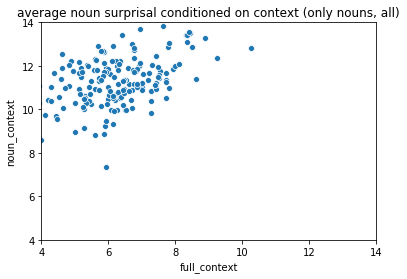

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=plot_df, x="full_context", y="noun_context")
plt.title("average noun surprisal conditioned on context (only nouns, all)")
plt.xlim((4,14))
plt.ylim((4,14))
plt.show()

In [84]:
plot_df2 = plot_df.agg({"noun_context": ["mean","sem"], "full_context": ["mean","sem"]})
df2_transposed = plot_df2.T
df2_transposed = df2_transposed.reset_index()
df2_transposed

index       mean       sem
0  noun_context  11.287305  0.085580
1  full_context   6.245551  0.089295

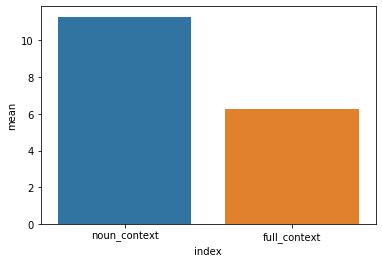

In [85]:
sns.barplot(x="index", y="mean", data=df2_transposed)
plt.show()

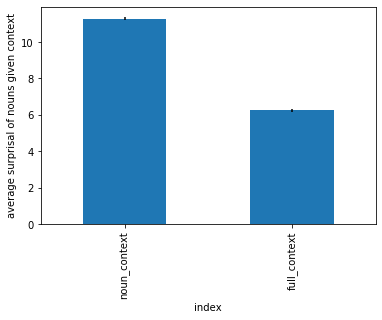

In [86]:
def errplot(data, x, y, yerr):
    ax = plt.gca()
    data.plot(x=x, y=y, yerr=yerr, kind="bar", ax=ax, legend=False)
    plt.ylabel("average surprisal of nouns given context")

errplot(df2_transposed,"index", "mean", "sem")

# All in one!

In [87]:
def main_nouns(textfile_original, textfile_nouns, textfile2):
    original_df = prepare_datasets(textfile_original)
    noun_df = prepare_datasets(textfile_nouns)
    pos_df = prepare_datasets(textfile2)

    avg_surp_pos, avg_surp_full = get_avg_surprisal_lists_nouns(original_df, noun_df,pos_df)
    return avg_surp_pos, avg_surp_full

In [88]:
avg_surp_nounsverbs, avg_surp_full = main_nouns('token_surprisals_sentence_file_Original_bypassages.txt',
                                    'token_surprisals_sentence_file_nouns_bypassages.txt',
                                    'token_surprisals_sentence_file_nounsverbs_bypassages.txt'
                                         )

8423
8387
8219


['beekeeping', 'encourages', 'the', 'conservation', 'of', 'local', 'habitats', 'it', 'is', 'in', 'every', 'beekeeper', 'interest', 'to', 'conserve', 'local', 'plants', 'that', 'produce', 'pollen', 'as', 'a', 'passive', 'form', 'of', 'agriculture', 'it', 'does', 'not', 'require', 'that', 'native', 'vegetation', 'be', 'cleared', 'to', 'make', 'way', 'for', 'crops', 'beekeepers', 'also', 'discourage', 'the', 'use', 'of', 'pesticides', 'on', 'crops', 'because', 'they', 'could', 'kill', 'the', 'honeybees']
[13.9288195, 14.358519, 2.697638, 6.2564910000000005, 0.198918, 6.894665, 4.182471, 14.600189000000002, 1.7024549999999998, 6.870191999999999, 8.397111, 2.7517905000000003, 0.401429, 0.292653, 4.701908, 3.905729, 6.554962, 5.634440000000001, 7.4760860000000005, 6.111873, 8.866072, 2.5678400000000003, 13.286104000000002, 7.835949, 0.197224, 7.434871, 4.969203, 5.748863, 0.302269, 3.9491339999999995, 5.479972, 10.151932, 7.546736, 0.5724319999999999, 6.489808999999999, 3.82

66
['Ġz', 'ig', 'z', 'agged']
Ġzigzagged
[16.13716, 0.64347, 1.554676, 0.227613]
4.640729750000001
69
['Ġfree', '-', 'cl', 'im', 'bing']
Ġfree-climbing
[17.812615, 4.567978, 9.573212, 1.784089, 0.11201099999999999]
6.769981000000001
70
['Ġhes', 'it', 'antly']
Ġhesitantly
[16.986887, 10.742807, 0.855366]
9.528353333333333


['a', 'major', 'strength', 'of', 'professional', 'skiers', 'is', 'how', 'they', 'use', 'ski', 'poles', 'proper', 'use', 'of', 'ski', 'poles', 'improves', 'their', 'balance', 'and', 'adds', 'flair', 'to', 'their', 'skiing', 'it', 'minimizes', 'the', 'need', 'for', 'upper', 'body', 'movements', 'to', 'regain', 'lost', 'balance', 'while', 'skiing']
[12.015897, 11.183817, 9.098372999999999, 0.5384800000000001, 11.885498, 6.3136815, 2.319457, 6.981035, 2.106868, 5.068503, 10.196344, 3.376004, 18.368991, 2.51416, 0.719892, 2.363033, 0.045475, 9.520047, 4.376052, 7.169688000000001, 1.464116, 9.949622, 13.204521, 0.658837, 1.601936, 5.945264, 7.120792, 6.2049655, 1.834547999

133
['Ġbrightly', '-', 'colored']
Ġbrightly-colored
[10.42914, 7.177241, 0.34101]
5.982463666666667
134
['Ġorange', '-', 'yellow']
Ġorange-yellow
[5.206313, 3.971618, 3.385614]
4.187848333333333
134
['Ġred', '-', 'brown']
Ġred-brown
[6.441561, 4.0152470000000005, 1.625325]
4.027377666666667
135
['Ġfelt', '-', 't', 'ipped']
Ġfelt-tipped
[14.113942000000002, 4.585214, 6.4904150000000005, 3.684446]
7.2185042500000005
136
['Ġpir', 'an', 'has']
Ġpiranhas
[25.794294, 3.971733, 2.559611]
10.775212666666667
136
['Ġpir', 'an', 'has']
Ġpiranhas
[8.569536, 0.10072300000000001, 0.11785899999999999]
2.929372666666666
136
['Ġpir', 'an', 'has']
Ġpiranhas
[4.2032680000000004, 0.04158, 0.067107]
1.4373183333333335
136
['Ġpir', 'an', 'has']
Ġpiranhas
[3.9736559999999996, 0.027574, 0.032643]
1.3446243333333332
136
['Ġcar', 'r', 'ion']
Ġcarrion
[11.103854, 1.29421, 0.042891000000000006]
4.146985
137
['Ġr', 'asp', 'berries']
Ġraspberries
[6.635142999999999, 0.187723, 0.001865]
2.274910333333333
138
['Ġcar'



['person', 'his', 'her', 'response', 'situations', 'person', 'unemployment', 'fulltime', 'there', 'stresses', 'traffic', 'there', 'stresses', 'divorce', 'loss', 'child']
[17.956166, 15.607907, 14.290099, 13.054084, 17.016807999999997, 9.72909, 18.965101999999998, 8.485063, 11.19489, 18.49176, 14.854256, 6.372288, 3.5913980000000003, 12.321954, 12.926667, 11.686327]
[31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


34
['Ġt', 'ux', 'edo']
Ġtuxedo
[11.101422, 7.896688, 1.8095450000000002]
6.935885
35
['Ġt', 'ux', 'edo']
Ġtuxedo
[15.191819, 8.374906, 0.702063]
8.089595999999998
35
['Ġt', 'ux', 'ed', 'os']
Ġtuxedos
[8.764253, 0.024025, 3.183024, 0.018021000000000002]
2.9973307499999997
36
['Ġt', 'ux', 'edo']
Ġtuxedo
[15.191819, 8.374906, 0.702063]
8.089595999999998
36
['Ġt', 'ux', 'edo']
Ġtuxedo
[5.415678, 0.102114, 0.243187]
1.9203263333333334


['it', 'taste', 'bud', 'tastes', 'taste', 'bud', 'tip', 'tongue', 'you', 'something', 

19
['Ġspac', 'ew', 'alks']
Ġspacewalks
[10.126325, 0.073059, 0.844442]
3.6812753333333337


['team', 'astronauts', 'floated', 'exterior', 'space', 'shuttle', 'they', 'carried', 'tools', 'needed', 'repair', 'part', 'telescope', 'astronaut', 'loosened', 'bolts', 'pipe', 'fitted', 'replacement', 'part', 'place']
[16.693087, 19.661673, 14.605386, 19.996156, 6.331823, 4.19567, 12.179822, 7.572547, 10.523295, 8.338967, 16.189675, 9.272538, 17.739684, 8.187905, 8.191372, 7.618456, 16.268798, 11.050108, 10.655552, 5.850101, 13.383417000000001]
[21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


23
['Ġsqu', 'int', 'ing']
Ġsquinting
[16.30432, 3.0843849999999997, 2.5044299999999997]
7.297711666666667


['person', 'has', 'his', 'her', 'response', 'situations', 'person', 'devastated', 'unemployment', 'find', 'working', 'fulltime', 'there', 'stresses', 'stuck', 'traffic', 'there', 'stresses', 'divorce', 'loss

All tokens [('artisanal', 12.548660000000002), ('beekeepers', 8.139112), ('go', 10.195912), ('to', 2.547787), ('extremes', 6.990566), ('for', 4.646216000000001), ('their', 2.130311), ('craft', 7.853161), ('but', 8.690073), ('their', 5.085671), ('product', 9.161217), ('is', 1.248885), ('worth', 5.981006), ('the', 2.150577), ('effort', 1.7107130000000002), ('artisanal', 8.818615), ('honey-making', 5.732351666666666), ('emphasizes', 15.151760999999999), ('quality', 6.1107510000000005), ('and', 2.179565), ('character', 8.497116), ('over', 3.936381), ('quantity', 0.8667600000000001), ('and', 2.540294), ('consistency', 8.068888000000001), ('to', 12.853414), ('produce', 6.189714), ('the', 4.747283), ('finest', 4.301442), ('honey', 1.384941), ('beekeepers', 6.772916), ('become', 10.710733), ('micromanagers', 7.116160000000001), ('of', 3.3258949999999996), ('their', 1.939483), ('honeybees', 4.737705500000001), ('they', 5.396166), ('scout', 14.907481), ('the', 2.876427), ('fields', 5.456882), ('

Nouns [('i', 15.053864), ('lawn', 21.968859), ('mower', 2.9374585), ('chair', 11.615396), ('my', 9.580931), ('i', 6.233573000000001), ('levers', 19.994348000000002), ('front', 10.334813), ('me', 10.518928), ('machine', 10.651775), ('blades', 16.336544), ('lawn', 10.32437), ('mower', 0.614739), ('blade', 10.28277), ('grass', 9.576506), ('lawn', 5.131442), ('task', 13.79563), ('it', 10.613781), ('me', 7.369657000000001), ('patience', 15.60302)]
20
******************************
POS Nouns [('i', 15.053864), ('lawn', 11.188455000000001), ('mower', 1.0923250000000002), ('chair', 13.403267999999999), ('my', 3.0535509999999997), ('i', 2.500508), ('levers', 16.490559), ('front', 12.529253), ('me', 11.886808), ('machine', 9.858733), ('blades', 16.135791), ('lawn', 14.080987), ('mower', 0.3936455), ('blade', 6.090889), ('grass', 9.694099000000001), ('lawn', 2.57816), ('task', 15.390348999999999), ('it', 9.884008), ('me', 0.440499), ('patience', 9.991833999999999)]
20
****************************

POS Nouns [('i', 15.053864), ('pharmacy', 19.840076999999997), ('profession', 12.412408000000001), ('me', 5.944647), ('i', 9.774573), ('pharmacist', 5.124569999999999), ('i', 2.880105), ('bottles', 15.377082000000001), ('pharmacies', 14.835415), ('child', 16.566106), ('i', 1.451524), ('it', 6.040852), ('cliche', 9.639405499999999), ('i', 5.040524), ('impact', 17.140988), ('i', 6.548701), ('lives', 13.055096), ('my', 7.768499), ('patients', 7.753724000000001)]
19
******************************
Filtered nouns [('i', 15.053864), ('pharmacy', 17.144560000000002), ('profession', 10.582496), ('me', 6.008793), ('i', 5.970546), ('pharmacist', 0.9729495000000001), ('i', 2.729778), ('bottles', 8.572185000000001), ('pharmacies', 7.349400999999999), ('child', 3.132782), ('i', 1.487023), ('it', 4.391761), ('cliche', 5.941110500000001), ('i', 1.166936), ('impact', 14.557516), ('i', 5.883312999999999), ('lives', 11.881127000000001), ('my', 3.441956), ('patients', 0.8810129999999999)]
Asserted!
31
All

Nouns [('there', 14.925964000000002), ('types', 16.540551), ('bone', 17.361032), ('fracture', 10.554189), ('fractures', 11.060794999999999), ('bone', 7.655911), ('skin', 11.502251), ('compound', 14.571814999999999), ('fractures', 3.231262), ('bone', 1.783118), ('skin', 4.848913), ('wound', 11.99654)]
12
******************************
POS Nouns [('there', 14.925964000000002), ('types', 16.540551), ('bone', 17.361032), ('fracture', 10.554189), ('fractures', 11.060794999999999), ('bone', 7.655911), ('skin', 9.528636), ('compound', 15.093298), ('fractures', 3.8409690000000003), ('bone', 1.900959), ('skin', 3.596488), ('wound', 12.007922)]
12
******************************
Filtered nouns [('there', 14.925964000000002), ('types', 3.3125459999999998), ('bone', 12.765394), ('fracture', 7.736447999999999), ('fractures', 2.3734450000000002), ('bone', 2.898717), ('skin', 6.594092999999999), ('compound', 8.883977999999999), ('fractures', 0.17443499999999998), ('bone', 0.380865), ('skin', 0.92958),

POS Nouns [('bears', 22.544328), ('animals', 15.307972), ('people', 5.369039), ('reasons', 19.630013), ('fear', 12.607066), ('confusion', 12.357157), ('they', 8.458787), ('hunger', 16.936448000000002), ('they', 8.67683), ('food', 9.394548), ('environment', 13.811865), ('they', 3.016466), ('people', 5.4985800000000005), ('their', 4.584723), ('energy', 4.4542)]
15
******************************
Filtered nouns [('bears', 3.859983), ('animals', 2.4519349999999998), ('people', 5.916812999999999), ('reasons', 8.161909), ('fear', 5.149585), ('confusion', 9.576846000000002), ('they', 14.122022), ('hunger', 8.546560000000001), ('they', 1.0160420000000001), ('environment', 1.001025), ('they', 3.984917), ('people', 1.578652), ('their', 1.676807), ('energy', 4.525536)]
Asserted!
60
All tokens [('the', 11.402031), ('seal', 15.281234), ('is', 3.8800769999999996), ('an', 6.04039), ('important', 4.511666), ('part', 1.875189), ('of', 0.09539500000000001), ('the', 1.376917), ('polar', 13.183956), ('bear

Nouns [('apartment', 22.775087), ('self', 15.058085), ('home', 9.623796), ('part', 12.027541000000001), ('building', 12.000105), ('apartment', 12.366033), ('rooms', 11.734053999999999), ('kitchen', 11.304322), ('bathroom', 7.01047), ('apartments', 6.895061999999999), ('people', 11.731715), ('others', 15.988570999999999), ('families', 12.074123), ('building', 8.341631), ('garage', 9.760347), ('facility', 12.051227), ('storage', 6.815519999999999), ('space', 5.488151)]
18
******************************
POS Nouns [('apartment', 22.775087), ('self', 15.058085), ('home', 6.4836339999999995), ('part', 9.006597), ('building', 11.756433), ('apartment', 12.066274), ('rooms', 9.117824), ('kitchen', 13.461588), ('bathroom', 8.749196000000001), ('apartments', 6.7969800000000005), ('people', 12.274285), ('others', 15.903672), ('families', 11.833563), ('building', 8.28578), ('garage', 7.679496), ('facility', 13.183476), ('storage', 8.671678), ('space', 4.515134)]
18
******************************
Fi

POS Nouns [('carpenter', 12.71827), ('artist', 11.993414999999999), ('laborer', 8.453845000000001), ('who', 5.566679), ('wood', 14.581838000000001), ('carpenters', 5.766804), ('repair', 12.943445), ('houses', 5.682269), ('furniture', 14.588694), ('boats', 14.161954999999999), ('objects', 13.217401999999998), ('carpenters', 0.8212986666666667), ('tools', 4.093534), ('hammers', 7.122052500000001), ('saws', 4.68006), ('pliers', 3.4893295000000006), ('planes', 12.403302), ('carpenter', 2.591452), ('repairs', 7.344975999999999), ('instruments', 8.622945)]
20
******************************
Filtered nouns [('carpenter', 8.4599185), ('artist', 3.746746), ('laborer', 4.114316), ('who', 1.35255), ('wood', 3.521174), ('carpenters', 3.8221109999999996), ('repair', 3.4084269999999997), ('houses', 4.7904480000000005), ('furniture', 16.601760000000002), ('boats', 17.90565), ('objects', 5.394368), ('carpenters', 0.6649973333333333), ('tools', 3.883137), ('hammers', 3.3265284999999998), ('saws', 8.1752

Nouns [('eye', 20.862453), ('organ', 22.639529), ('light', 13.903366), ('it', 11.648375), ('cortex', 20.777624), ('animals', 18.972620000000003), ('eyes', 9.642263), ('color', 6.325371), ('motion', 13.100799), ('texture', 9.242293), ('fovea', 5.344676333333332), ('center', 10.171699), ('eye', 4.964631), ('part', 6.7184029999999995), ('it', 10.613786), ('insects', 11.524675), ('eyes', 2.4416900000000004), ('eye', 5.973473), ('units', 17.070071), ('directions', 14.1436)]
20
******************************
POS Nouns [('eye', 20.862453), ('organ', 22.639529), ('light', 10.102859), ('it', 11.898551), ('cortex', 15.104479999999999), ('animals', 17.849905), ('eyes', 8.624903999999999), ('color', 5.408411), ('motion', 15.150932999999998), ('texture', 13.08911), ('fovea', 6.027280666666666), ('center', 11.789991), ('eye', 6.227481), ('part', 7.736038000000001), ('it', 10.247517), ('insects', 11.569683), ('eyes', 3.9558809999999998), ('eye', 9.815922), ('units', 13.147328), ('directions', 10.2257

POS Nouns [('people', 15.331612), ('hospitals', 18.710796), ('they', 10.215602), ('hospitals', 8.517278), ('physicians', 13.799479000000002), ('surgeons', 11.498823), ('nurses', 4.9106879999999995), ('patients', 6.4444230000000005), ('diagnosis', 14.513978), ('therapy', 10.173910000000001), ('day', 12.379661), ('operations', 12.869886), ('treatments', 10.702835), ('patients', 6.401398), ('weeks', 9.413714)]
15
******************************
Filtered nouns [('people', 15.331612), ('hospitals', 9.460955), ('they', 1.012623), ('hospitals', 12.323253), ('physicians', 4.443326), ('surgeons', 17.517671), ('nurses', 2.964126), ('patients', 4.346676), ('diagnosis', 8.823888), ('therapy', 5.540131), ('day', 7.247414), ('operations', 12.699745), ('treatments', 3.7027349999999997), ('patients', 4.402521), ('weeks', 2.702608)]
Asserted!
118
All tokens [('a', 12.015897), ('house', 10.898684), ('is', 5.725558), ('a', 1.664311), ('permanent', 8.268946000000001), ('building', 4.709708999999999), ('or'

POS Nouns [('murder', 20.439976), ('killing', 11.803234), ('human', 16.117014), ('being', 5.415905), ('intent', 15.459979999999998), ('murder', 11.48045), ('crime', 9.146646), ('it', 12.017678), ('victim', 8.217606), ('their', 11.41878), ('existence', 9.809849), ('killing', 6.604019999999999), ('self', 11.049984), ('defense', 8.870873), ('war', 12.864407), ('murder', 5.144613), ('murderer', 3.851433), ('life', 3.515268), ('sentence', 0.56889), ('death', 10.369671), ('penalty', 1.395374)]
21
******************************
Filtered nouns [('murder', 20.439976), ('killing', 0.679433), ('human', 1.9974610000000002), ('being', 0.12853299999999998), ('intent', 2.585159), ('murder', 13.021915), ('crime', 1.973291), ('it', 2.806075), ('victim', 1.349758), ('their', 5.77846), ('existence', 10.958454), ('killing', 6.5547), ('self-defense', 1.5102356666666665), ('war', 9.212879), ('murder', 1.367245), ('murderer', 1.3388360000000001), ('life', 1.7608540000000001), ('sentence', 0.04423600000000000

POS Nouns [('screwdriver', 12.235561), ('tool', 8.81813), ('screws', 3.932785), ('something', 15.756995000000002), ('screwdrivers', 5.0016835), ('screws', 3.192571), ('they', 9.662453), ('screwdriver', 1.5602369999999999), ('tip', 8.004760000000001), ('torque', 6.149176000000001), ('handle', 7.7373460000000005), ('types', 16.274654), ('screwdrivers', 1.992197), ('phillips', 6.545536000000001)]
14
******************************
Filtered nouns [('screwdriver', 8.7664265), ('tool', 3.187664), ('screws', 1.561464), ('something', 10.379035), ('screwdrivers', 3.7410049999999995), ('screws', 2.467812), ('they', 2.975171), ('screwdriver', 1.4722300000000001), ('tip', 9.223657000000001), ('torque', 4.993713), ('handle', 5.498314), ('types', 3.35152), ('screwdrivers', 0.462073), ('phillips', 4.518277333333334)]
Asserted!
146
All tokens [('a', 12.015897), ('shark', 15.004164999999999), ('is', 4.3124910000000005), ('a', 1.510155), ('large', 3.5832410000000006), ('fish', 3.929796), ('with', 2.73880

All tokens [('a', 12.015897), ('train', 13.523732999999998), ('station', 6.197064), ('is', 4.380445), ('a', 2.013649), ('place', 3.43561), ('where', 0.9251290000000001), ('passengers', 3.930732), ('get', 6.291623), ('on', 4.815071), ('or', 5.8490519999999995), ('off', 0.47408500000000003), ('a', 3.022237), ('train', 0.166158), ('train', 8.106602), ('stations', 0.870727), ('have', 4.9483559999999995), ('counters', 14.981197), ('or', 6.003152), ('machines', 7.716622), ('for', 3.630347), ('purchasing', 10.926871), ('tickets', 3.6478629999999996), ('there', 7.9677240000000005), ('are', 0.486414), ('waiting', 13.419135), ('rooms', 2.300555), ('and', 2.852866), ('places', 10.324431), ('to', 0.9467409999999999), ('eat', 5.396877), ('in', 4.879251), ('a', 3.923696), ('station', 3.209132), ('passengers', 8.149125999999999), ('or', 9.562987), ('cargo', 7.226327), ('trains', 6.097269), ('enter', 7.979599), ('from', 6.427887), ('a', 2.978975), ('platform', 5.618862), ('next', 9.898005), ('to', 0.0

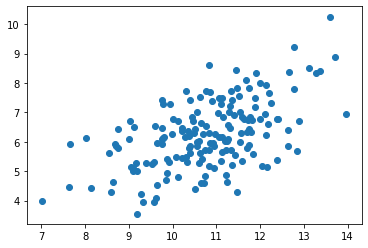

In [89]:
plt.scatter(avg_surp_nounsverbs,avg_surp_full)

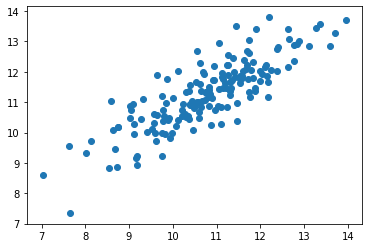

In [90]:
plt.scatter(avg_surp_nounsverbs,avg_surp_nouns)

In [92]:
avg_surp_nva, avg_surp_full = main_nouns('token_surprisals_sentence_file_Original_bypassages.txt',
                                    'token_surprisals_sentence_file_nouns_bypassages.txt',
                                    'token_surprisals_sentence_file_nounsverbsadj_bypassages.txt'
                                         )

8423
8387
8219


['beekeeping', 'encourages', 'the', 'conservation', 'of', 'local', 'habitats', 'it', 'is', 'in', 'every', 'beekeeper', 'interest', 'to', 'conserve', 'local', 'plants', 'that', 'produce', 'pollen', 'as', 'a', 'passive', 'form', 'of', 'agriculture', 'it', 'does', 'not', 'require', 'that', 'native', 'vegetation', 'be', 'cleared', 'to', 'make', 'way', 'for', 'crops', 'beekeepers', 'also', 'discourage', 'the', 'use', 'of', 'pesticides', 'on', 'crops', 'because', 'they', 'could', 'kill', 'the', 'honeybees']
[13.9288195, 14.358519, 2.697638, 6.2564910000000005, 0.198918, 6.894665, 4.182471, 14.600189000000002, 1.7024549999999998, 6.870191999999999, 8.397111, 2.7517905000000003, 0.401429, 0.292653, 4.701908, 3.905729, 6.554962, 5.634440000000001, 7.4760860000000005, 6.111873, 8.866072, 2.5678400000000003, 13.286104000000002, 7.835949, 0.197224, 7.434871, 4.969203, 5.748863, 0.302269, 3.9491339999999995, 5.479972, 10.151932, 7.546736, 0.5724319999999999, 6.489808999999999, 3.82

66
['Ġz', 'ig', 'z', 'agged']
Ġzigzagged
[16.13716, 0.64347, 1.554676, 0.227613]
4.640729750000001
69
['Ġfree', '-', 'cl', 'im', 'bing']
Ġfree-climbing
[17.812615, 4.567978, 9.573212, 1.784089, 0.11201099999999999]
6.769981000000001
70
['Ġhes', 'it', 'antly']
Ġhesitantly
[16.986887, 10.742807, 0.855366]
9.528353333333333


['a', 'major', 'strength', 'of', 'professional', 'skiers', 'is', 'how', 'they', 'use', 'ski', 'poles', 'proper', 'use', 'of', 'ski', 'poles', 'improves', 'their', 'balance', 'and', 'adds', 'flair', 'to', 'their', 'skiing', 'it', 'minimizes', 'the', 'need', 'for', 'upper', 'body', 'movements', 'to', 'regain', 'lost', 'balance', 'while', 'skiing']
[12.015897, 11.183817, 9.098372999999999, 0.5384800000000001, 11.885498, 6.3136815, 2.319457, 6.981035, 2.106868, 5.068503, 10.196344, 3.376004, 18.368991, 2.51416, 0.719892, 2.363033, 0.045475, 9.520047, 4.376052, 7.169688000000001, 1.464116, 9.949622, 13.204521, 0.658837, 1.601936, 5.945264, 7.120792, 6.2049655, 1.834547999

128
['Ġt', 'ect', 'onic']
Ġtectonic
[10.634188, 0.46551800000000004, 0.190411]
3.763372333333333
128
['Ġmount', 'aine', 'ers']
Ġmountaineers
[10.88592, 1.0327790000000001, 1.853407]
4.590702
131
['Ġself', '-', 'defense']
Ġself-defense
[3.4831489999999996, 1.00179, 0.045768]
1.5102356666666665


['murder', 'is', 'the', 'unlawful', 'killing', 'of', 'another', 'human', 'being', 'with', 'intent', 'murder', 'a', 'serious', 'crime', 'because', 'it', 'deprives', 'the', 'victim', 'of', 'their', 'existence', 'killing', 'in', 'self-defense', 'accidentally', 'or', 'in', 'war', 'is', 'not', 'considered', 'murder', 'a', 'convicted', 'murderer', 'is', 'often', 'given', 'a', 'life', 'sentence', 'or', 'the', 'death', 'penalty']
[20.439976, 6.864971000000001, 3.592456, 10.601911999999999, 0.679433, 0.23240100000000002, 3.2114529999999997, 1.9974610000000002, 0.12853299999999998, 4.677653, 2.585159, 13.021915, 11.454686, 9.835777, 1.973291, 9.307239, 2.806075, 4.384712, 2.063128, 1.349758, 0.152148, 5.7

11
['Ġmud', 'sl', 'ides']
Ġmudslides
[9.497086, 7.210807000000001, 0.047785]
5.585226


['hurricanes', 'limbs', 'trees', 'houses', 'their', 'foundations', 'they', 'rains', 'floods', 'mudslides', 'hurricanes', 'storm', 'surge', 'wall', 'ocean', 'water', 'land']
[26.446045, 22.156275, 11.515524000000001, 9.228189, 11.135912, 11.282222, 10.911187, 14.473122, 9.418906, 5.585226, 8.175113, 9.502238, 7.085407000000001, 10.071246, 15.353160999999998, 4.609768, 11.736419]
[11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


18
['Ġlawn', 'm', 'owers']
Ġlawnmowers
[23.970370000000003, 2.5273630000000002, 4.692495]
10.396742666666668
19
['Ġspac', 'ew', 'alks']
Ġspacewalks
[7.547999000000001, 0.015366, 0.6773680000000001]
2.7469110000000003


['team', 'astronauts', 'exterior', 'space', 'shuttle', 'they', 'tools', 'part', 'telescope', 'astronaut', 'bolts', 'pipe', 'replacement', 'part', 'place']
[16.693087, 19.661673, 21.728285, 8.056039

5120
5116
4948


['beekeeping', 'encourages', 'conservation', 'local', 'habitats', 'it', 'beekeeper', 'interest', 'conserve', 'local', 'plants', 'produce', 'pollen', 'passive', 'form', 'agriculture', 'it', 'require', 'native', 'vegetation', 'cleared', 'make', 'way', 'crops', 'beekeepers', 'discourage', 'use', 'pesticides', 'crops', 'they', 'kill', 'honeybees']
[13.9288195, 14.358519, 6.61379, 15.75501, 10.284498, 13.388317, 7.4463285, 13.493965, 18.535854999999998, 3.088357, 6.898591000000001, 11.727619, 8.721233, 15.73354, 11.090138, 11.325111, 10.585099000000001, 9.869454, 8.539415, 5.515662, 15.52319, 14.730014, 7.870646000000001, 11.529882, 4.1329075, 9.359444, 5.706154, 7.622991000000001, 12.899028, 8.099436, 7.770663000000001, 5.2969905]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]


2
['Ġmic', 'roman', 'agers']
Ġmicromanagers
[16.3612459999

152
['Ġsp', 'ong', 'y']
Ġspongy
[11.22071, 7.117439, 1.536944]
6.625031
154
['Ġcut', 'ler', 'y']
Ġcutlery
[14.854710999999998, 0.899328, 0.0042450000000000005]
5.252761333333333


['tropical', 'cyclone', 'storm', 'formed', 'warm', 'tropical', 'sea', 'cyclones', 'produce', 'powerful', 'winds', 'torrential', 'rain', 'tropical', 'cyclone', 'cause', 'high', 'waves', 'coastal', 'flooding', 'tropical', 'cyclone', 'move', 'damage', 'property']
[23.641737, 3.702331, 9.549284, 15.556521, 15.765553, 3.461755, 6.275654, 7.296564, 9.082497, 4.812285, 2.588486, 8.3582995, 3.427928, 4.910126999999999, 0.411647, 11.363348, 6.601163000000001, 5.295745, 15.066479999999999, 2.32887, 2.5533189999999997, 0.21052050000000003, 10.516311, 11.963855, 11.304255]
[161 161 161 161 161 161 161 161 161 161 161 161 161 161 161 161 161 161
 161 161 161 161 161 161 161]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


163
['Ġv', 'ult', 'ures']
Ġvultures
[16.193353, 9.43516

POS Nouns [('hurricanes', 26.446045), ('limbs', 12.583778), ('trees', 17.649945000000002), ('houses', 13.495173000000001), ('their', 12.614469), ('foundations', 12.587544), ('they', 10.571494), ('rains', 3.028525), ('floods', 2.952548), ('mudslides', 6.103606), ('hurricanes', 7.796912), ('storm', 8.746566), ('surge', 1.897472), ('wall', 14.263578), ('ocean', 17.97673), ('water', 5.161883), ('land', 10.351498)]
17
******************************
Filtered nouns [('hurricanes', 26.446045), ('limbs', 10.633992999999998), ('trees', 5.749267), ('houses', 15.126685), ('their', 5.805177), ('foundations', 1.734702), ('they', 17.746796), ('rains', 2.769359), ('floods', 3.505956), ('mudslides', 1.5693130000000002), ('hurricanes', 7.268117999999999), ('storm', 4.581407), ('surge', 0.6666489999999999), ('wall', 9.529630000000001), ('ocean', 11.482883000000001), ('water', 2.408039), ('land', 4.070275)]
Asserted!
12
All tokens [('scientists', 20.179156), ('use', 6.55322), ('several', 10.18256199999999

POS Nouns [('decades', 12.964381), ('cost', 13.299370000000001), ('education', 11.720964), ('law', 6.383215), ('school', 3.027659), ('tuition', 5.03057), ('factor', 20.833315), ('1970s', 8.709930499999999), ('market', 12.763873), ('admission', 15.873459), ('law', 8.450255), ('school', 3.0249599999999996), ('lawyers', 11.604352)]
13
******************************
Filtered nouns [('decades', 3.732025), ('cost', 7.932919999999999), ('education', 7.571548), ('law', 6.592711), ('school', 3.00861), ('tuition', 2.343497), ('factor', 4.679775), ('1970s', 1.3099109999999998), ('market', 10.291681), ('admission', 12.688657000000001), ('law', 2.8771240000000002), ('school', 0.654838), ('lawyers', 3.6103089999999995)]
Asserted!
27
All tokens [('law', 18.689462), ('school', 6.433154), ('faculty', 8.660629), ('often', 10.084439), ('have', 4.2816790000000005), ('minimal', 11.171505999999999), ('experience', 2.8078689999999997), ('in', 1.325963), ('actually', 13.342128), ('practicing', 6.22005), ('law

POS Nouns [('it', 12.705675999999999), ('taste', 19.653004), ('bud', 12.55441), ('tastes', 6.191776), ('taste', 8.981247999999999), ('bud', 0.745067), ('tip', 14.095320999999998), ('tongue', 13.732735), ('you', 12.458188999999999), ('something', 6.915455000000001), ('scientists', 16.056388000000002), ('taste', 2.567718), ('bud', 0.804342), ('tastes', 1.215103)]
14
******************************
Filtered nouns [('it', 12.705675999999999), ('taste', 14.244506), ('bud', 9.086674), ('tastes', 2.725419), ('taste', 4.877082), ('bud', 3.275216), ('tip', 9.190108), ('tongue', 0.386909), ('you', 4.808166), ('something', 4.2032300000000005), ('scientists', 13.597195999999999), ('taste', 0.495587), ('bud', 0.191755), ('tastes', 0.220484)]
Asserted!
42
All tokens [('my', 15.381958), ('sense', 13.781632), ('of', 1.878959), ('taste', 7.301869), ('isn', 7.670679), ('very', 4.652526), ('good', 0.8294530000000001), ('so', 5.726118), ('i', 2.484956), ('tend', 8.953261999999999), ('to', 0.072381), ('eat'

All tokens [('while', 16.409963), ('some', 8.405272), ('owl', 19.479105999999998), ('species', 4.190644), ('have', 3.207967), ('become', 6.475214), ('endangered', 5.872844000000001), ('others', 17.677423), ('are', 1.918106), ('thriving', 4.6730540000000005), ('the', 10.215883999999999), ('barred', 17.628688), ('owl', 1.223889), ('has', 4.119549), ('spread', 7.795951), ('well', 9.40157), ('beyond', 2.00365), ('its', 3.6942269999999997), ('previous', 9.356964), ('habitat', 3.9987239999999997), ('early', 11.562041), ('findings', 10.173407000000001), ('suggest', 2.162238), ('that', 0.795779), ('logging', 13.737172), ('may', 2.834955), ('have', 0.96357), ('facilitated', 7.293125), ('the', 1.08825), ('barred', 17.648917), ('owl', 0.120403), ('invasion', 10.226163)]
HYPHENATED:  
******************************
Nouns [('owl', 24.727748000000002), ('species', 9.807602000000001), ('others', 17.179787), ('owl', 8.565004), ('its', 15.180585), ('habitat', 8.463704), ('findings', 16.79366), ('loggin

POS Nouns [('i', 15.053864), ('trail', 9.944457), ('my', 10.527502), ('buddies', 10.078581), ('me', 0.101087), ('i', 3.359262), ('turn', 8.146235), ('i', 7.664761), ('myself', 6.723231), ('i', 2.3446700000000003), ('stop', 15.341557), ('part', 12.370552), ('slope', 14.911833999999999), ('my', 6.513637), ('skis', 5.567166), ('my', 3.176351), ('poles', 13.382526), ('snow', 14.583848999999999), ('drift', 8.498403999999999), ('hill', 11.413210000000001)]
20
******************************
Filtered nouns [('i', 15.053864), ('trail', 6.391066), ('my', 8.751173), ('buddies', 9.473164), ('me', 0.05587), ('i', 3.039677), ('turn', 4.31922), ('i', 6.532201000000001), ('myself', 1.415445), ('i', 2.13104), ('stop', 1.8257029999999999), ('part', 10.026531), ('slope', 8.168215), ('my', 4.838861), ('skis', 5.151084), ('my', 3.6835430000000002), ('poles', 12.064378999999999), ('snow', 8.049016), ('drift', 8.953884), ('hill', 2.9782919999999997)]
Asserted!
71
All tokens [('a', 12.015897), ('major', 11.18

Nouns [('boy', 20.401908), ('child', 10.626329), ('who', 6.4946410000000006), ('puberty', 20.266148), ('term', 16.226219), ('sex', 9.271227), ('distinctions', 17.071102), ('girls', 11.410441), ('boys', 5.781517), ('games', 12.756875), ('adult', 9.262887), ('male', 4.93405), ('behaving', 15.833763000000001), ('boy', 7.699941)]
14
******************************
POS Nouns [('boy', 20.401908), ('male', 7.877313000000001), ('child', 8.333025), ('who', 5.443014), ('puberty', 6.691794), ('term', 16.885116), ('sex', 7.054908999999999), ('distinctions', 17.401683), ('girls', 18.368273000000002), ('boys', 8.19102), ('games', 8.911767), ('adult', 8.630979), ('male', 1.7894880000000002), ('behaving', 16.382291), ('boy', 13.576154999999998)]
15
******************************
Filtered nouns [('boy', 12.134565), ('male', 6.371224), ('child', 6.255952), ('who', 2.0186889999999997), ('puberty', 1.461798), ('term', 5.701101), ('sex', 11.156121), ('distinctions', 16.060117), ('girls', 6.888782000000001),

POS Nouns [('drought', 24.091088), ('shortage', 14.233678), ('water', 7.356603999999999), ('supply', 2.696685), ('lack', 11.432917999999999), ('rain', 17.638776), ('drought', 10.38252), ('crops', 11.109532000000002), ('plants', 9.363281), ('drought', 1.4085219999999998), ('areas', 11.646599), ('desert', 7.383864), ('famine', 6.676394999999999), ('numbers', 5.8440010000000004), ('people', 9.714767), ('dust', 17.008028), ('bowls', 13.476881)]
17
******************************
Filtered nouns [('drought', 18.659554), ('shortage', 9.239253), ('water', 3.1786659999999998), ('supply', 4.462086), ('lack', 7.390214), ('rain', 4.324362000000001), ('drought', 8.279303), ('crops', 9.598724), ('plants', 6.252015), ('drought', 0.80472), ('areas', 11.081969), ('desert', 3.3124800000000003), ('famine', 6.006161), ('numbers', 4.059225), ('people', 0.9207770000000001), ('dust', 17.340982999999998), ('bowls', 9.25101)]
Asserted!
100
All tokens [('eagles', 12.1114505), ('are', 5.193839), ('large', 8.76212

All tokens [('a', 12.015897), ('hammer', 14.230029), ('is', 5.162923999999999), ('a', 1.474086), ('tool', 3.9300589999999995), ('used', 1.48595), ('to', 0.66291), ('deliver', 9.341723), ('an', 4.687711), ('impact', 5.071607), ('to', 4.355919), ('an', 2.6663419999999998), ('object', 0.22083699999999998), ('a', 8.039541999999999), ('hammer', 0.295453), ('is', 0.588699), ('most', 8.636467), ('often', 2.450333), ('used', 1.077715), ('to', 1.1489040000000001), ('drive', 7.097932000000001), ('nails', 5.949218), ('into', 2.5804270000000002), ('wood', 5.387428), ('the', 5.443352), ('claw', 11.794167999999999), ('on', 6.052917), ('the', 1.356642), ('head', 6.3909839999999996), ('can', 6.595866), ('be', 0.693046), ('used', 0.9998969999999999), ('to', 0.281642), ('remove', 6.386723), ('nails', 2.448051), ('hammers', 3.4616325), ('vary', 10.032846000000001), ('in', 0.42407100000000003), ('the', 5.54491), ('shape', 3.148515), ('of', 0.960255), ('the', 1.929554), ('head', 3.3137849999999998), ('and'

Nouns [('mountain', 22.776716), ('landform', 10.658242), ('land', 9.673108000000001), ('mountains', 10.694896), ('hills', 10.959648), ('snow', 10.949375), ('top', 10.354192999999999), ('range', 11.881252), ('mountains', 5.513162), ('forms', 14.943658), ('plate', 15.281684), ('collision', 16.722176), ('mountaineers', 4.600045333333333), ('people', 10.990337), ('who', 6.122749), ('mountains', 14.128360999999998)]
16
******************************
POS Nouns [('mountain', 22.776716), ('landform', 10.658242), ('land', 11.128303), ('mountains', 11.208683), ('hills', 11.813527), ('snow', 9.461402), ('top', 12.637354), ('range', 12.794325), ('mountains', 8.276785), ('forms', 14.708542000000001), ('plate', 3.4674650000000002), ('collision', 10.882508999999999), ('mountaineers', 4.543110666666667), ('people', 13.468525), ('who', 4.650261), ('mountains', 4.583277)]
16
******************************
Filtered nouns [('mountain', 13.985736), ('landform', 10.087783), ('land', 4.608887), ('mountains',

POS Nouns [('saw', 17.954559), ('tool', 15.869352), ('blade', 14.178566), ('wire', 12.728334), ('materials', 12.732643), ('points', 5.371123000000001), ('side', 10.681735), ('saw', 9.631155999999999), ('teeth', 10.304731), ('saws', 3.2764115), ('hand', 7.833327000000001), ('motor', 5.856495), ('gas', 15.816006), ('engine', 3.9738900000000004), ('saws', 1.3931355), ('forestry', 18.15486), ('construction', 9.834166999999999), ('carpentry', 7.915462), ('medicine', 14.197848)]
19
******************************
Filtered nouns [('saw', 15.752485), ('tool', 5.319452), ('blade', 7.381094), ('wire', 11.910092), ('materials', 6.831857), ('points', 5.291715), ('side', 7.440146), ('saw', 0.10686), ('teeth', 8.475811), ('saws', 3.4981505), ('hand', 3.886688), ('motor', 2.9639990000000003), ('gas', 8.261274), ('engine', 3.405796), ('saws', 1.2460944999999999), ('forestry', 9.329915), ('construction', 8.593293), ('carpentry', 9.335843), ('medicine', 11.272966)]
Asserted!
143
All tokens [('a', 12.0158

Nouns [('toaster', 10.828105), ('kitchen', 12.473917), ('appliance', 5.054702), ('bread', 12.66489), ('heating', 13.726232999999999), ('elements', 10.175023), ('pop', 16.820137), ('toasters', 5.0693675), ('bread', 7.661625), ('slot', 19.621955), ('it', 11.276021), ('toaster', 3.0531935), ('ovens', 3.6689974999999997), ('door', 9.531669), ('side', 9.526953), ('tray', 7.963553), ('temperature', 11.037025), ('control', 4.588039), ('they', 11.495667), ('bread', 11.081146), ('toppings', 6.208791), ('garlic', 13.013067), ('cheese', 8.607806)]
23
******************************
POS Nouns [('toaster', 10.828105), ('kitchen', 12.473917), ('appliance', 5.054702), ('bread', 8.256765), ('heating', 11.479627), ('elements', 5.451957), ('pop', 17.085747), ('toasters', 5.233169999999999), ('bread', 1.324735), ('slot', 21.505189), ('it', 9.855751), ('toaster', 2.4586305000000004), ('ovens', 3.524592), ('door', 9.134312), ('side', 9.318424), ('tray', 8.870411), ('temperature', 13.388710000000001), ('cont

In [93]:
avg_surp_content, avg_surp_full = main_nouns('token_surprisals_sentence_file_Original_bypassages.txt',
                                    'token_surprisals_sentence_file_nouns_bypassages.txt',
                                    'token_surprisals_sentence_file_contentwords_bypassages.txt'
                                         )

8423
8387
8219


['beekeeping', 'encourages', 'the', 'conservation', 'of', 'local', 'habitats', 'it', 'is', 'in', 'every', 'beekeeper', 'interest', 'to', 'conserve', 'local', 'plants', 'that', 'produce', 'pollen', 'as', 'a', 'passive', 'form', 'of', 'agriculture', 'it', 'does', 'not', 'require', 'that', 'native', 'vegetation', 'be', 'cleared', 'to', 'make', 'way', 'for', 'crops', 'beekeepers', 'also', 'discourage', 'the', 'use', 'of', 'pesticides', 'on', 'crops', 'because', 'they', 'could', 'kill', 'the', 'honeybees']
[13.9288195, 14.358519, 2.697638, 6.2564910000000005, 0.198918, 6.894665, 4.182471, 14.600189000000002, 1.7024549999999998, 6.870191999999999, 8.397111, 2.7517905000000003, 0.401429, 0.292653, 4.701908, 3.905729, 6.554962, 5.634440000000001, 7.4760860000000005, 6.111873, 8.866072, 2.5678400000000003, 13.286104000000002, 7.835949, 0.197224, 7.434871, 4.969203, 5.748863, 0.302269, 3.9491339999999995, 5.479972, 10.151932, 7.546736, 0.5724319999999999, 6.489808999999999, 3.82

66
['Ġz', 'ig', 'z', 'agged']
Ġzigzagged
[16.13716, 0.64347, 1.554676, 0.227613]
4.640729750000001
69
['Ġfree', '-', 'cl', 'im', 'bing']
Ġfree-climbing
[17.812615, 4.567978, 9.573212, 1.784089, 0.11201099999999999]
6.769981000000001
70
['Ġhes', 'it', 'antly']
Ġhesitantly
[16.986887, 10.742807, 0.855366]
9.528353333333333


['a', 'major', 'strength', 'of', 'professional', 'skiers', 'is', 'how', 'they', 'use', 'ski', 'poles', 'proper', 'use', 'of', 'ski', 'poles', 'improves', 'their', 'balance', 'and', 'adds', 'flair', 'to', 'their', 'skiing', 'it', 'minimizes', 'the', 'need', 'for', 'upper', 'body', 'movements', 'to', 'regain', 'lost', 'balance', 'while', 'skiing']
[12.015897, 11.183817, 9.098372999999999, 0.5384800000000001, 11.885498, 6.3136815, 2.319457, 6.981035, 2.106868, 5.068503, 10.196344, 3.376004, 18.368991, 2.51416, 0.719892, 2.363033, 0.045475, 9.520047, 4.376052, 7.169688000000001, 1.464116, 9.949622, 13.204521, 0.658837, 1.601936, 5.945264, 7.120792, 6.2049655, 1.834547999

131
['Ġself', '-', 'defense']
Ġself-defense
[3.4831489999999996, 1.00179, 0.045768]
1.5102356666666665


['murder', 'is', 'the', 'unlawful', 'killing', 'of', 'another', 'human', 'being', 'with', 'intent', 'murder', 'a', 'serious', 'crime', 'because', 'it', 'deprives', 'the', 'victim', 'of', 'their', 'existence', 'killing', 'in', 'self-defense', 'accidentally', 'or', 'in', 'war', 'is', 'not', 'considered', 'murder', 'a', 'convicted', 'murderer', 'is', 'often', 'given', 'a', 'life', 'sentence', 'or', 'the', 'death', 'penalty']
[20.439976, 6.864971000000001, 3.592456, 10.601911999999999, 0.679433, 0.23240100000000002, 3.2114529999999997, 1.9974610000000002, 0.12853299999999998, 4.677653, 2.585159, 13.021915, 11.454686, 9.835777, 1.973291, 9.307239, 2.806075, 4.384712, 2.063128, 1.349758, 0.152148, 5.77846, 10.958454, 6.5547, 5.550895, 1.5102356666666665, 14.060635999999999, 4.005104, 4.981879, 9.212879, 2.715005, 3.869534, 5.978024, 1.367245, 6.7042720000000005, 9.227969, 1.33883600000000



['team', 'astronauts', 'exterior', 'space', 'shuttle', 'they', 'tools', 'part', 'telescope', 'astronaut', 'bolts', 'pipe', 'replacement', 'part', 'place']
[16.693087, 19.661673, 21.728285, 8.056039, 4.429525, 12.923698, 20.206027, 11.373477000000001, 16.069708, 8.865308, 14.042778, 15.916928, 11.551702, 6.055343, 13.719697]
[21 21 21 21 21 21 21 21 21 21 21 21 21 21 21]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]




['person', 'his', 'her', 'response', 'situations', 'person', 'unemployment', 'fulltime', 'there', 'stresses', 'traffic', 'there', 'stresses', 'divorce', 'loss', 'child']
[17.956166, 15.607907, 14.290099, 13.054084, 17.016807999999997, 9.72909, 18.965101999999998, 8.485063, 11.19489, 18.49176, 14.854256, 6.372288, 3.5913980000000003, 12.321954, 12.926667, 11.686327]
[31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


34
['Ġt', 'ux', 'edo']
Ġtuxedo
[11.101422, 7.896688, 1.8095450000000002]
6.935885
35
['Ġt', '

[11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 11]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


18
['Ġlawn', 'm', 'owers']
Ġlawnmowers
[12.666456, 1.740101, 2.428658]
5.611738333333332
19
['Ġspac', 'ew', 'alks']
Ġspacewalks
[10.35293, 0.101048, 0.943055]
3.799011


['team', 'astronauts', 'floated', 'together', 'exterior', 'space', 'shuttle', 'they', 'carried', 'tools', 'needed', 'repair', 'broken', 'part', 'huge', 'telescope', 'astronaut', 'loosened', 'bolts', 'pipe', 'other', 'fitted', 'replacement', 'part', 'place']
[16.693087, 19.661673, 14.605386, 9.375564, 20.912506, 6.288782, 6.1944040000000005, 11.81248, 7.800385, 11.157141000000001, 8.360298, 16.483739, 12.682397, 7.682923, 16.008067999999998, 9.87545, 8.928115, 8.1203185, 7.595565, 15.830162, 12.083452000000001, 14.38515, 11.40873, 4.107176, 13.033562]
[21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21
 21]
[1, 2, 3, 4, 5, 6, 7, 8

94
['Ġsa', 'h', 'ara']
Ġsahara
[14.402367000000002, 8.656645, 4.480575]
9.179862333333334
98
['Ġsob', 'ri', 'ety']
Ġsobriety
[1.28104, 0.026994, 0.005906000000000001]
0.43798
101
['Ġse', 'ab', 'ed']
Ġseabed
[9.390075, 2.038719, 0.28954]
3.9061113333333335


['earthquakes', 'shake', 'ground', 'knock', 'buildings', 'other', 'structures', 'shaking', 'also', 'trigger', 'landslides', 'volcanic', 'activity', 'most', 'earthquakes', 'caused', 'release', 'energy', 'earth', 'crust', 'earthquake', 'sea', 'displace', 'seabed', 'cause', 'tsunami']
[25.969347, 11.247828, 12.280814999999999, 22.019247, 7.111992999999999, 13.703160999999998, 11.036133, 17.552178, 12.663881, 9.048364, 2.2331845, 18.900814, 4.498568, 10.106276, 4.737457, 8.512056, 14.845170000000001, 12.412421, 14.545279999999998, 7.755797, 6.222422, 12.694233, 9.5097565, 3.9061113333333335, 10.350956, 7.53043]
[101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101
 101 101 101 101 101 101 101 101]
[1, 2, 3, 4, 5, 6, 7

1
All tokens [('beekeeping', 13.9288195), ('encourages', 14.358519), ('the', 2.697638), ('conservation', 6.2564910000000005), ('of', 0.198918), ('local', 6.894665), ('habitats', 4.182471), ('it', 14.600189000000002), ('is', 1.7024549999999998), ('in', 6.870191999999999), ('every', 8.397111), ('beekeeper', 2.7517905000000003), ('interest', 0.401429), ('to', 0.292653), ('conserve', 4.701908), ('local', 3.905729), ('plants', 6.554962), ('that', 5.634440000000001), ('produce', 7.4760860000000005), ('pollen', 6.111873), ('as', 8.866072), ('a', 2.5678400000000003), ('passive', 13.286104000000002), ('form', 7.835949), ('of', 0.197224), ('agriculture', 7.434871), ('it', 4.969203), ('does', 5.748863), ('not', 0.302269), ('require', 3.9491339999999995), ('that', 5.479972), ('native', 10.151932), ('vegetation', 7.546736), ('be', 0.5724319999999999), ('cleared', 6.489808999999999), ('to', 3.823035), ('make', 4.04695), ('way', 1.472742), ('for', 0.012545), ('crops', 6.637278), ('beekeepers', 2.1485

POS Nouns [('scientists', 20.179156), ('methods', 3.5617080000000003), ('evidence', 15.480047), ('hurricanes', 15.671160999999998), ('storms', 5.026199), ('layers', 10.942761), ('beach', 13.068359), ('sand', 3.265901), ('bottoms', 8.663618), ('lakes', 7.5804339999999995), ('trees', 12.543811999999999), ('hurricanes', 9.702618), ('record', 11.820618), ('storm', 8.955702), ('their', 14.177195999999999), ('growth', 9.654483), ('rings', 10.166825)]
17
******************************
Filtered nouns [('scientists', 20.179156), ('methods', 3.5617080000000003), ('evidence', 4.387067), ('hurricanes', 13.544623999999999), ('storms', 6.466059), ('layers', 11.580177), ('beach', 13.057227000000001), ('sand', 1.758054), ('bottoms', 5.347046000000001), ('lakes', 5.241601), ('trees', 12.066761), ('hurricanes', 5.867139), ('record', 7.619364999999999), ('storm', 2.714603), ('their', 3.712917), ('growth', 8.685689), ('rings', 6.496)]
Asserted!
13
All tokens [('american', 11.320916), ('ice', 12.320486), (

POS Nouns [('decades', 12.964381), ('cost', 13.299370000000001), ('education', 11.720964), ('law', 6.445766000000001), ('school', 2.973793), ('tuition', 5.162628), ('factor', 21.199063), ('1970s', 8.752879), ('market', 13.011664999999999), ('admission', 15.803070000000002), ('law', 8.507675), ('school', 3.005891), ('lawyers', 11.681999000000001)]
13
******************************
Filtered nouns [('decades', 3.732025), ('cost', 7.932919999999999), ('education', 7.571548), ('law', 6.592711), ('school', 3.00861), ('tuition', 2.343497), ('factor', 4.679775), ('1970s', 1.3099109999999998), ('market', 10.291681), ('admission', 12.688657000000001), ('law', 2.8771240000000002), ('school', 0.654838), ('lawyers', 3.6103089999999995)]
Asserted!
27
All tokens [('law', 18.689462), ('school', 6.433154), ('faculty', 8.660629), ('often', 10.084439), ('have', 4.2816790000000005), ('minimal', 11.171505999999999), ('experience', 2.8078689999999997), ('in', 1.325963), ('actually', 13.342128), ('practicing

All tokens [('it', 12.705675999999999), ('was', 3.9450790000000002), ('once', 8.301934), ('believed', 6.013757), ('that', 0.678809), ('each', 8.821416000000001), ('taste', 14.244506), ('bud', 9.086674), ('responded', 14.791282999999998), ('to', 1.209785), ('one', 4.3252120000000005), ('of', 2.498226), ('the', 2.492973), ('four', 3.499321), ('basic', 5.5925), ('tastes', 2.725419), ('that', 11.017299000000001), ('is', 2.3481919999999996), ('a', 5.649964), ('taste', 4.877082), ('bud', 3.275216), ('on', 9.042259), ('the', 1.803764), ('tip', 9.190108), ('of', 0.37196999999999997), ('the', 0.7673989999999999), ('tongue', 0.386909), ('would', 9.566291), ('respond', 3.654864), ('only', 7.084282000000001), ('if', 5.085054), ('you', 4.808166), ('were', 3.902142), ('eating', 5.607195), ('something', 4.2032300000000005), ('sweet', 4.2451419999999995), ('scientists', 13.597195999999999), ('now', 4.1574290000000005), ('think', 3.7915059999999996), ('that', 1.2522870000000002), ('a', 5.425922), ('sin

POS Nouns [('eagle', 24.963075), ('owl', 10.087375), ('bird', 5.672027), ('it', 9.273598), ('ear', 17.480835), ('tufts', 6.2244675), ('horns', 14.243592000000001), ('its', 5.567626000000001), ('eyes', 2.516422), ('they', 10.062948), ('you', 12.477708999999999), ('owl', 8.249852), ('hunts', 11.856879), ('night', 10.65648), ('darkness', 14.898382000000002)]
15
******************************
Filtered nouns [('eagle', 14.248892000000001), ('owl', 10.006497999999999), ('bird', 2.400591), ('it', 5.928006), ('ear', 13.029424), ('tufts', 3.4330395), ('horns', 7.380628999999999), ('its', 3.8191349999999997), ('eyes', 2.447172), ('they', 2.32111), ('you', 4.941604), ('owl', 4.168691), ('hunts', 10.341322), ('night', 0.34848), ('darkness', 4.9927410000000005)]
Asserted!
56
All tokens [('while', 16.409963), ('some', 8.405272), ('owl', 19.479105999999998), ('species', 4.190644), ('have', 3.207967), ('become', 6.475214), ('endangered', 5.872844000000001), ('others', 17.677423), ('are', 1.918106), ('

All tokens [('i', 15.053864), ('hesitantly', 9.528353333333333), ('skied', 10.1845695), ('down', 5.103680000000001), ('the', 1.493854), ('steep', 9.304182), ('trail', 6.391066), ('that', 6.1178), ('my', 8.751173), ('buddies', 9.473164), ('convinced', 12.569225), ('me', 0.05587), ('to', 0.552182), ('try', 7.5950169999999995), ('i', 3.039677), ('made', 6.4020980000000005), ('a', 2.9809240000000004), ('bad', 8.059624000000001), ('turn', 4.31922), ('and', 1.7852459999999999), ('i', 6.532201000000001), ('found', 7.866411), ('myself', 1.415445), ('tumbling', 5.34688), ('down', 1.3492110000000002), ('i', 2.13104), ('finally', 7.753392999999999), ('came', 4.545415), ('to', 0.963094), ('a', 0.441597), ('stop', 1.8257029999999999), ('at', 3.1943200000000003), ('a', 1.505168), ('flat', 8.465506), ('part', 10.026531), ('of', 0.445917), ('the', 0.192958), ('slope', 8.168215), ('my', 4.838861), ('skis', 5.151084), ('were', 1.5000959999999999), ('nowhere', 9.962665), ('to', 0.6736340000000001), ('be'

Nouns [('blender', 26.978156), ('kitchen', 16.798163), ('appliance', 5.351091), ('ingredients', 10.298267999999998), ('food', 10.742583), ('blenders', 6.183226), ('glass', 12.663300999999999), ('plastic', 11.026135), ('container', 5.366046), ('blade', 13.816581), ('bottom', 11.307733), ('blenders', 3.9319065), ('milk', 9.937469), ('shakes', 13.629122), ('fruit', 9.584228), ('smoothies', 3.7246585), ('blenders', 1.9606605), ('drinks', 10.951016000000001), ('ice', 6.383005000000001)]
19
******************************
POS Nouns [('blender', 26.978156), ('kitchen', 16.798163), ('appliance', 5.351091), ('ingredients', 5.346692), ('food', 7.226862), ('blenders', 6.332993), ('glass', 11.393423), ('plastic', 11.410446), ('container', 6.704638), ('blade', 8.651992), ('bottom', 12.451547999999999), ('blenders', 4.1231735), ('milk', 9.557485), ('shakes', 9.564594999999999), ('fruit', 14.042879000000001), ('smoothies', 2.6566905), ('blenders', 1.7881209999999998), ('drinks', 1.2435100000000001), (

POS Nouns [('driving', 6.077325), ('act', 11.599594), ('driving', 8.189455), ('effects', 15.164832999999998), ('alcohol', 9.237188), ('driving', 0.180007), ('vehicle', 11.579533), ('crime', 11.126365), ('world', 18.587725), ('it', 10.276772), ('role', 9.616054), ('half', 8.269934), ('vehicle', 11.937569), ('deaths', 6.13122), ('drivers', 8.025774), ('field', 18.695678), ('sobriety', 0.43798), ('breathing', 16.883288), ('tests', 8.393022)]
19
******************************
Filtered nouns [('driving', 6.077325), ('act', 7.987402), ('driving', 1.6334879999999998), ('effects', 14.156072), ('alcohol', 0.684762), ('driving', 0.035446), ('vehicle', 8.403917999999999), ('crime', 4.976833), ('world', 3.369214), ('it', 9.198302), ('role', 3.48032), ('half', 6.291333), ('deaths', 1.572267), ('drivers', 6.662821000000001), ('field', 18.570483), ('sobriety', 1.2965136666666666), ('breathing', 17.133119), ('tests', 2.543854)]
*****UNEQUAL LENGTHS!*******
Filtered nouns [('driving', 6.077325), ('act'

Nouns [('girl', 20.195359), ('human', 15.554829000000002), ('who', 7.64155), ('maturity', 23.560875), ('puberty', 16.50947), ('body', 10.024241), ('girl', 8.609805), ('woman', 7.2742830000000005), ('girls', 8.568354), ('dolls', 14.063167000000002), ('games', 14.037428), ('girls', 3.4399919999999997), ('hair', 9.730996000000001), ('dresses', 9.673303), ('skirts', 11.668239999999999)]
15
******************************
POS Nouns [('girl', 20.195359), ('human', 9.863433), ('who', 7.476135), ('maturity', 4.633744999999999), ('puberty', 17.553279), ('body', 9.67958), ('girl', 9.310486000000001), ('woman', 11.136244999999999), ('girls', 8.049883), ('dolls', 7.874428999999999), ('games', 7.343394), ('girls', 3.3741470000000002), ('hair', 0.497547), ('dresses', 4.576381), ('skirts', 9.720122)]
15
******************************
Filtered nouns [('girl', 10.927186), ('human', 6.416186), ('who', 5.188053), ('maturity', 4.441084), ('puberty', 5.45714), ('body', 5.247234), ('girl', 0.7979609999999999

POS Nouns [('milk', 22.346441), ('liquid', 8.219856), ('mammals', 8.129878999999999), ('their', 5.669786), ('animals', 6.057799), ('milk', 2.706963), ('they', 13.157756), ('food', 3.80533), ('dairy', 8.303057), ('products', 3.076869), ('cheese', 16.577467000000002), ('butter', 11.847585), ('milk', 10.607834), ('liquid', 10.028768), ('soybeans', 7.7475355), ('coconuts', 5.448564), ('milk', 4.70889)]
17
******************************
Filtered nouns [('milk', 22.346441), ('liquid', 2.223739), ('mammals', 4.3012760000000005), ('their', 2.609945), ('animals', 8.294339), ('milk', 1.05481), ('they', 1.329867), ('food', 1.236206), ('dairy', 12.008774), ('products', 1.606061), ('cheese', 2.992516), ('butter', 4.427427), ('milk', 0.530335), ('liquid', 12.759407000000001), ('soybeans', 6.7838245), ('coconuts', 3.5656136666666662), ('milk', 1.479663)]
Asserted!
127
All tokens [('mosquitos', 13.646221500000001), ('are', 2.5172849999999998), ('thin', 15.240628), ('small', 11.841702), ('flying', 7.88

POS Nouns [('salmon', 24.65813), ('fish', 8.46412), ('water', 8.487757), ('ocean', 13.157829000000001), ('spawn', 16.680396), ('salmon', 9.473801), ('flesh', 12.184239), ('protein', 5.52081), ('content', 1.609093), ('taste', 5.286924), ('salmon', 3.271061), ('sushi', 11.631979), ('ways', 10.390489), ('salmon', 2.762932), ('fish', 2.794816), ('it', 10.138347999999999), ('wild', 7.119330000000001)]
17
******************************
Filtered nouns [('salmon', 24.65813), ('fish', 6.116708999999999), ('water', 1.724486), ('ocean', 2.0645189999999998), ('spawn', 6.430776), ('salmon', 11.646422), ('flesh', 11.831636), ('protein', 5.178959), ('content', 0.989174), ('taste', 5.882192), ('salmon', 3.6939870000000004), ('sushi', 9.294414999999999), ('ways', 2.8722220000000003), ('salmon', 3.270926), ('fish', 0.604193), ('it', 2.570178), ('wild', 0.9517049999999999)]
Asserted!
142
All tokens [('a', 12.015897), ('saw', 15.752485), ('is', 6.8017270000000005), ('a', 1.559588), ('tool', 5.319452), ('t

Nouns [('theft', 21.542684), ('taking', 12.355329), ('person', 17.35116), ('property', 9.775038), ('their', 14.003770000000001), ('consent', 10.911837), ('thieves', 14.971332), ('something', 14.335764999999999), ('it', 9.240545), ('receivers', 18.813467000000003), ('theft', 4.660007), ('crime', 11.293089), ('jail', 15.010538), ('fines', 11.968732000000001), ('espionage', 15.029644000000001), ('theft', 3.5274900000000002), ('ideas', 14.041061), ('property', 12.023434)]
18
******************************
POS Nouns [('theft', 21.542684), ('taking', 12.355329), ('person', 17.35116), ('property', 9.775038), ('their', 14.003770000000001), ('consent', 10.911837), ('thieves', 14.971332), ('something', 13.457609), ('it', 4.765718), ('receivers', 18.24869), ('theft', 4.704462), ('crime', 11.305194), ('jail', 13.697294), ('fines', 12.178052000000001), ('espionage', 7.438347), ('theft', 3.3455440000000003), ('ideas', 15.090338000000001), ('property', 0.119095)]
18
******************************
Fil

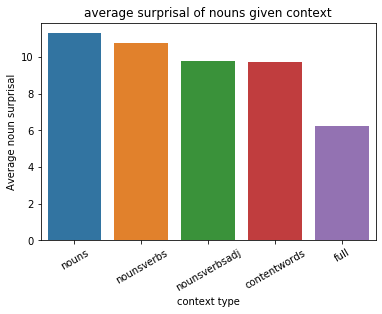

In [98]:
plot_df = pd.DataFrame({
    "nouns": avg_surp_nouns,
    "nounsverbs": avg_surp_nounsverbs,
    "nounsverbsadj": avg_surp_nva,
    "contentwords": avg_surp_content,
    "full": avg_surp_full
})

plot_df2 = plot_df.agg({"nouns": ["mean","sem"], "nounsverbs": ["mean","sem"],
                        "nounsverbsadj": ["mean","sem"], "contentwords": ["mean","sem"],
                        "full": ["mean","sem"]})
df2_transposed = plot_df2.T
df2_transposed = df2_transposed.reset_index()
df2_transposed

sns.barplot(x="index", y="mean", data=df2_transposed)
plt.xticks(rotation=30)
plt.xlabel("context type")
plt.ylabel("Average noun surprisal")
plt.title("average surprisal of nouns given context")
plt.show()

# for all POS tokens

In [121]:
def get_avg_surprisal_lists_nouns(original_df, pos_df):
    average_sentence_surprisals_pos = []
    average_sentence_surprisals_full = []

    sentence_ids = np.unique(list(original_df["sentence_id"]))

    for sent_id in sentence_ids:
        print(sent_id)

        all_tokens = list(original_df.loc[original_df["sentence_id"] == sent_id]["token"])
        all_surp = list(original_df.loc[original_df["sentence_id"] == sent_id]["surprisal"])
        all_zip = list(zip(all_tokens,all_surp))
        all_zip = [elm for elm in all_zip if elm[0] != '<|endoftext|>']
        hyphenated = [elm for elm in all_tokens if "-" in elm]
        if hyphenated != []:
            hyphenated = hyphenated[0]
        else:
            hyphenated = ""
        print("All tokens", all_zip)
        print("HYPHENATED: ", hyphenated)
        print("*"*30)    

        pos = list(pos_df.loc[pos_df["sentence_id"] == sent_id]["token"])
        pos_surp = list(pos_df.loc[pos_df["sentence_id"] == sent_id]["surprisal"])
        pos_zip = list(zip(pos,pos_surp))
        pos_zip = [elm for elm in pos_zip if elm[0] != '<|endoftext|>']
        print("POS ", pos_zip)
        print(len(pos_zip))
        print("*"*30)

        final_pos_zip, final_pos = get_final_pos_zip(pos_zip,pos,all_tokens,hyphenated)

        #filter out noun surprisals from original condition
        use_list = [all_zip[i] for i in range(len(all_zip)) if all_zip[i][0] in final_pos]#filtered_nouns[sent_id-1]]
        print("Filtered pos", use_list)
        try:
            assert len(use_list) == len(final_noun_zip)
        except:
            print("*****UNEQUAL LENGTHS!*******")
            print("Filtered pos", final_pos_zip)
            print("POS", pos_zip)
            print("\n")
        print("Asserted!")
        #print(use_list)
        #print("\n")

        #average noun surprisal (context: nouns only) and average noun surprisal (context: all tokens) to list
        average_sentence_surprisals_pos.append(np.sum([elm[1] for elm in final_pos_zip])/len(final_pos_zip))
        average_sentence_surprisals_full.append(np.sum([elm[1] for elm in use_list])/len(use_list))

    return average_sentence_surprisals_pos, average_sentence_surprisals_full
    

In [122]:
# align tokenizations between spacy & gpt2

def get_final_pos_zip(n_zip,pos,all_tokens,hyphenated): #keep n_zip but this is now independent of nouns!
    final_pos_zip = []
    found = 0
    
    for ind in range(len(n_zip)):
        #print(n_zip[ind])
        
        if ind < len(pos)-2:
            candidates = [n_zip[ind][0]+"-"+n_zip[ind+1][0],
                          n_zip[ind][0]+n_zip[ind+1][0]+n_zip[ind+2][0]]
            special_candidate = None
        elif ind < len(n_zip)-1:
            candidates = [n_zip[ind][0]+"-"+n_zip[ind+1][0]]
            special_candidate = "x"+n_zip[ind][0]+n_zip[ind+1][0] #didn't tokenize x-ray here
        else:
            candidates = []
            special_candidate = None
            
        if any(cand == hyphenated for cand in candidates):
            #print("hyphenated")
            for cand_i, cand in enumerate(candidates):
                if cand == hyphenated:
                    if cand_i == 0:
                        target = tuple([cand, np.mean([n_zip[ind][1],n_zip[ind+1][1]])])
                        rest = [n_zip[j] for j in range(len(n_zip)) if j > ind+1]
                    else:
                        target = tuple([cand, np.mean([n_zip[ind][1],
                                                           n_zip[ind+1][1],n_zip[ind+2][1]])])
                        rest = [n_zip[j] for j in range(len(n_zip)) if j > ind+2]
            final_pos_zip += [target]
            final_pos_zip += rest
            break
            
        elif (found == 0) and (special_candidate == hyphenated):
            #print("special candidate found: ", i, ind, hyphenated)
            found = 1
            rest = [n_zip[j] for j in range(len(n_zip)) if j > ind+1]
            target = tuple([hyphenated, np.mean([n_zip[ind][1],n_zip[ind+1][1]])])
            final_pos_zip += [target]
            if rest != []:
                final_pos_zip += rest
            break
        
        elif n_zip[ind][0] in all_tokens[ind:]:
            #print("normal noun: ", n_zip[ind][0])
            final_pos_zip += [n_zip[ind]]
            
        else:
            #print("not a noun")
            continue
            
    final_pos = [elm[0] for elm in final_pos_zip]
    return final_pos_zip, final_pos #final pos general

In [123]:
def main_pos(textfile_original, textfile):
    original_df = prepare_datasets(textfile_original)
    pos_df = prepare_datasets(textfile)

    avg_surp_pos, avg_surp_full = get_avg_surprisal_lists_nouns(original_df, pos_df)
    return avg_surp_pos, avg_surp_full

In [125]:
avg_surp_nouns, avg_surp_full = main_pos('token_surprisals_sentence_file_Original_bypassages.txt',
                                    'token_surprisals_sentence_file_nouns_bypassages.txt')

8423
8387
8219


['beekeeping', 'encourages', 'the', 'conservation', 'of', 'local', 'habitats', 'it', 'is', 'in', 'every', 'beekeeper', 'interest', 'to', 'conserve', 'local', 'plants', 'that', 'produce', 'pollen', 'as', 'a', 'passive', 'form', 'of', 'agriculture', 'it', 'does', 'not', 'require', 'that', 'native', 'vegetation', 'be', 'cleared', 'to', 'make', 'way', 'for', 'crops', 'beekeepers', 'also', 'discourage', 'the', 'use', 'of', 'pesticides', 'on', 'crops', 'because', 'they', 'could', 'kill', 'the', 'honeybees']
[13.9288195, 14.358519, 2.697638, 6.2564910000000005, 0.198918, 6.894665, 4.182471, 14.600189000000002, 1.7024549999999998, 6.870191999999999, 8.397111, 2.7517905000000003, 0.401429, 0.292653, 4.701908, 3.905729, 6.554962, 5.634440000000001, 7.4760860000000005, 6.111873, 8.866072, 2.5678400000000003, 13.286104000000002, 7.835949, 0.197224, 7.434871, 4.969203, 5.748863, 0.302269, 3.9491339999999995, 5.479972, 10.151932, 7.546736, 0.5724319999999999, 6.489808999999999, 3.82

66
['Ġz', 'ig', 'z', 'agged']
Ġzigzagged
[16.13716, 0.64347, 1.554676, 0.227613]
4.640729750000001
69
['Ġfree', '-', 'cl', 'im', 'bing']
Ġfree-climbing
[17.812615, 4.567978, 9.573212, 1.784089, 0.11201099999999999]
6.769981000000001
70
['Ġhes', 'it', 'antly']
Ġhesitantly
[16.986887, 10.742807, 0.855366]
9.528353333333333


['a', 'major', 'strength', 'of', 'professional', 'skiers', 'is', 'how', 'they', 'use', 'ski', 'poles', 'proper', 'use', 'of', 'ski', 'poles', 'improves', 'their', 'balance', 'and', 'adds', 'flair', 'to', 'their', 'skiing', 'it', 'minimizes', 'the', 'need', 'for', 'upper', 'body', 'movements', 'to', 'regain', 'lost', 'balance', 'while', 'skiing']
[12.015897, 11.183817, 9.098372999999999, 0.5384800000000001, 11.885498, 6.3136815, 2.319457, 6.981035, 2.106868, 5.068503, 10.196344, 3.376004, 18.368991, 2.51416, 0.719892, 2.363033, 0.045475, 9.520047, 4.376052, 7.169688000000001, 1.464116, 9.949622, 13.204521, 0.658837, 1.601936, 5.945264, 7.120792, 6.2049655, 1.834547999

131
['Ġself', '-', 'defense']
Ġself-defense
[3.4831489999999996, 1.00179, 0.045768]
1.5102356666666665


['murder', 'is', 'the', 'unlawful', 'killing', 'of', 'another', 'human', 'being', 'with', 'intent', 'murder', 'a', 'serious', 'crime', 'because', 'it', 'deprives', 'the', 'victim', 'of', 'their', 'existence', 'killing', 'in', 'self-defense', 'accidentally', 'or', 'in', 'war', 'is', 'not', 'considered', 'murder', 'a', 'convicted', 'murderer', 'is', 'often', 'given', 'a', 'life', 'sentence', 'or', 'the', 'death', 'penalty']
[20.439976, 6.864971000000001, 3.592456, 10.601911999999999, 0.679433, 0.23240100000000002, 3.2114529999999997, 1.9974610000000002, 0.12853299999999998, 4.677653, 2.585159, 13.021915, 11.454686, 9.835777, 1.973291, 9.307239, 2.806075, 4.384712, 2.063128, 1.349758, 0.152148, 5.77846, 10.958454, 6.5547, 5.550895, 1.5102356666666665, 14.060635999999999, 4.005104, 4.981879, 9.212879, 2.715005, 3.869534, 5.978024, 1.367245, 6.7042720000000005, 9.227969, 1.33883600000000

18
['Ġlawn', 'm', 'owers']
Ġlawnmowers
[23.970370000000003, 2.5273630000000002, 4.692495]
10.396742666666668
19
['Ġspac', 'ew', 'alks']
Ġspacewalks
[7.547999000000001, 0.015366, 0.6773680000000001]
2.7469110000000003


['team', 'astronauts', 'exterior', 'space', 'shuttle', 'they', 'tools', 'part', 'telescope', 'astronaut', 'bolts', 'pipe', 'replacement', 'part', 'place']
[16.693087, 19.661673, 21.728285, 8.056039, 4.429525, 12.923698, 20.206027, 11.373477000000001, 16.069708, 8.865308, 14.042778, 15.916928, 11.551702, 6.055343, 13.719697]
[21 21 21 21 21 21 21 21 21 21 21 21 21 21 21]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]




['person', 'his', 'her', 'response', 'situations', 'person', 'unemployment', 'fulltime', 'there', 'stresses', 'traffic', 'there', 'stresses', 'divorce', 'loss', 'child']
[17.956166, 15.607907, 14.290099, 13.054084, 17.016807999999997, 9.72909, 18.965101999999998, 8.485063, 11.19489, 18.49176, 14.854256, 6.372288, 3.5913980000000003, 12.321954, 12.926

All tokens [('as', 12.635122), ('the', 5.135089), ('beekeeper', 8.441165), ('opens', 10.863023), ('the', 3.01308), ('hive', 3.599761), ('the', 9.612955), ('deep', 12.667306), ('hum', 12.776764), ('of', 0.635728), ('40000', 12.605351), ('bees', 1.04795), ('fills', 7.310987), ('the', 0.536461), ('air', 2.17882), ('the', 4.900504), ('beekeeper', 2.504703), ('checks', 8.318907000000001), ('honey', 13.064134), ('stores', 11.508866000000001), ('pollen', 16.442757999999998), ('supplies', 10.135917), ('and', 2.195939), ('the', 4.148264), ('bee', 3.1478040000000003), ('nursery', 14.079269), ('bees', 6.031483000000001), ('crawl', 9.682493), ('across', 5.459651), ('his', 9.119278), ('bare', 8.146213000000001), ('arms', 7.243981), ('and', 2.0612619999999997), ('hands', 5.855125), ('but', 7.383489), ('they', 4.085113), ('don', 4.146729), ('sting', 7.453094), ('because', 6.391479), ('they', 1.805411), ('gentle', 10.590449000000001)]
HYPHENATED:  
******************************
POS  [('beekeeper', 13

All tokens [('the', 11.402031), ('team', 9.881557), ('of', 4.634353), ('astronauts', 10.429082000000001), ('floated', 15.497152), ('out', 5.234533), ('together', 9.849191000000001), ('to', 3.64641), ('the', 3.9711809999999996), ('exterior', 12.363299000000001), ('of', 0.195356), ('the', 1.0813620000000002), ('space', 5.505566), ('shuttle', 5.6056), ('they', 8.703983000000001), ('carried', 8.438021), ('tools', 12.183819), ('needed', 8.622578), ('to', 0.813426), ('repair', 5.699412000000001), ('the', 1.182384), ('broken', 6.272158999999999), ('part', 6.061886), ('on', 6.377674), ('the', 0.48580100000000004), ('huge', 12.140072), ('telescope', 9.251406), ('one', 7.047312), ('astronaut', 6.338419), ('loosened', 7.7187265), ('the', 1.2773780000000001), ('bolts', 6.572445), ('on', 2.296412), ('the', 0.362227), ('pipe', 12.951815), ('while', 8.634262), ('the', 1.5034450000000001), ('other', 0.42968199999999995), ('fitted', 10.631522), ('the', 1.7583959999999998), ('replacement', 9.455292), ('

POS  [('countries', 20.244884), ('blindness', 20.938620999999998), ('children', 10.905533), ('disease', 10.045322), ('deficiencies', 16.162433), ('causes', 15.186454999999999), ('medicine', 13.44944), ('vitamin', 13.617704999999999), ('supplements', 6.139924), ('countries', 9.616254), ('blindness', 1.425859), ('problems', 10.161757000000001)]
12
******************************
Filtered pos [('countries', 1.239121), ('blindness', 21.012487), ('children', 3.609279), ('disease', 2.600031), ('deficiencies', 0.475181), ('causes', 7.310669), ('medicine', 9.674092), ('vitamin', 10.328331), ('supplements', 2.04491), ('countries', 0.090254), ('blindness', 2.2383439999999997), ('problems', 6.516264)]
*****UNEQUAL LENGTHS!*******
Filtered pos [('countries', 20.244884), ('blindness', 20.938620999999998), ('children', 10.905533), ('disease', 10.045322), ('deficiencies', 16.162433), ('causes', 15.186454999999999), ('medicine', 13.44944), ('vitamin', 13.617704999999999), ('supplements', 6.139924), ('c

POS  [('it', 12.705675999999999), ('bear', 17.718705), ('stalk', 18.628162), ('sea', 17.96305), ('ice', 8.65345), ('it', 6.005005000000001), ('you', 11.056148), ('waters', 15.308287), ('animal', 11.806942), ('paws', 15.873897), ('ice', 8.664097), ('bear', 8.629439999999999), ('its', 10.821531), ('prey', 5.1838), ('part', 12.125624), ('film', 15.093224), ('crew', 10.912537), ('bear', 7.835386), ('documentary', 13.597776999999999), ('i', 10.84688), ('months', 16.041603), ('shots', 14.55234)]
22
******************************
Filtered pos [('it', 12.705675999999999), ('bear', 0.175038), ('stalk', 10.667365), ('sea', 6.554571000000001), ('ice', 2.21844), ('it', 10.19245), ('you', 1.847862), ('waters', 1.783769), ('animal', 6.457154), ('paws', 9.735242999999999), ('ice', 3.1682900000000003), ('bear', 0.29931199999999997), ('its', 3.108883), ('prey', 0.329942), ('part', 9.578329), ('film', 7.178605999999999), ('crew', 9.803842999999999), ('bear', 0.217552), ('documentary', 1.424924), ('i', 1

POS  [('arson', 24.276069), ('act', 10.419858), ('building', 14.52578), ('wildland', 10.7463515), ('fire', 9.324919), ('investigation', 9.942186999999999), ('fire', 11.139619), ('accident', 9.744973), ('arson', 6.474546), ('arson', 4.173744999999999), ('damage', 9.543391999999999), ('others', 14.57063), ('insurance', 12.985195), ('severity', 15.760654999999998), ('crime', 9.988461000000001), ('people', 12.064444)]
16
******************************
Filtered pos [('arson', 24.276069), ('act', 0.696988), ('building', 2.085842), ('wildland', 11.2348215), ('fire', 4.306769), ('investigation', 12.799927), ('fire', 1.800625), ('accident', 9.165357), ('arson', 2.751289), ('arson', 2.770773), ('damage', 2.363492), ('others', 11.030903), ('insurance', 8.303537), ('severity', 11.973112), ('crime', 4.450463), ('people', 10.152957)]
*****UNEQUAL LENGTHS!*******
Filtered pos [('arson', 24.276069), ('act', 10.419858), ('building', 14.52578), ('wildland', 10.7463515), ('fire', 9.324919), ('investigati

POS  [('desert', 22.761516), ('environment', 12.871426), ('rain', 13.171078), ('deserts', 12.55633), ('sand', 9.795399), ('dunes', 1.8563515), ('rocks', 8.957504), ('animals', 11.738164999999999), ('plants', 8.37491), ('deserts', 9.469011), ('desert', 4.903867), ('sahara', 7.332548333333334), ('africa', 9.602983)]
13
******************************
Filtered pos [('desert', 15.614899), ('environment', 5.2097050000000005), ('rain', 6.841069), ('deserts', 5.248991999999999), ('sand', 4.603694), ('dunes', 2.5124915000000003), ('rocks', 6.280311), ('animals', 8.810447), ('plants', 0.505996), ('deserts', 4.42468), ('desert', 1.209822), ('sahara', 6.277786333333334), ('africa', 9.7714705)]
*****UNEQUAL LENGTHS!*******
Filtered pos [('desert', 22.761516), ('environment', 12.871426), ('rain', 13.171078), ('deserts', 12.55633), ('sand', 9.795399), ('dunes', 1.8563515), ('rocks', 8.957504), ('animals', 11.738164999999999), ('plants', 8.37491), ('deserts', 9.469011), ('desert', 4.903867), ('sahara'

POS  [('girl', 20.195359), ('human', 15.554829000000002), ('who', 7.64155), ('maturity', 23.560875), ('puberty', 16.50947), ('body', 10.024241), ('girl', 8.609805), ('woman', 7.2742830000000005), ('girls', 8.568354), ('dolls', 14.063167000000002), ('games', 14.037428), ('girls', 3.4399919999999997), ('hair', 9.730996000000001), ('dresses', 9.673303), ('skirts', 11.668239999999999)]
15
******************************
Filtered pos [('girl', 10.927186), ('human', 6.416186), ('who', 5.188053), ('maturity', 4.441084), ('puberty', 5.45714), ('body', 5.247234), ('girl', 0.7979609999999999), ('woman', 3.415224), ('girls', 8.49577), ('dolls', 1.165324), ('games', 9.994533), ('girls', 3.097925), ('hair', 0.429659), ('dresses', 3.324468), ('skirts', 3.819293)]
*****UNEQUAL LENGTHS!*******
Filtered pos [('girl', 20.195359), ('human', 15.554829000000002), ('who', 7.64155), ('maturity', 23.560875), ('puberty', 16.50947), ('body', 10.024241), ('girl', 8.609805), ('woman', 7.2742830000000005), ('girls'

POS  [('mug', 22.238617), ('cup', 13.638693), ('handle', 13.262379999999999), ('liquids', 20.270657999999997), ('mug', 13.177092000000002), ('metal', 11.81237), ('glass', 8.600533), ('mug', 2.69627), ('ring', 9.674173), ('base', 8.555767), ('insulation', 14.658306), ('mugs', 3.3508055), ('drawings', 19.680052), ('them', 15.970667)]
14
******************************
Filtered pos [('mug', 14.187674), ('cup', 7.825392999999999), ('handle', 4.633287999999999), ('liquids', 5.70254), ('mug', 0.29780300000000004), ('metal', 4.61787), ('glass', 2.147672), ('mug', 0.249009), ('ring', 9.998529), ('base', 7.138535000000001), ('insulation', 2.9351540000000003), ('mugs', 4.4124295), ('drawings', 15.356497000000001), ('them', 1.3472819999999999)]
*****UNEQUAL LENGTHS!*******
Filtered pos [('mug', 22.238617), ('cup', 13.638693), ('handle', 13.262379999999999), ('liquids', 20.270657999999997), ('mug', 13.177092000000002), ('metal', 11.81237), ('glass', 8.600533), ('mug', 2.69627), ('ring', 9.674173), 

All tokens [('a', 12.015897), ('shoe', 14.062679999999999), ('is', 5.809955), ('clothing', 14.424422), ('for', 6.078405), ('the', 2.266536), ('foot', 7.638021000000001), ('with', 6.746445), ('a', 2.077466), ('sole', 6.007858000000001), ('an', 12.26791), ('outsole', 4.033647500000001), ('and', 4.4410419999999995), ('a', 1.9737490000000002), ('heel', 2.917958), ('shoes', 8.691676), ('are', 1.46243), ('usually', 4.9759269999999995), ('made', 1.860891), ('of', 1.040994), ('leather', 2.972835), ('canvas', 13.617222), ('rubber', 11.936598), ('or', 2.737942), ('plastic', 5.5105), ('women', 11.565627000000001), ('shoes', 1.372919), ('often', 5.976177), ('have', 1.301451), ('high', 7.900858), ('heels', 3.2916199999999995), ('and', 2.0650049999999998), ('come', 9.016494), ('in', 0.9935229999999999), ('many', 3.661565), ('styles', 2.491364), ('and', 4.281540000000001), ('colors', 3.238368), ('a', 4.676977), ('sneaker', 3.7340145000000002), ('is', 1.0645959999999999), ('a', 1.2574370000000001), ('

All tokens [('a', 12.015897), ('whale', 15.655926999999998), ('is', 5.05414), ('a', 1.7082979999999999), ('very', 6.233385), ('large', 2.66948), ('mammal', 3.886747), ('that', 2.318444), ('lives', 3.108633), ('in', 0.922344), ('the', 1.224744), ('ocean', 2.666356), ('whales', 6.369388), ('breathe', 11.433261), ('through', 4.499366), ('blowholes', 8.2775985), ('on', 4.373522), ('their', 1.7205110000000001), ('heads', 3.787961), ('when', 8.344317), ('surfacing', 5.528586000000001), ('the', 5.7503519999999995), ('blubber', 4.073360666666667), ('in', 6.85761), ('a', 4.286487999999999), ('whale', 0.301675), ('serves', 13.852507999999998), ('as', 0.524323), ('an', 3.226695), ('energy', 5.975397), ('reservoir', 7.592436), ('and', 3.488146), ('as', 6.856917), ('insulation', 13.047758), ('whales', 3.328943), ('have', 3.868796), ('been', 5.132381), ('hunted', 7.652382000000001), ('for', 1.599856), ('meat', 8.546037), ('whale', 13.362364000000001), ('oil', 6.597588000000001), ('and', 3.380835), (

In [126]:
avg_surp_nv, avg_surp_full = main_pos('token_surprisals_sentence_file_Original_bypassages.txt',
                                    'token_surprisals_sentence_file_nounsverbs_bypassages.txt')

8423
8387
8219


['beekeeping', 'encourages', 'the', 'conservation', 'of', 'local', 'habitats', 'it', 'is', 'in', 'every', 'beekeeper', 'interest', 'to', 'conserve', 'local', 'plants', 'that', 'produce', 'pollen', 'as', 'a', 'passive', 'form', 'of', 'agriculture', 'it', 'does', 'not', 'require', 'that', 'native', 'vegetation', 'be', 'cleared', 'to', 'make', 'way', 'for', 'crops', 'beekeepers', 'also', 'discourage', 'the', 'use', 'of', 'pesticides', 'on', 'crops', 'because', 'they', 'could', 'kill', 'the', 'honeybees']
[13.9288195, 14.358519, 2.697638, 6.2564910000000005, 0.198918, 6.894665, 4.182471, 14.600189000000002, 1.7024549999999998, 6.870191999999999, 8.397111, 2.7517905000000003, 0.401429, 0.292653, 4.701908, 3.905729, 6.554962, 5.634440000000001, 7.4760860000000005, 6.111873, 8.866072, 2.5678400000000003, 13.286104000000002, 7.835949, 0.197224, 7.434871, 4.969203, 5.748863, 0.302269, 3.9491339999999995, 5.479972, 10.151932, 7.546736, 0.5724319999999999, 6.489808999999999, 3.82

66
['Ġz', 'ig', 'z', 'agged']
Ġzigzagged
[16.13716, 0.64347, 1.554676, 0.227613]
4.640729750000001
69
['Ġfree', '-', 'cl', 'im', 'bing']
Ġfree-climbing
[17.812615, 4.567978, 9.573212, 1.784089, 0.11201099999999999]
6.769981000000001
70
['Ġhes', 'it', 'antly']
Ġhesitantly
[16.986887, 10.742807, 0.855366]
9.528353333333333


['a', 'major', 'strength', 'of', 'professional', 'skiers', 'is', 'how', 'they', 'use', 'ski', 'poles', 'proper', 'use', 'of', 'ski', 'poles', 'improves', 'their', 'balance', 'and', 'adds', 'flair', 'to', 'their', 'skiing', 'it', 'minimizes', 'the', 'need', 'for', 'upper', 'body', 'movements', 'to', 'regain', 'lost', 'balance', 'while', 'skiing']
[12.015897, 11.183817, 9.098372999999999, 0.5384800000000001, 11.885498, 6.3136815, 2.319457, 6.981035, 2.106868, 5.068503, 10.196344, 3.376004, 18.368991, 2.51416, 0.719892, 2.363033, 0.045475, 9.520047, 4.376052, 7.169688000000001, 1.464116, 9.949622, 13.204521, 0.658837, 1.601936, 5.945264, 7.120792, 6.2049655, 1.834547999

131
['Ġself', '-', 'defense']
Ġself-defense
[3.4831489999999996, 1.00179, 0.045768]
1.5102356666666665


['murder', 'is', 'the', 'unlawful', 'killing', 'of', 'another', 'human', 'being', 'with', 'intent', 'murder', 'a', 'serious', 'crime', 'because', 'it', 'deprives', 'the', 'victim', 'of', 'their', 'existence', 'killing', 'in', 'self-defense', 'accidentally', 'or', 'in', 'war', 'is', 'not', 'considered', 'murder', 'a', 'convicted', 'murderer', 'is', 'often', 'given', 'a', 'life', 'sentence', 'or', 'the', 'death', 'penalty']
[20.439976, 6.864971000000001, 3.592456, 10.601911999999999, 0.679433, 0.23240100000000002, 3.2114529999999997, 1.9974610000000002, 0.12853299999999998, 4.677653, 2.585159, 13.021915, 11.454686, 9.835777, 1.973291, 9.307239, 2.806075, 4.384712, 2.063128, 1.349758, 0.152148, 5.77846, 10.958454, 6.5547, 5.550895, 1.5102356666666665, 14.060635999999999, 4.005104, 4.981879, 9.212879, 2.715005, 3.869534, 5.978024, 1.367245, 6.7042720000000005, 9.227969, 1.33883600000000



['team', 'astronauts', 'floated', 'exterior', 'space', 'shuttle', 'they', 'carried', 'tools', 'needed', 'repair', 'part', 'telescope', 'astronaut', 'loosened', 'bolts', 'pipe', 'fitted', 'replacement', 'part', 'place']
[16.693087, 19.661673, 14.605386, 19.996156, 6.331823, 4.19567, 12.179822, 7.572547, 10.523295, 8.338967, 16.189675, 9.272538, 17.739684, 8.187905, 8.191372, 7.618456, 16.268798, 11.050108, 10.655552, 5.850101, 13.383417000000001]
[21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


23
['Ġsqu', 'int', 'ing']
Ġsquinting
[16.30432, 3.0843849999999997, 2.5044299999999997]
7.297711666666667


['person', 'has', 'his', 'her', 'response', 'situations', 'person', 'devastated', 'unemployment', 'find', 'working', 'fulltime', 'there', 'stresses', 'stuck', 'traffic', 'there', 'stresses', 'divorce', 'loss', 'child']
[17.956166, 6.983382000000001, 8.855229, 15.157351, 14.874485, 19.137738, 11.0

POS  [('beekeeper', 13.010105), ('opens', 13.533904999999999), ('hum', 16.370119), ('bees', 17.851245000000002), ('fills', 17.812981), ('air', 7.742984), ('beekeeper', 4.6034815), ('checks', 7.7029440000000005), ('honey', 7.085611999999999), ('stores', 12.440322), ('pollen', 12.502872), ('supplies', 9.679966), ('bee', 5.052569999999999), ('nursery', 15.905152), ('bees', 3.6785160000000006), ('crawl', 9.754222), ('his', 12.129353), ('arms', 9.765628999999999), ('hands', 12.463453), ('they', 13.048555), ('sting', 8.424649), ('theyre', 8.779601)]
22
******************************
Filtered pos [('beekeeper', 8.441165), ('opens', 10.863023), ('hum', 12.776764), ('bees', 1.04795), ('fills', 7.310987), ('air', 2.17882), ('beekeeper', 2.504703), ('checks', 8.318907000000001), ('honey', 13.064134), ('stores', 11.508866000000001), ('pollen', 16.442757999999998), ('supplies', 10.135917), ('bee', 3.1478040000000003), ('nursery', 14.079269), ('bees', 6.031483000000001), ('crawl', 9.682493), ('his',

POS  [('team', 16.693087), ('astronauts', 19.661673), ('floated', 14.605386), ('exterior', 19.996156), ('space', 6.331823), ('shuttle', 4.19567), ('they', 12.179822), ('carried', 7.572547), ('tools', 10.523295), ('needed', 8.338967), ('repair', 16.189675), ('part', 9.272538), ('telescope', 17.739684), ('astronaut', 8.187905), ('loosened', 8.191372), ('bolts', 7.618456), ('pipe', 16.268798), ('fitted', 11.050108), ('replacement', 10.655552), ('part', 5.850101), ('place', 13.383417000000001)]
21
******************************
Filtered pos [('team', 9.881557), ('astronauts', 10.429082000000001), ('floated', 15.497152), ('exterior', 12.363299000000001), ('space', 5.505566), ('shuttle', 5.6056), ('they', 8.703983000000001), ('carried', 8.438021), ('tools', 12.183819), ('needed', 8.622578), ('repair', 5.699412000000001), ('part', 6.061886), ('telescope', 9.251406), ('astronaut', 6.338419), ('loosened', 7.7187265), ('bolts', 6.572445), ('pipe', 12.951815), ('fitted', 10.631522), ('replacement

POS  [('developing', 21.183447), ('countries', 7.589022), ('blindness', 21.22875), ('children', 10.419921), ('caused', 12.021492), ('disease', 10.562613), ('deficiencies', 16.44019), ('causes', 16.796362), ('prevented', 13.731895999999999), ('medicine', 14.57635), ('vitamin', 13.979654), ('supplements', 6.530776), ('countries', 11.149341999999999), ('blindness', 4.366344000000001), ('caused', 7.487582000000001), ('problems', 8.450550999999999)]
16
******************************
Filtered pos [('developing', 14.133804999999999), ('countries', 1.239121), ('blindness', 21.012487), ('children', 3.609279), ('caused', 3.234099), ('disease', 2.600031), ('deficiencies', 0.475181), ('causes', 7.310669), ('prevented', 3.474197), ('medicine', 9.674092), ('vitamin', 10.328331), ('supplements', 2.04491), ('countries', 0.090254), ('blindness', 2.2383439999999997), ('caused', 0.78508), ('problems', 6.516264)]
*****UNEQUAL LENGTHS!*******
Filtered pos [('developing', 21.183447), ('countries', 7.589022)

All tokens [('it', 12.705675999999999), ('unnerving', 8.0379315), ('to', 2.130034), ('watch', 3.6489160000000003), ('a', 4.026805), ('polar', 12.582075), ('bear', 0.175038), ('stalk', 10.667365), ('across', 6.147968), ('floating', 15.866316000000001), ('sea', 6.554571000000001), ('ice', 2.21844), ('it', 10.19245), ('even', 5.410323), ('worse', 4.558746), ('when', 1.757843), ('you', 1.847862), ('are', 7.1382270000000005), ('submerged', 10.964915), ('in', 1.141152), ('the', 1.815996), ('frigid', 2.914469), ('waters', 1.783769), ('directly', 12.934402), ('beneath', 2.353031), ('the', 1.8516270000000001), ('huge', 9.427752), ('animal', 6.457154), ('overhead', 18.878456), ('giant', 12.491591), ('paws', 9.735242999999999), ('set', 10.786422), ('down', 6.77583), ('on', 1.553767), ('the', 1.209062), ('ice', 3.1682900000000003), ('as', 5.162801), ('the', 2.589789), ('polar', 3.6120919999999996), ('bear', 0.29931199999999997), ('pursued', 16.977051), ('its', 3.108883), ('prey', 0.329942), ('as',

POS  [('arson', 24.276069), ('act', 10.419858), ('burning', 10.667458), ('building', 6.798058999999999), ('wildland', 12.917107000000001), ('fire', 8.53962), ('investigation', 9.715076), ('determines', 13.715032999999998), ('fire', 4.84034), ('caused', 6.136394), ('accident', 8.574017999999999), ('arson', 10.396410000000001), ('arson', 4.897937000000001), ('done', 12.919967), ('cause', 6.195730999999999), ('damage', 6.569782000000001), ('others', 13.321125), ('collect', 15.341173999999999), ('insurance', 11.231433), ('severity', 14.372447), ('crime', 10.960179), ('depends', 14.319897000000001), ('people', 12.034512), ('harmed', 11.09722)]
24
******************************
Filtered pos [('arson', 24.276069), ('act', 0.696988), ('burning', 1.580022), ('building', 2.085842), ('wildland', 11.2348215), ('fire', 4.306769), ('investigation', 12.799927), ('determines', 9.764327), ('fire', 1.800625), ('caused', 3.511223), ('accident', 9.165357), ('arson', 2.751289), ('arson', 2.770773), ('done'

POS  [('desert', 22.761516), ('environment', 12.871426), ('rain', 13.171078), ('falls', 12.647436), ('deserts', 13.631701000000001), ('filled', 13.400170000000001), ('sand', 10.651644000000001), ('dunes', 1.3364365), ('rocks', 10.457556), ('animals', 11.04443), ('plants', 10.471501), ('adapted', 15.535216), ('live', 13.511726000000001), ('deserts', 11.914893), ('desert', 4.710472), ('sahara', 8.474857666666667), ('africa', 9.72822)]
17
******************************
Filtered pos [('desert', 15.614899), ('environment', 5.2097050000000005), ('rain', 6.841069), ('falls', 3.521667), ('deserts', 5.248991999999999), ('filled', 5.262135), ('sand', 4.603694), ('dunes', 2.5124915000000003), ('rocks', 6.280311), ('animals', 8.810447), ('plants', 0.505996), ('adapted', 6.294066), ('live', 8.179602000000001), ('deserts', 4.42468), ('desert', 1.209822), ('sahara', 6.277786333333334), ('africa', 9.7714705)]
*****UNEQUAL LENGTHS!*******
Filtered pos [('desert', 22.761516), ('environment', 12.871426),

All tokens [('a', 12.015897), ('glove', 16.287591), ('is', 5.56046), ('a', 1.3018969999999999), ('piece', 3.8635610000000002), ('of', 0.058838), ('clothing', 4.467156), ('that', 2.008244), ('covers', 4.791062), ('the', 0.958259), ('hand', 4.185144), ('and', 3.161318), ('fingers', 5.0683620000000005), ('gloves', 9.673437), ('to', 11.067997), ('protect', 3.610615), ('against', 3.4623150000000003), ('cold', 3.384633), ('are', 11.563315), ('made', 3.5310089999999996), ('of', 0.932198), ('wool', 6.716939), ('or', 2.0793880000000002), ('lined', 12.972467), ('waterproof', 14.122557999999998), ('material', 4.124766999999999), ('disposable', 13.805665), ('rubber', 8.740680000000001), ('or', 7.057552), ('latex', 4.402835), ('gloves', 0.11511500000000001), ('are', 0.7921560000000001), ('used', 2.145371), ('to', 1.288171), ('shield', 7.374978), ('hands', 4.8059199999999995), ('from', 0.843986), ('germs', 5.836179), ('or', 4.314609), ('chemicals', 7.675658), ('a', 5.631346), ('mitten', 7.0952985), 

All tokens [('murder', 20.439976), ('is', 6.864971000000001), ('the', 3.592456), ('unlawful', 10.601911999999999), ('killing', 0.679433), ('of', 0.23240100000000002), ('another', 3.2114529999999997), ('human', 1.9974610000000002), ('being', 0.12853299999999998), ('with', 4.677653), ('intent', 2.585159), ('murder', 13.021915), ('a', 11.454686), ('serious', 9.835777), ('crime', 1.973291), ('because', 9.307239), ('it', 2.806075), ('deprives', 4.384712), ('the', 2.063128), ('victim', 1.349758), ('of', 0.152148), ('their', 5.77846), ('existence', 10.958454), ('killing', 6.5547), ('in', 5.550895), ('self-defense', 1.5102356666666665), ('accidentally', 14.060635999999999), ('or', 4.005104), ('in', 4.981879), ('war', 9.212879), ('is', 2.715005), ('not', 3.869534), ('considered', 5.978024), ('murder', 1.367245), ('a', 6.7042720000000005), ('convicted', 9.227969), ('murderer', 1.3388360000000001), ('is', 1.888983), ('often', 6.913708), ('given', 5.533263), ('a', 1.488751), ('life', 1.76085400000

All tokens [('spears', 26.649297999999998), ('are', 5.492508), ('weapons', 9.835248), ('that', 1.923414), ('consist', 9.832297), ('of', 0.131667), ('a', 1.828232), ('pole', 9.556550999999999), ('and', 3.750512), ('sharpened', 4.6507570000000005), ('head', 8.497128), ('at', 8.607476), ('one', 5.069125), ('end', 0.299955), ('spears', 8.827936), ('were', 5.206711), ('the', 5.859908), ('most', 3.804699), ('common', 0.746208), ('personal', 11.825947), ('weapon', 2.127565), ('before', 9.164181), ('the', 1.003012), ('advent', 5.960369), ('of', 0.0036899999999999997), ('firearms', 5.959398), ('spears', 5.253868), ('were', 1.241975), ('used', 3.099342), ('for', 3.260291), ('stabbing', 7.354983), ('or', 4.153475), ('throwing', 4.812856), ('when', 7.742038000000001), ('fighting', 5.164696), ('in', 3.8679010000000003), ('war', 5.277156), ('some', 10.994485000000001), ('native', 11.825284), ('people', 3.607626), ('still', 7.936033999999999), ('use', 1.2483090000000001), ('the', 5.451283), ('spear',

POS  [('woman', 19.659829000000002), ('adult', 17.583132), ('woman', 11.12392), ('seen', 13.946054), ('caregiver', 9.520984), ('woman', 2.459037), ('become', 13.41259), ('bear', 12.770204), ('children', 12.865601), ('woman', 1.608695), ('has', 8.935427), ('organs', 14.858761999999999), ('man', 13.487614)]
13
******************************
Filtered pos [('woman', 10.09042), ('adult', 14.404735999999998), ('woman', 2.450832), ('seen', 7.678424000000001), ('caregiver', 7.088622), ('woman', 0.285957), ('become', 6.205612), ('bear', 8.643999), ('children', 0.9763299999999999), ('woman', 0.192991), ('has', 4.253672), ('organs', 2.78818), ('man', 0.420562)]
*****UNEQUAL LENGTHS!*******
Filtered pos [('woman', 19.659829000000002), ('adult', 17.583132), ('woman', 11.12392), ('seen', 13.946054), ('caregiver', 9.520984), ('woman', 2.459037), ('become', 13.41259), ('bear', 12.770204), ('children', 12.865601), ('woman', 1.608695), ('has', 8.935427), ('organs', 14.858761999999999), ('man', 13.487614

In [127]:
avg_surp_nva, avg_surp_full = main_pos('token_surprisals_sentence_file_Original_bypassages.txt',
                                    'token_surprisals_sentence_file_nounsverbsadj_bypassages.txt')

8423
8387
8219


['beekeeping', 'encourages', 'the', 'conservation', 'of', 'local', 'habitats', 'it', 'is', 'in', 'every', 'beekeeper', 'interest', 'to', 'conserve', 'local', 'plants', 'that', 'produce', 'pollen', 'as', 'a', 'passive', 'form', 'of', 'agriculture', 'it', 'does', 'not', 'require', 'that', 'native', 'vegetation', 'be', 'cleared', 'to', 'make', 'way', 'for', 'crops', 'beekeepers', 'also', 'discourage', 'the', 'use', 'of', 'pesticides', 'on', 'crops', 'because', 'they', 'could', 'kill', 'the', 'honeybees']
[13.9288195, 14.358519, 2.697638, 6.2564910000000005, 0.198918, 6.894665, 4.182471, 14.600189000000002, 1.7024549999999998, 6.870191999999999, 8.397111, 2.7517905000000003, 0.401429, 0.292653, 4.701908, 3.905729, 6.554962, 5.634440000000001, 7.4760860000000005, 6.111873, 8.866072, 2.5678400000000003, 13.286104000000002, 7.835949, 0.197224, 7.434871, 4.969203, 5.748863, 0.302269, 3.9491339999999995, 5.479972, 10.151932, 7.546736, 0.5724319999999999, 6.489808999999999, 3.82

57
['Ġhalf', '-', 'cl', 'osing']
Ġhalf-closing
[13.911283, 3.430603, 7.895957000000001, 3.894992]
7.283208749999999
59
['Ġfood', '-', 'scar', 'ce']
Ġfood-scarce
[6.934734, 2.649418, 5.001604, 0.149643]
3.68384975


['the', 'medieval', 'castle', 'was', 'not', 'a', 'structure', 'built', 'primarily', 'for', 'defense', 'its', 'purpose', 'was', 'to', 'dominate', 'its', 'surroundings', 'a', 'castle', 'could', 'easily', 'control', 'lands', 'within', 'a', 'day', 'walk', 'during', 'times', 'of', 'attack', 'peasants', 'livestock', 'and', 'property', 'could', 'be', 'brought', 'inside', 'the', 'castle', 'walls', 'for', 'protection']
[11.402031, 14.368994, 8.14027, 5.241655000000001, 6.500848, 3.3189, 9.820571000000001, 4.500267, 8.505508, 0.676304, 6.445501999999999, 8.029264999999999, 4.663012999999999, 0.317693, 0.587059, 11.608266, 7.333918, 1.393045, 5.8490910000000005, 2.77747, 6.177437, 6.9928, 7.570924000000001, 10.733475, 5.487558, 3.717688, 8.82018, 3.645454, 9.789698, 6.229431, 0.1953180

123
['Ġl', 'ibr', 'arians']
Ġlibrarians
[9.395088000000001, 1.080925, 0.3641]
3.6133710000000008
124
['Ġeuro', 'pe', 'an']
Ġeuropean
[18.411373, 0.140681, 0.779431]
6.443828333333333
126
['Ġcoc', 'on', 'uts']
Ġcoconuts
[10.315036, 0.380984, 0.0008210000000000001]
3.5656136666666662
127
['Ġhigh', '-', 'p', 'itched']
Ġhigh-pitched
[4.682372, 1.4880200000000001, 0.69208, 0.042226]
1.7261745
128
['Ġt', 'ect', 'onic']
Ġtectonic
[10.634188, 0.46551800000000004, 0.190411]
3.763372333333333
128
['Ġmount', 'aine', 'ers']
Ġmountaineers
[10.88592, 1.0327790000000001, 1.853407]
4.590702
131
['Ġself', '-', 'defense']
Ġself-defense
[3.4831489999999996, 1.00179, 0.045768]
1.5102356666666665


['murder', 'is', 'the', 'unlawful', 'killing', 'of', 'another', 'human', 'being', 'with', 'intent', 'murder', 'a', 'serious', 'crime', 'because', 'it', 'deprives', 'the', 'victim', 'of', 'their', 'existence', 'killing', 'in', 'self-defense', 'accidentally', 'or', 'in', 'war', 'is', 'not', 'considered', 'murder',

11
['Ġmud', 'sl', 'ides']
Ġmudslides
[13.806145, 4.463489, 0.041184]
6.103606


['hurricanes', 'tear', 'limbs', 'trees', 'suck', 'houses', 'their', 'foundations', 'they', 'dump', 'heavy', 'rains', 'trigger', 'floods', 'mudslides', 'hurricanes', 'bring', 'storm', 'surge', 'wall', 'ocean', 'water', 'lurches', 'land']
[26.446045, 16.006131, 12.583778, 17.649945000000002, 16.98377, 13.495173000000001, 12.614469, 12.587544, 10.571494, 9.543127, 8.989632, 3.028525, 14.997245000000001, 2.952548, 6.103606, 7.796912, 6.50247, 8.746566, 1.897472, 14.263578, 17.97673, 5.161883, 8.743099, 10.351498]
[11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


18
['Ġlawn', 'm', 'owers']
Ġlawnmowers
[12.666456, 1.740101, 2.428658]
5.611738333333332
19
['Ġspac', 'ew', 'alks']
Ġspacewalks
[10.35293, 0.101048, 0.943055]
3.799011


['team', 'astronauts', 'floated', 'exterior', 'space', 'shuttle', 'they



['clarinet', 'woodwind', 'musical', 'instrument', 'clarinet', 'long', 'black', 'tube', 'flare', 'bottom', 'player', 'chooses', 'notes', 'pressing', 'keys', 'holes', 'clarinet', 'used', 'jazz', 'classical', 'music']
[14.642348, 7.9989095, 10.714152, 2.23455, 6.38291, 12.267035, 12.152873, 12.344787, 17.424392, 11.883191, 12.513474, 14.137739000000002, 9.808202, 15.470317999999999, 6.843742999999999, 17.834963000000002, 3.3330839999999995, 10.615674, 14.117778, 10.963245, 5.326614]
[91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91 91]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


92
['Ġat', 'l', 'antic']
Ġatlantic
[8.111538000000001, 15.412892999999999, 2.457183]
8.660538
92
['Ġv', 'ik', 'ings']
Ġvikings
[11.036136, 9.805935, 0.297741]
7.046603999999999
94
['Ġsa', 'h', 'ara']
Ġsahara
[13.956385000000001, 9.305268, 4.329305000000001]
9.196986
98
['Ġsob', 'ri', 'ety']
Ġsobriety
[1.254086, 0.031493, 0.005943]
0.43050733333333335
101
['Ġse', 'ab',

166
['Ġbl', 'ub', 'ber']
Ġblubber
[9.651043, 2.751958, 0.08870399999999999]
4.163901666666667
166
['Ġamber', 'gr', 'is']
Ġambergris
[15.039917, 9.119763, 0.097663]
8.085781
1
All tokens [('beekeeping', 13.9288195), ('encourages', 14.358519), ('the', 2.697638), ('conservation', 6.2564910000000005), ('of', 0.198918), ('local', 6.894665), ('habitats', 4.182471), ('it', 14.600189000000002), ('is', 1.7024549999999998), ('in', 6.870191999999999), ('every', 8.397111), ('beekeeper', 2.7517905000000003), ('interest', 0.401429), ('to', 0.292653), ('conserve', 4.701908), ('local', 3.905729), ('plants', 6.554962), ('that', 5.634440000000001), ('produce', 7.4760860000000005), ('pollen', 6.111873), ('as', 8.866072), ('a', 2.5678400000000003), ('passive', 13.286104000000002), ('form', 7.835949), ('of', 0.197224), ('agriculture', 7.434871), ('it', 4.969203), ('does', 5.748863), ('not', 0.302269), ('require', 3.9491339999999995), ('that', 5.479972), ('native', 10.151932), ('vegetation', 7.546736), ('be

18
All tokens [('electric', 20.658935999999997), ('lawnmowers', 5.611738333333332), ('are', 4.102164), ('better', 9.77173), ('for', 2.397789), ('the', 3.129668), ('environment', 0.370055), ('because', 5.842555), ('they', 0.610424), ('do', 5.804996), ('not', 0.410525), ('create', 6.19921), ('emissions', 7.639048), ('they', 11.84703), ('also', 4.085647), ('need', 9.278089999999999), ('less', 3.0508610000000003), ('maintenance', 3.547745), ('and', 2.087997), ('are', 4.1002279999999995), ('less', 2.178448), ('expensive', 1.563822), ('to', 2.225763), ('run', 5.782782), ('electric', 4.805587999999999), ('lawn', 0.191278), ('mowers', 2.502224), ('use', 6.242114), ('as', 9.860859), ('much', 2.008658), ('electricity', 2.707081), ('as', 0.109946), ('an', 6.8331), ('ordinary', 4.276814), ('toaster', 8.797737)]
HYPHENATED:  
******************************
POS  [('electric', 20.658935999999997), ('lawnmowers', 5.611738333333332), ('better', 14.818923999999999), ('environment', 15.236213000000001), 

All tokens [('while', 16.409963), ('the', 4.078001), ('tuxedo', 6.230025666666667), ('is', 3.381453), ('still', 2.573256), ('preferred', 11.831135), ('today', 10.242303999999999), ('grooms', 8.610957500000001), ('are', 5.615697), ('making', 8.790113), ('personal', 12.931227999999999), ('statements', 9.69172), ('in', 5.252351), ('wedding', 10.819673), ('attire', 3.217372), ('shorter', 20.104345000000002), ('jackets', 8.902604), ('are', 2.513725), ('on', 8.384554), ('the', 0.671034), ('cutting', 8.127048), ('edge', 0.145023), ('of', 1.9152220000000002), ('wedding', 4.238325), ('fashion', 6.068074), ('for', 5.115145), ('men', 3.636115), ('grooms', 6.4978055), ('are', 2.3602950000000003), ('also', 3.9374569999999998), ('jazzing', 9.7825135), ('up', 0.306496), ('their', 0.978814), ('tuxedos', 2.04377125), ('with', 2.571345), ('colorful', 8.328766), ('shirts', 7.128508), ('and', 1.502242), ('satin', 6.1374735), ('ties', 7.373301)]
HYPHENATED:  
******************************
POS  [('tuxedo',

All tokens [('long', 18.477204999999998), ('ago', 3.577672), ('painters', 10.526587499999998), ('were', 4.752061), ('employed', 9.510421000000001), ('more', 9.21358), ('as', 3.275988), ('skilled', 9.348256), ('artisans', 2.6548825), ('than', 1.114427), ('as', 1.499849), ('creative', 8.282795), ('artists', 3.7745879999999996), ('however', 16.048074), ('prominent', 16.24033), ('painters', 1.5256159999999999), ('had', 5.059803), ('the', 5.249582), ('social', 9.153657), ('status', 4.295812000000001), ('of', 1.2603280000000001), ('scholars', 9.294557000000001), ('and', 2.181048), ('members', 10.565261999999999), ('of', 0.036249), ('the', 1.046925), ('royal', 6.842975999999999), ('court', 3.866515), ('they', 6.4178), ('signed', 13.671084), ('their', 4.576432), ('work', 6.105379), ('decided', 19.137192000000002), ('on', 3.5228300000000004), ('its', 6.311502), ('subject', 5.1286059999999996), ('and', 2.935355), ('imagery', 16.49687), ('and', 2.814711), ('established', 10.012196000000001), ('a'

All tokens [('a', 12.015897), ('major', 11.183817), ('strength', 9.098372999999999), ('of', 0.5384800000000001), ('professional', 11.885498), ('skiers', 6.3136815), ('is', 2.319457), ('how', 6.981035), ('they', 2.106868), ('use', 5.068503), ('ski', 10.196344), ('poles', 3.376004), ('proper', 18.368991), ('use', 2.51416), ('of', 0.719892), ('ski', 2.363033), ('poles', 0.045475), ('improves', 9.520047), ('their', 4.376052), ('balance', 7.169688000000001), ('and', 1.464116), ('adds', 9.949622), ('flair', 13.204521), ('to', 0.658837), ('their', 1.601936), ('skiing', 5.945264), ('it', 7.120792), ('minimizes', 6.2049655), ('the', 1.8345479999999998), ('need', 4.317117), ('for', 0.6222449999999999), ('upper', 11.882749), ('body', 1.392095), ('movements', 7.478496000000001), ('to', 4.300399), ('regain', 11.304839), ('lost', 6.079398), ('balance', 1.5767950000000002), ('while', 5.798152), ('skiing', 3.752993)]
HYPHENATED:  
******************************
POS  [('major', 18.631863), ('strength',

All tokens [('a', 12.015897), ('carpenter', 8.4599185), ('is', 5.186235), ('an', 3.6829690000000004), ('artist', 3.746746), ('or', 3.895773), ('manual', 9.295739999999999), ('laborer', 4.114316), ('who', 1.35255), ('works', 3.500754), ('with', 2.666241), ('wood', 3.521174), ('carpenters', 3.8221109999999996), ('build', 8.382903), ('and', 3.310683), ('repair', 3.4084269999999997), ('houses', 4.7904480000000005), ('furniture', 16.601760000000002), ('boats', 17.90565), ('and', 2.104745), ('other', 2.814661), ('objects', 5.394368), ('carpenters', 0.6649973333333333), ('use', 5.452469000000001), ('tools', 3.883137), ('such', 2.9536599999999997), ('as', 0.006371), ('hammers', 3.3265284999999998), ('saws', 8.175261), ('pliers', 6.523868500000001), ('and', 2.410072), ('planes', 12.405172), ('a', 6.369549), ('luthier', 4.6117420000000005), ('is', 0.973972), ('a', 0.664941), ('carpenter', 2.8071865), ('that', 6.357562000000001), ('makes', 5.472042), ('and', 3.4156089999999995), ('repairs', 1.338

All tokens [('primates', 25.494736), ('usually', 10.278938), ('have', 2.7065740000000003), ('four', 7.186642999999999), ('fingers', 7.145917), ('and', 3.297586), ('a', 3.043571), ('thumb', 4.169872), ('on', 4.376244), ('each', 1.880973), ('hand', 0.947917), ('fingers', 22.542926), ('are', 2.011132), ('used', 4.517258999999999), ('for', 2.299881), ('grasping', 3.748411), ('writing', 15.994926000000001), ('grooming', 22.451787), ('and', 2.4448819999999998), ('other', 5.909251), ('activities', 4.664291), ('the', 6.561083999999999), ('fingertips', 8.39677), ('are', 1.002243), ('sensitive', 9.460177), ('to', 0.351537), ('temperature', 4.662904), ('pressure', 9.989154), ('and', 1.132741), ('vibration', 8.005964), ('the', 2.783783), ('nail', 9.669364), ('protects', 13.773869), ('the', 0.55114), ('tip', 6.974994000000001), ('of', 0.446931), ('the', 0.144867), ('finger', 2.699624), ('and', 4.04261), ('can', 5.516646), ('be', 0.974907), ('grown', 13.092236999999999), ('or', 4.947212), ('decorate

All tokens [('lettuce', 24.92732), ('is', 5.276534), ('a', 2.163096), ('biennial', 9.156238), ('plant', 2.709509), ('often', 7.152975), ('grown', 4.122276), ('in', 1.399068), ('temperate', 3.8317215), ('climates', 0.753155), ('as', 6.9115660000000005), ('a', 1.382778), ('leaf', 8.330233999999999), ('vegetable', 7.237225), ('lettuce', 9.296897999999999), ('can', 4.579826000000001), ('be', 0.648936), ('eaten', 5.715824), ('cold', 9.066923), ('and', 3.5319800000000003), ('raw', 9.338467999999999), ('in', 4.332275), ('salads', 4.101811), ('and', 2.470367), ('other', 5.0707629999999995), ('dishes', 2.295488), ('or', 5.487327), ('cooked', 3.202931), ('lettuce', 5.632907), ('is', 1.05281), ('considered', 6.052023999999999), ('fairly', 10.787930000000001), ('easy', 4.881696), ('to', 0.223769), ('grow', 1.164558), ('and', 1.5822049999999999), ('a', 6.471047), ('suitable', 7.1855649999999995), ('crop', 6.331832), ('for', 0.489309), ('beginners', 8.666286), ('most', 12.8732), ('lettuce', 4.648002

139
All tokens [('a', 12.015897), ('refrigerator', 16.077134), ('is', 5.2410760000000005), ('a', 1.7276), ('cooling', 10.145401), ('device', 2.9022919999999996), ('used', 2.578497), ('to', 0.6008819999999999), ('contain', 9.619241), ('and', 4.878888), ('preserve', 7.712414), ('food', 2.608593), ('some', 13.149297), ('refrigerators', 1.491711), ('can', 4.398204), ('have', 5.282614), ('a', 1.492844), ('small', 6.282166999999999), ('compartment', 6.641538000000001), ('at', 5.313542), ('freezing', 19.218797), ('temperature', 3.173182), ('a', 3.637715), ('refrigerator', 0.407514), ('can', 3.393642), ('have', 4.588808), ('shelves', 11.541205999999999), ('and', 3.713399), ('small', 8.377481), ('compartments', 2.7849720000000002), ('for', 3.461188), ('different', 9.277899), ('types', 1.906465), ('of', 0.016655), ('food', 0.465362), ('a', 2.727622), ('refrigerator', 0.34313299999999997), ('is', 2.218627), ('generally', 5.715121), ('white', 11.211089), ('and', 3.484235), ('people', 12.60114), ('

All tokens [('theft', 21.542684), ('is', 5.836036), ('the', 3.905496), ('taking', 8.164513000000001), ('of', 0.48912700000000003), ('person', 11.216519), ('property', 0.627367), ('without', 4.18079), ('their', 3.352067), ('consent', 0.7058770000000001), ('thieves', 15.420253), ('steal', 2.344875), ('to', 6.7363), ('own', 10.839336999999999), ('something', 5.81412), ('or', 3.206182), ('to', 1.9974490000000003), ('sell', 4.415659), ('it', 2.2591930000000002), ('to', 2.577803), ('receivers', 17.030872), ('theft', 4.066586), ('is', 0.812758), ('a', 3.172193), ('crime', 1.7613290000000001), ('and', 6.221325), ('can', 4.858265), ('be', 1.137329), ('punishable', 5.8561), ('with', 4.318246), ('jail', 5.882509), ('or', 4.050038), ('fines', 3.1930110000000003), ('industrial', 17.243309), ('espionage', 5.872031), ('is', 1.261299), ('theft', 3.079638), ('of', 1.32322), ('ideas', 11.813029), ('and', 3.102842), ('intellectual', 7.012948), ('property', 0.01541)]
HYPHENATED:  
************************

In [128]:
avg_surp_content, avg_surp_full = main_pos('token_surprisals_sentence_file_Original_bypassages.txt',
                                    'token_surprisals_sentence_file_contentwords_bypassages.txt')

8423
8387
8219


['beekeeping', 'encourages', 'the', 'conservation', 'of', 'local', 'habitats', 'it', 'is', 'in', 'every', 'beekeeper', 'interest', 'to', 'conserve', 'local', 'plants', 'that', 'produce', 'pollen', 'as', 'a', 'passive', 'form', 'of', 'agriculture', 'it', 'does', 'not', 'require', 'that', 'native', 'vegetation', 'be', 'cleared', 'to', 'make', 'way', 'for', 'crops', 'beekeepers', 'also', 'discourage', 'the', 'use', 'of', 'pesticides', 'on', 'crops', 'because', 'they', 'could', 'kill', 'the', 'honeybees']
[13.9288195, 14.358519, 2.697638, 6.2564910000000005, 0.198918, 6.894665, 4.182471, 14.600189000000002, 1.7024549999999998, 6.870191999999999, 8.397111, 2.7517905000000003, 0.401429, 0.292653, 4.701908, 3.905729, 6.554962, 5.634440000000001, 7.4760860000000005, 6.111873, 8.866072, 2.5678400000000003, 13.286104000000002, 7.835949, 0.197224, 7.434871, 4.969203, 5.748863, 0.302269, 3.9491339999999995, 5.479972, 10.151932, 7.546736, 0.5724319999999999, 6.489808999999999, 3.82

66
['Ġz', 'ig', 'z', 'agged']
Ġzigzagged
[16.13716, 0.64347, 1.554676, 0.227613]
4.640729750000001
69
['Ġfree', '-', 'cl', 'im', 'bing']
Ġfree-climbing
[17.812615, 4.567978, 9.573212, 1.784089, 0.11201099999999999]
6.769981000000001
70
['Ġhes', 'it', 'antly']
Ġhesitantly
[16.986887, 10.742807, 0.855366]
9.528353333333333


['a', 'major', 'strength', 'of', 'professional', 'skiers', 'is', 'how', 'they', 'use', 'ski', 'poles', 'proper', 'use', 'of', 'ski', 'poles', 'improves', 'their', 'balance', 'and', 'adds', 'flair', 'to', 'their', 'skiing', 'it', 'minimizes', 'the', 'need', 'for', 'upper', 'body', 'movements', 'to', 'regain', 'lost', 'balance', 'while', 'skiing']
[12.015897, 11.183817, 9.098372999999999, 0.5384800000000001, 11.885498, 6.3136815, 2.319457, 6.981035, 2.106868, 5.068503, 10.196344, 3.376004, 18.368991, 2.51416, 0.719892, 2.363033, 0.045475, 9.520047, 4.376052, 7.169688000000001, 1.464116, 9.949622, 13.204521, 0.658837, 1.601936, 5.945264, 7.120792, 6.2049655, 1.834547999

128
['Ġt', 'ect', 'onic']
Ġtectonic
[10.634188, 0.46551800000000004, 0.190411]
3.763372333333333
128
['Ġmount', 'aine', 'ers']
Ġmountaineers
[10.88592, 1.0327790000000001, 1.853407]
4.590702
131
['Ġself', '-', 'defense']
Ġself-defense
[3.4831489999999996, 1.00179, 0.045768]
1.5102356666666665


['murder', 'is', 'the', 'unlawful', 'killing', 'of', 'another', 'human', 'being', 'with', 'intent', 'murder', 'a', 'serious', 'crime', 'because', 'it', 'deprives', 'the', 'victim', 'of', 'their', 'existence', 'killing', 'in', 'self-defense', 'accidentally', 'or', 'in', 'war', 'is', 'not', 'considered', 'murder', 'a', 'convicted', 'murderer', 'is', 'often', 'given', 'a', 'life', 'sentence', 'or', 'the', 'death', 'penalty']
[20.439976, 6.864971000000001, 3.592456, 10.601911999999999, 0.679433, 0.23240100000000002, 3.2114529999999997, 1.9974610000000002, 0.12853299999999998, 4.677653, 2.585159, 13.021915, 11.454686, 9.835777, 1.973291, 9.307239, 2.806075, 4.384712, 2.063128, 1.349758, 0.152148, 5.7

5429
5425
5257


['beekeeping', 'encourages', 'conservation', 'local', 'habitats', 'it', 'beekeeper', 'interest', 'conserve', 'local', 'plants', 'produce', 'pollen', 'passive', 'form', 'agriculture', 'it', 'require', 'native', 'vegetation', 'cleared', 'make', 'way', 'crops', 'beekeepers', 'also', 'discourage', 'use', 'pesticides', 'crops', 'they', 'kill', 'honeybees']
[13.9288195, 14.358519, 6.61379, 15.75501, 10.284498, 13.388317, 7.4463285, 13.493965, 18.535854999999998, 3.088357, 6.898591000000001, 11.727619, 8.721233, 15.73354, 11.090138, 11.325111, 10.585099000000001, 9.869454, 8.539415, 5.515662, 15.52319, 14.730014, 7.870646000000001, 11.529882, 4.1329075, 6.897378999999999, 8.457472000000001, 5.767672, 8.561444, 13.212185999999999, 7.991766999999999, 7.826907, 5.301869999999999]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


2
['Ġmic

78
['Ġwood', 'cut', 'ters']
Ġwoodcutters
[5.725313, 8.362582000000002, 4.244814]
6.110903
79
['Ġun', 'ri', 'pe']
Ġunripe
[11.442203999999998, 6.278122, 0.344737]
6.021687666666666
80
['Ġwater', 'bed', 's']
Ġwaterbeds
[10.894281, 9.037907, 6.013997]
8.648728333333333
80
['Ġair', 'bed', 's']
Ġairbeds
[12.520066, 5.194075, 1.7463810000000002]
6.486840666666666


['bee', 'flying', 'insect', 'black', 'yellow', 'body', 'legs', 'bees', 'spread', 'pollen', 'flowers', 'they', 'collect', 'nectar', 'make', 'honey', 'bees', 'social', 'insects', 'live', 'together', 'colony', 'located', 'hive', 'many', 'bees', 'have', 'stingers', 'attack', 'they', 'feel', 'threatened']
[23.629046, 12.749655, 10.247337, 12.563756, 15.162032, 8.512576, 13.973929, 10.73063, 13.431541000000001, 6.7719130000000005, 12.048832, 10.594184, 5.31947, 5.336860499999999, 15.003339000000002, 3.8635599999999997, 2.73413, 11.580112, 7.3251919999999995, 8.297171, 5.8110610000000005, 10.346124, 11.075968, 8.890083, 9.990554, 4.03432

145
['Ġph', 'ill', 'ips']
Ġphillips
[16.475077, 2.716228, 0.020812]
6.404039


['spiders', 'insects', 'legs', 'make', 'silk', 'spiders', 'build', 'webs', 'silk', 'use', 'them', 'catch', 'insects', 'spiders', 'use', 'venomous', 'fangs', 'paralyse', 'their', 'stuck', 'prey', 'spiders', 'be', 'as', 'small', 'coin', 'as', 'big', 'bird']
[24.234661, 14.837382, 13.772739000000001, 11.049503999999999, 8.232155, 7.672295, 12.824193, 2.113531, 11.021485, 12.001344, 6.786207000000001, 17.894616, 2.55633, 1.611801, 4.239598, 7.8414085, 5.105659, 10.0397525, 4.971988, 17.425656, 1.06649, 1.017989, 10.638841000000001, 9.180214999999999, 4.388643, 20.579821, 4.9626410000000005, 9.475336, 7.965664]
[151 151 151 151 151 151 151 151 151 151 151 151 151 151 151 151 151 151
 151 151 151 151 151 151 151 151 151 151 151]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


152
['Ġsp', 'ong', 'y']
Ġspongy
[11.22071, 7.117439, 1.536944]
6.625031
154
['

POS  [('beekeeper', 13.010105), ('opens', 13.533904999999999), ('hive', 9.533168), ('deep', 14.87776), ('hum', 17.44388), ('bees', 15.74857), ('fills', 17.134788), ('air', 7.723003), ('beekeeper', 4.665261), ('checks', 8.001833), ('honey', 7.4790160000000006), ('stores', 12.193753), ('pollen', 12.449065), ('supplies', 9.592483), ('bee', 4.576536), ('nursery', 15.744024), ('bees', 3.495492), ('crawl', 9.281009), ('his', 12.261771000000001), ('bare', 11.370996), ('arms', 7.147164), ('hands', 12.32646), ('they', 11.316597999999999), ('sting', 8.312939), ('theyre', 8.594498999999999), ('gentle', 14.212163)]
26
******************************
Filtered pos [('beekeeper', 8.441165), ('opens', 10.863023), ('hive', 3.599761), ('deep', 12.667306), ('hum', 12.776764), ('bees', 1.04795), ('fills', 7.310987), ('air', 2.17882), ('beekeeper', 2.504703), ('checks', 8.318907000000001), ('honey', 13.064134), ('stores', 11.508866000000001), ('pollen', 16.442757999999998), ('supplies', 10.135917), ('bee', 

POS  [('morning', 21.004965), ('participants', 17.012053), ('study', 12.902206), ('had', 14.157051999999998), ('write', 16.889075), ('their', 6.950805), ('dream', 11.209166999999999), ('experience', 9.694065), ('previous', 16.071169), ('night', 6.236689), ('they', 8.262995), ('recorded', 7.956500999999999), ('they', 9.276239), ('recalled', 10.341617999999999), ('dreams', 7.3632), ('described', 11.601135000000001), ('dream', 12.846998), ('its', 15.099096), ('emotional', 11.405378), ('intensity', 7.080417999999999), ('participants', 5.2784629999999995), ('then', 5.528452), ('assigned', 9.605891), ('dream', 5.0850029999999995), ('category', 8.806689), ('such', 10.445633), ('flying', 16.837229), ('dream', 6.384249), ('bad', 11.722965), ('dream', 1.558062), ('nightmare', 9.949226)]
31
******************************
Filtered pos [('morning', 10.798696000000001), ('participants', 16.702673), ('study', 4.468982), ('had', 5.513095), ('write', 6.189115), ('their', 1.732232), ('dream', 9.986357),

All tokens [('i', 15.053864), ('remember', 10.522310000000001), ('making', 8.946288000000001), ('ice', 12.396252), ('cream', 0.666543), ('at', 4.074756), ('home', 1.440132), ('as', 6.94715), ('a', 0.8821190000000001), ('child', 2.077369), ('we', 5.503972), ('poured', 11.145029), ('the', 3.233294), ('cream', 2.969366), ('mixture', 10.582955), ('into', 1.793768), ('a', 1.148211), ('frozen', 9.97515), ('tub', 7.385371000000001), ('then', 8.470198), ('start', 13.845988), ('turning', 8.599922), ('the', 2.176413), ('crank', 10.811916), ('to', 2.350457), ('expose', 13.129367000000002), ('it', 3.315226), ('to', 0.46938199999999997), ('the', 0.616256), ('cold', 2.076288), ('eventually', 9.447633), ('it', 2.650383), ('froze', 5.016593), ('enough', 10.821854), ('that', 2.231019), ('i', 2.836668), ('couldn', 4.5448), ('turn', 6.086208999999999), ('the', 1.2093180000000001), ('hand', 11.73409), ('crank', 0.738019), ('any', 6.912207), ('more', 0.699812), ('then', 5.628613), ('i', 0.954593), ('put', 

All tokens [('when', 14.242701), ('i', 5.134142), ('use', 6.8523380000000005), ('the', 3.289978), ('riding', 17.17311), ('lawn', 13.534398999999999), ('mower', 0.7290279999999999), ('the', 5.786322), ('uncomfortable', 17.539194000000002), ('chair', 11.620433), ('makes', 7.996983999999999), ('my', 3.029143), ('back', 5.488096), ('hurt', 2.895253), ('i', 3.0603580000000004), ('use', 4.499999), ('the', 1.610451), ('two', 9.982774000000001), ('levers', 7.765824), ('in', 4.60904), ('front', 3.5456800000000004), ('of', 0.637988), ('me', 2.3877900000000003), ('to', 1.419973), ('control', 5.882416), ('the', 0.736359), ('machine', 8.565991), ('the', 3.002441), ('sharp', 13.278765), ('blades', 7.3101970000000005), ('underneath', 13.160634), ('the', 1.198428), ('lawn', 7.394761), ('mower', 0.102491), ('precisely', 15.429938), ('sever', 11.390158999999999), ('each', 7.966166), ('blade', 5.067639), ('of', 4.1862639999999995), ('grass', 5.024888), ('mowing', 7.5991444999999995), ('the', 2.243521), (

POS  [('pharmacists', 13.861702000000001), ('increasingly', 12.575107000000001), ('involved', 11.083497999999999), ('preventive', 24.080085999999998), ('care', 2.57836), ('they', 16.504264000000003), ('becoming', 15.678591), ('front', 14.14984), ('line', 2.294891), ('health', 5.344165), ('advisers', 10.577967999999998), ('people', 14.340885), ('go', 9.725843), ('pharmacies', 17.670107), ('often', 5.893434), ('pharmacists', 3.2881635), ('often', 4.783185), ('good', 14.629838000000001), ('source', 8.446514), ('information', 8.225041000000001), ('public', 12.550797), ('health', 1.017544), ('doctors', 7.469139), ('consult', 11.707264), ('pharmacists', 2.3199435000000004), ('they', 8.203827), ('know', 4.246773999999999), ('lot', 11.744538), ('drug', 11.161974), ('interactions', 9.151197999999999), ('side', 10.187727), ('effects', 0.9158270000000001)]
32
******************************
Filtered pos [('pharmacists', 13.861702000000001), ('increasingly', 6.688816), ('involved', 8.022929), ('pre

POS  [('person', 17.956166), ('has', 6.983382000000001), ('his', 8.855229), ('her', 15.157351), ('own', 3.5785760000000004), ('response', 12.593), ('potentially', 18.203231), ('stressful', 13.246110999999999), ('situations', 8.967642), ('person', 11.171427), ('devastated', 21.550803), ('unemployment', 20.966432), ('find', 11.712294), ('working', 11.088749), ('fulltime', 5.9766034999999995), ('stressful', 6.188931), ('there', 9.895236), ('everyday', 15.596881), ('stresses', 9.275715), ('stuck', 14.822425), ('traffic', 16.677122), ('there', 6.883442999999999), ('also', 8.639852000000001), ('traumatic', 12.500091000000001), ('stresses', 9.84543), ('such', 5.777051), ('divorce', 14.559644), ('loss', 9.36097), ('child', 9.342652000000001)]
29
******************************
Filtered pos [('person', 6.599138000000001), ('has', 4.036341), ('his', 5.451877), ('her', 0.006328), ('own', 0.28220700000000004), ('response', 12.549342999999999), ('potentially', 13.651582000000001), ('stressful', 8.16

POS  [('one', 15.473204999999998), ('really', 11.26502), ('knows', 9.890208), ('exactly', 8.705679), ('how', 1.948952), ('taste', 17.662932), ('gets', 8.545786), ('your', 7.49728), ('mouth', 3.651682), ('your', 11.561060000000001), ('brain', 6.818422), ('scientists', 17.278157), ('think', 7.111966000000001), ('process', 16.424122), ('begins', 9.727248), ('when', 3.3766480000000003), ('molecule', 15.081745000000002), ('food', 14.688735999999999), ('touches', 11.76869), ('taste', 6.469698), ('bud', 7.449586), ('cell', 12.076751), ('cell', 10.765423), ('carries', 11.206222), ('taste', 6.004971), ('message', 10.101308), ('taste', 16.144316), ('nerves', 13.348951999999999), ('cell', 8.669907)]
29
******************************
Filtered pos [('one', 6.333236), ('really', 6.283681), ('knows', 2.309715), ('exactly', 6.642519), ('how', 1.750417), ('taste', 14.623328), ('gets', 10.026677000000001), ('your', 6.991399), ('mouth', 1.017216), ('your', 0.8663850000000001), ('brain', 4.297023999999999

All tokens [('halfway', 24.194013), ('through', 0.824801), ('the', 1.454431), ('race', 9.771197), ('i', 13.063129), ('heard', 6.758031), ('a', 2.631348), ('sound', 5.771848), ('like', 4.817262), ('someone', 4.531406), ('snapping', 10.405437), ('their', 2.805973), ('fingers', 0.65951), ('i', 2.150464), ('felt', 6.907437), ('a', 2.999869), ('crunch', 8.291782000000001), ('and', 3.506911), ('i', 3.9583150000000002), ('knew', 5.036671), ('instantly', 10.211222), ('that', 1.38805), ('my', 6.207085), ('foot', 7.3680330000000005), ('was', 0.520541), ('broken', 5.0202089999999995), ('every', 9.735396000000001), ('step', 5.189258000000001), ('felt', 7.361913), ('like', 0.652416), ('running', 10.988287), ('on', 4.480619), ('spikes', 11.579988), ('at', 7.837092999999999), ('the', 3.042307), ('doctor', 14.350191), ('office', 0.568094), ('afterward', 17.135339000000002), ('the', 5.368932), ('x-ray', 4.675492333333334), ('clearly', 10.334192999999999), ('showed', 0.368066), ('the', 3.881396), ('frac

All tokens [('as', 12.635122), ('a', 3.490296), ('painter', 12.256692), ('i', 11.640611), ('learned', 8.759746), ('to', 2.610733), ('focus', 7.063338000000001), ('less', 8.063766000000001), ('on', 0.6911149999999999), ('the', 2.378103), ('actual', 8.078982), ('scene', 6.953409), ('and', 1.494569), ('more', 0.457268), ('on', 0.149364), ('the', 1.311331), ('painting', 8.539361999999999), ('itself', 3.134148), ('an', 9.708969999999999), ('artist', 3.8539470000000002), ('eye', 6.23694), ('is', 1.9762330000000001), ('not', 4.022893), ('a', 3.005675), ('camera', 4.676982), ('lens', 3.9572599999999998), ('that', 6.113131), ('has', 6.171838), ('to', 1.919514), ('record', 7.702607), ('everything', 2.262712), ('within', 8.627514999999999), ('its', 2.89045), ('field', 3.155798), ('of', 0.101971), ('vision', 3.280812), ('i', 3.068779), ('found', 5.865759), ('nature', 13.535723999999998), ('provides', 11.33343), ('useful', 10.394928), ('information', 3.033315), ('but', 6.0791379999999995), ('more',

POS  [('owl', 24.727748000000002), ('species', 9.807602000000001), ('become', 12.243737), ('endangered', 5.107193), ('others', 18.955354999999997), ('thriving', 14.443), ('barred', 23.115921), ('owl', 5.416318), ('spread', 14.990815), ('well', 11.700036), ('its', 12.444208999999999), ('previous', 12.258462), ('habitat', 4.160009), ('early', 10.976075999999999), ('findings', 12.711561), ('suggest', 2.730885), ('logging', 13.413322), ('facilitated', 11.127924), ('barred', 15.529032999999998), ('owl', 0.614598), ('invasion', 8.433591999999999)]
21
******************************
Filtered pos [('owl', 19.479105999999998), ('species', 4.190644), ('become', 6.475214), ('endangered', 5.872844000000001), ('others', 17.677423), ('thriving', 4.6730540000000005), ('barred', 17.628688), ('owl', 1.223889), ('spread', 7.795951), ('well', 9.40157), ('its', 3.6942269999999997), ('previous', 9.356964), ('habitat', 3.9987239999999997), ('early', 11.562041), ('findings', 10.173407000000001), ('suggest', 2

POS  [('polar', 24.109645), ('bears', 3.859983), ('few', 16.545437), ('animals', 6.032026), ('attack', 12.420589999999999), ('people', 5.996173000000001), ('reasons', 21.259795999999998), ('other', 8.99494), ('fear', 15.377984), ('confusion', 13.825179), ('they', 8.770561), ('attack', 5.780342), ('hunger', 15.870382000000001), ('they', 7.824795), ('live', 8.549183), ('food', 9.197664999999999), ('scarce', 13.789064999999999), ('environment', 10.225389999999999), ('they', 3.6323760000000003), ('sneak', 12.181742999999999), ('people', 6.183274), ('slowly', 12.52905), ('careful', 15.831002), ('conserve', 16.767321), ('their', 4.448436), ('energy', 4.992986)]
26
******************************
Filtered pos [('polar', 24.109645), ('bears', 3.859983), ('few', 5.038753), ('animals', 2.4519349999999998), ('attack', 10.488032), ('people', 5.916812999999999), ('reasons', 8.161909), ('other', 2.441107), ('fear', 5.149585), ('confusion', 9.576846000000002), ('they', 14.122022), ('attack', 5.771279)

All tokens [('new', 15.793643), ('ski', 17.023564), ('designs', 11.582511), ('and', 3.8626970000000003), ('stiffer', 7.1053225), ('boots', 8.017515), ('let', 11.981592), ('skiers', 4.058351), ('turn', 9.828517), ('more', 4.679136), ('quickly', 5.830223999999999), ('but', 14.012453), ('faster', 11.651192), ('and', 4.154768), ('tighter', 7.670132000000001), ('turns', 10.254817999999998), ('increase', 10.548480999999999), ('the', 2.461425), ('twisting', 14.849677999999999), ('force', 3.493067), ('on', 3.185494), ('the', 0.8445809999999999), ('legs', 8.068997), ('this', 6.922391999999999), ('has', 7.306342), ('led', 5.846443), ('to', 0.245628), ('more', 4.183758999999999), ('injuries', 5.241209), ('particularly', 14.491302), ('to', 5.488918), ('ligaments', 7.265048), ('in', 2.385349), ('the', 0.43444399999999994), ('skier', 6.0796125), ('knee', 4.940243)]
HYPHENATED:  
******************************
POS  [('new', 15.793643), ('ski', 17.023564), ('designs', 11.582511), ('stiffer', 11.075102

POS  [('arson', 24.276069), ('criminal', 12.485741), ('act', 7.146164999999999), ('burning', 11.89302), ('building', 6.797219), ('wildland', 12.840150000000001), ('fire', 8.975347), ('investigation', 9.84789), ('determines', 13.679323000000002), ('fire', 5.021239), ('caused', 6.332086), ('accident', 8.409454), ('arson', 9.363344999999999), ('arson', 4.254715), ('done', 13.818275), ('cause', 7.123073), ('damage', 6.432997), ('others', 13.266735999999998), ('collect', 15.136296), ('insurance', 10.923473), ('severity', 14.220648), ('crime', 9.709021), ('depends', 14.541801999999999), ('people', 12.248448), ('harmed', 11.173885)]
25
******************************
Filtered pos [('arson', 24.276069), ('criminal', 8.79749), ('act', 0.696988), ('burning', 1.580022), ('building', 2.085842), ('wildland', 11.2348215), ('fire', 4.306769), ('investigation', 12.799927), ('determines', 9.764327), ('fire', 1.800625), ('caused', 3.511223), ('accident', 9.165357), ('arson', 2.751289), ('arson', 2.770773

All tokens [('cats', 22.258919), ('are', 4.9271910000000005), ('small', 8.335108), ('furry', 7.874194999999999), ('animals', 3.0224740000000003), ('with', 3.510815), ('four', 8.180528), ('legs', 1.778736), ('and', 1.545648), ('a', 2.36593), ('tail', 2.5366419999999996), ('cats', 8.933178999999999), ('like', 7.342627), ('to', 0.8200559999999999), ('groom', 9.858588000000001), ('themselves', 1.41327), ('by', 5.588494), ('licking', 4.69048), ('their', 1.85237), ('fur', 2.3119009999999998), ('cats', 2.829602), ('can', 4.539543), ('hunt', 8.666396), ('mice', 8.583313), ('or', 3.307201), ('birds', 4.077044), ('but', 5.003297), ('are', 3.645939), ('often', 5.677385), ('fed', 10.088582), ('by', 1.483696), ('their', 3.906481), ('owners', 1.128328), ('the', 8.690232), ('claws', 8.812195), ('of', 1.7916470000000002), ('cats', 1.0281200000000001), ('are', 1.025584), ('retractable', 5.698104999999999), ('so', 4.628997), ('that', 2.256707), ('they', 0.671054), ('keep', 10.269935), ('sharp', 8.953735

POS  [('coffee', 21.97875), ('made', 8.689442999999999), ('coffee', 11.237282), ('beans', 6.148066), ('seeds', 15.995273000000001), ('coffee', 7.802252), ('plant', 9.05419), ('coffee', 5.038543), ('popular', 16.162042), ('drink', 7.357504), ('many', 10.410739), ('countries', 7.944886), ('usually', 11.416926), ('served', 10.15584), ('hot', 5.4161980000000005), ('coffee', 2.293625), ('contains', 8.797694), ('mild', 11.640514999999999), ('drug', 13.471504000000001), ('called', 6.1310519999999995), ('caffeine', 3.281047), ('keeps', 16.088092), ('people', 4.68689), ('awake', 3.4923870000000004), ('coffee', 2.264513), ('world', 14.220413), ('seventh', 17.816179), ('largest', 3.711393), ('legal', 12.813152), ('agricultural', 11.777808), ('export', 8.458108)]
31
******************************
Filtered pos [('coffee', 21.97875), ('made', 5.405463), ('coffee', 4.26322), ('beans', 0.598531), ('seeds', 6.559794), ('coffee', 1.680064), ('plant', 5.046824), ('coffee', 11.40007), ('popular', 6.150957

All tokens [('a', 12.015897), ('flood', 16.048543), ('is', 6.665660000000001), ('an', 6.059533999999999), ('overflow', 8.8129), ('of', 0.930377), ('an', 7.647519), ('expanse', 5.820445), ('of', 0.42331499999999994), ('water', 1.453489), ('that', 3.0565729999999998), ('submerges', 5.0953444999999995), ('inhabited', 14.658695999999999), ('land', 3.458192), ('flood', 9.489864), ('can', 5.527954), ('be', 1.353332), ('caused', 3.7998510000000003), ('by', 0.14014200000000002), ('heavy', 10.200312), ('rain', 3.235611), ('or', 1.984327), ('rapid', 11.754341), ('snow', 9.380564), ('melt', 6.455268), ('as', 7.065836), ('well', 2.292992), ('as', 0.055945), ('earthquakes', 8.903488000000001), ('at', 9.955304), ('sea', 4.875781), ('in', 7.542739999999999), ('a', 4.286987), ('flood', 1.75538), ('a', 4.170935), ('river', 6.114917), ('will', 6.411421), ('flow', 4.5026019999999995), ('out', 4.93406), ('of', 0.783683), ('its', 3.554698), ('channel', 4.325282), ('or', 5.172299), ('break', 7.9725119999999

POS  [('foot', 20.909766), ('body', 13.236701), ('part', 6.922621), ('end', 12.837695), ('leg', 10.962828), ('people', 15.398842000000002), ('use', 5.735606), ('their', 6.3336879999999995), ('feet', 2.251663), ('when', 6.674408000000001), ('walking', 1.9835369999999999), ('running', 14.013387), ('standing', 15.427404999999998), ('straight', 8.660722999999999), ('people', 4.782779), ('also', 5.795875), ('use', 0.71505), ('their', 0.30914400000000003), ('feet', 0.7932779999999999), ('kick', 18.065023), ('fighting', 10.820093), ('sports', 10.205642999999998), ('many', 9.229894999999999), ('cultures', 10.382049), ('have', 3.3320300000000005), ('rules', 9.623712), ('behavior', 19.747159), ('related', 6.986421000000001), ('feet', 9.754655999999999)]
29
******************************
Filtered pos [('foot', 13.531003), ('body', 9.543191), ('part', 3.11385), ('end', 7.8643), ('leg', 6.330280999999999), ('people', 13.481376999999998), ('use', 5.068298), ('their', 6.435734), ('feet', 1.327999), (

POS  [('frying', 26.152870999999998), ('pan', 1.668238), ('small', 10.630716), ('pan', 6.169689), ('sloping', 10.0047985), ('sides', 6.125942), ('handle', 14.124019), ('frying', 13.699046), ('pan', 0.114773), ('used', 11.054439), ('fry', 12.699199), ('sear', 17.011574), ('brown', 9.987696000000001), ('food', 9.269688), ('food', 10.250282), ('cooked', 5.280122), ('oil', 8.711127000000001), ('covering', 13.348329999999999), ('bottom', 7.6559550000000005), ('pan', 4.471092), ('frying', 6.541059), ('pans', 6.7967889999999995), ('made', 8.173599000000001), ('iron', 13.942196), ('teflon', 6.692212999999999), ('clad', 16.994056), ('steel', 9.330535000000001)]
27
******************************
Filtered pos [('frying', 20.078897), ('pan', 0.12238099999999999), ('small', 3.99166), ('pan', 4.075896), ('sloping', 9.377033), ('sides', 1.3265719999999999), ('handle', 6.3067720000000005), ('frying', 0.726913), ('pan', 0.005255), ('used', 5.898823), ('fry', 2.019905), ('sear', 16.949952), ('brown', 7.

All tokens [('a', 12.015897), ('library', 9.817471000000001), ('is', 6.268557), ('a', 1.119936), ('place', 4.532026999999999), ('where', 1.11532), ('a', 3.9152620000000002), ('collection', 2.7904869999999997), ('of', 0.18166500000000002), ('books', 3.376408), ('documents', 13.877817000000002), ('and', 3.6659879999999996), ('media', 10.9776), ('is', 3.997203), ('kept', 3.448636), ('librarians', 3.6133710000000008), ('work', 5.984030000000001), ('at', 5.229756), ('libraries', 2.50117), ('and', 3.3750430000000002), ('are', 5.064754), ('experts', 8.63809), ('at', 1.8949669999999998), ('finding', 6.6106), ('and', 2.011586), ('organizing', 7.039957000000001), ('information', 4.474138), ('people', 10.848768), ('can', 4.994421), ('go', 6.883574), ('to', 1.015253), ('public', 8.31653), ('libraries', 0.190113), ('and', 1.6624400000000001), ('borrow', 9.06442), ('books', 0.612137), ('to', 4.042077), ('take', 7.629573), ('home', 0.9421579999999999), ('for', 4.767797), ('several', 10.805698), ('wee

All tokens [('milk', 22.346441), ('is', 6.490411), ('a', 2.8548709999999997), ('white', 10.241316000000001), ('liquid', 2.223739), ('produced', 5.242233000000001), ('by', 1.1948969999999999), ('female', 12.320898), ('mammals', 4.3012760000000005), ('to', 4.624994999999999), ('feed', 5.468639), ('their', 2.609945), ('young', 2.577058), ('newborn', 20.385792000000002), ('animals', 8.294339), ('must', 7.004797), ('be', 1.474697), ('fed', 1.4463540000000001), ('milk', 1.05481), ('before', 6.2824919999999995), ('they', 1.329867), ('can', 1.8278450000000002), ('eat', 6.565552), ('solid', 10.186238000000001), ('food', 1.236206), ('dairy', 12.008774), ('products', 1.606061), ('such', 3.884561), ('as', 0.001213), ('cheese', 2.992516), ('and', 1.9672310000000002), ('butter', 4.427427), ('are', 0.9814149999999999), ('made', 6.064553), ('from', 0.892769), ('milk', 0.530335), ('liquid', 12.759407000000001), ('produced', 9.318414), ('from', 2.777907), ('soybeans', 6.7838245), ('and', 2.8959900000000

All tokens [('the', 11.402031), ('mouth', 14.029822), ('is', 4.583425), ('the', 4.390338), ('face', 7.816355000000001), ('cavity', 12.331135), ('we', 11.723042999999999), ('put', 7.294813), ('food', 9.47948), ('in', 1.971426), ('when', 5.161214), ('we', 0.8438450000000001), ('eat', 1.895114), ('the', 5.892933), ('mouth', 1.1693870000000002), ('has', 5.797035), ('teeth', 5.898272), ('to', 5.128955), ('chew', 5.075772), ('food', 2.657299), ('and', 3.042776), ('mix', 12.417380999999999), ('it', 1.134742), ('with', 1.019937), ('saliva', 3.873733), ('the', 2.3399389999999998), ('mouth', 0.777355), ('is', 1.515588), ('also', 4.244269999999999), ('used', 3.761129), ('for', 2.1770419999999997), ('kissing', 10.491782), ('and', 1.9013509999999998), ('talking', 6.198873000000001), ('speech', 12.016681), ('sounds', 8.061273), ('are', 2.4474270000000002), ('controlled', 9.762445), ('by', 0.566337), ('tongue', 8.69864), ('placement', 9.992761999999999), ('in', 3.548786), ('the', 0.541137), ('mouth',

All tokens [('salmon', 24.65813), ('is', 5.154249), ('a', 2.220275), ('fish', 6.116708999999999), ('that', 1.6155059999999999), ('migrates', 4.5146785000000005), ('from', 1.439829), ('fresh', 10.657076), ('water', 1.724486), ('to', 0.806604), ('the', 2.616254), ('ocean', 2.0645189999999998), ('and', 3.6315779999999998), ('back', 5.576504), ('to', 2.7956090000000002), ('spawn', 6.430776), ('salmon', 11.646422), ('flesh', 11.831636), ('is', 0.695235), ('orange', 11.273003), ('or', 3.3625849999999997), ('red', 3.771928), ('and', 2.820712), ('has', 3.3031589999999995), ('high', 9.319461), ('protein', 5.178959), ('content', 0.989174), ('and', 2.8017819999999998), ('a', 3.4142040000000002), ('nice', 8.811407), ('taste', 5.882192), ('salmon', 3.6939870000000004), ('can', 4.695623), ('be', 0.8252299999999999), ('eaten', 2.9001740000000003), ('raw', 0.8374739999999999), ('in', 5.852149), ('sushi', 9.294414999999999), ('or', 2.562048), ('cooked', 3.296261), ('by', 5.866583), ('grilling', 4.58935

All tokens [('a', 12.015897), ('scientist', 12.983928), ('studies', 11.666182000000001), ('and', 6.317651000000001), ('produces', 7.385911), ('new', 6.018919), ('knowledge', 6.033146), ('about', 3.104902), ('the', 1.8121909999999999), ('physical', 5.449272000000001), ('world', 1.45904), ('a', 6.334962), ('scientist', 1.059662), ('creates', 7.866125), ('hypotheses', 8.570166), ('and', 3.106148), ('does', 9.421256), ('experiments', 1.549164), ('to', 2.471286), ('test', 3.6627), ('them', 1.181194), ('physics', 12.518997), ('chemistry', 12.255125999999999), ('and', 4.835757), ('biology', 2.795615), ('are', 5.798886), ('classic', 12.424816), ('examples', 0.470329), ('of', 1.120158), ('sciences', 10.455571), ('scientists', 6.616959), ('publish', 6.789986999999999), ('their', 2.717186), ('research', 4.905968), ('in', 3.8129089999999994), ('journals', 1.2135850000000001), ('and', 2.104848), ('conferences', 6.888634)]
HYPHENATED:  
******************************
POS  [('scientist', 22.518165), 

All tokens [('a', 12.015897), ('shark', 15.004164999999999), ('is', 4.3124910000000005), ('a', 1.510155), ('large', 3.5832410000000006), ('fish', 3.929796), ('with', 2.738808), ('a', 1.356951), ('cartilage', 8.460326), ('skeleton', 8.432549), ('sharks', 8.620355), ('have', 3.011141), ('streamlined', 12.524352), ('bodies', 2.475621), ('with', 2.964423), ('a', 2.68452), ('large', 4.492694999999999), ('dorsal', 6.23033), ('fin', 0.393787), ('most', 8.058135), ('sharks', 1.1163379999999998), ('predate', 6.8250165), ('on', 7.407711999999999), ('fish', 4.405419), ('and', 3.180513), ('mammals', 6.695013), ('with', 6.189204), ('powerful', 11.279608999999999), ('jaws', 1.110258), ('sharks', 2.5975479999999997), ('have', 2.411957), ('very', 7.028783), ('keen', 11.151121), ('senses', 2.838387), ('and', 1.5130370000000002), ('can', 2.759293), ('detect', 2.9788930000000002), ('electrical', 10.526448), ('fields', 6.041993)]
HYPHENATED:  
******************************
POS  [('shark', 23.857896), ('l

All tokens [('the', 11.402031), ('tomato', 15.981233), ('is', 4.10083), ('a', 2.767057), ('shiny', 13.421204000000001), ('and', 4.114532), ('smooth', 6.745557000000001), ('red', 6.598683), ('fruit', 4.656339), ('with', 3.010105), ('a', 1.1284450000000001), ('savory', 4.7084684999999995), ('taste', 3.6874949999999997), ('a', 9.002609), ('tomato', 4.488753), ('softens', 6.644603), ('and', 2.646338), ('changes', 9.201042), ('color', 1.1203290000000001), ('from', 4.0238830000000005), ('green', 4.061134), ('to', 0.186587), ('red', 2.37128), ('as', 4.377326999999999), ('it', 0.979533), ('gets', 5.992978), ('more', 4.869685), ('ripe', 2.235178), ('tomatoes', 6.0258400000000005), ('can', 3.832302), ('be', 0.711551), ('used', 3.205708), ('to', 2.643249), ('make', 0.8717959999999999), ('salads', 5.98373), ('soup', 17.265484), ('or', 1.940102), ('ketchup', 5.4694259999999995), ('as', 6.1275059999999995), ('well', 0.950573), ('as', 0.405927), ('sauce', 7.9937320000000005), ('there', 8.801835), ('a

All tokens [('a', 12.015897), ('train', 13.523732999999998), ('station', 6.197064), ('is', 4.380445), ('a', 2.013649), ('place', 3.43561), ('where', 0.9251290000000001), ('passengers', 3.930732), ('get', 6.291623), ('on', 4.815071), ('or', 5.8490519999999995), ('off', 0.47408500000000003), ('a', 3.022237), ('train', 0.166158), ('train', 8.106602), ('stations', 0.870727), ('have', 4.9483559999999995), ('counters', 14.981197), ('or', 6.003152), ('machines', 7.716622), ('for', 3.630347), ('purchasing', 10.926871), ('tickets', 3.6478629999999996), ('there', 7.9677240000000005), ('are', 0.486414), ('waiting', 13.419135), ('rooms', 2.300555), ('and', 2.852866), ('places', 10.324431), ('to', 0.9467409999999999), ('eat', 5.396877), ('in', 4.879251), ('a', 3.923696), ('station', 3.209132), ('passengers', 8.149125999999999), ('or', 9.562987), ('cargo', 7.226327), ('trains', 6.097269), ('enter', 7.979599), ('from', 6.427887), ('a', 2.978975), ('platform', 5.618862), ('next', 9.898005), ('to', 0.0

All tokens [('vultures', 8.592154333333333), ('are', 4.03107), ('scavenging', 6.924640999999999), ('birds', 10.133225999999999), ('feeding', 12.381601), ('mostly', 11.488597), ('on', 0.638029), ('the', 4.119745), ('carcasses', 2.880307), ('of', 0.227217), ('dead', 3.0892150000000003), ('animals', 3.755604), ('many', 16.480476), ('vultures', 1.460375), ('have', 3.5344300000000004), ('a', 3.408865), ('bald', 12.930729), ('head', 2.523209), ('without', 10.104321), ('feathers', 4.63644), ('for', 8.131371000000001), ('losing', 15.092448999999998), ('heat', 8.639438), ('vultures', 0.963537), ('use', 6.545823), ('their', 2.038128), ('large', 5.302193), ('wings', 5.044466000000001), ('to', 0.580516), ('soar', 7.172598), ('for', 6.82587), ('miles', 1.7815330000000003), ('without', 5.94798), ('flapping', 3.881238), ('vultures', 0.6164976666666666), ('seldom', 10.514754), ('attack', 5.54704), ('healthy', 11.889338), ('animals', 2.873988), ('but', 4.503216), ('may', 5.660646), ('kill', 4.986984), 

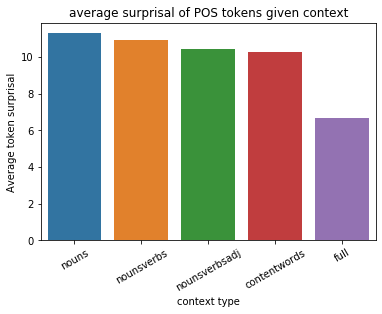

In [129]:
plot_df = pd.DataFrame({
    "nouns": avg_surp_nouns,
    "nounsverbs": avg_surp_nv,
    "nounsverbsadj": avg_surp_nva,
    "contentwords": avg_surp_content,
    "full": avg_surp_full
})

plot_df2 = plot_df.agg({"nouns": ["mean","sem"], "nounsverbs": ["mean","sem"],
                        "nounsverbsadj": ["mean","sem"], "contentwords": ["mean","sem"],
                        "full": ["mean","sem"]})
df2_transposed = plot_df2.T
df2_transposed = df2_transposed.reset_index()
df2_transposed

sns.barplot(x="index", y="mean", data=df2_transposed)
plt.xticks(rotation=30)
plt.xlabel("context type")
plt.ylabel("Average token surprisal")
plt.title("average surprisal of POS tokens given context")
plt.show()